In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import unicodedata
from sklearn.impute import SimpleImputer

### La siguiente base de datos corresponde al cruce de datos entre la base de clientes y la de escrituras

In [2]:
datos= pd.read_excel('data_casi_limpia.xlsx')

In [3]:
datos

,Unnamed: 0,ID,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Inmobiliaria,Proyecto,Etapa,Fecha escritura firmada por cliente,...,Empleador,Antiguedad Laboral,Antiguedad Laboral (Meses),Cargo,Renta Liquida,Renta Variable,Rango de Ingresos,N° De Activos,N° De Pasivos,Profesion (Estandar)
0,0,191503,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Dunas de Costa Laguna,DUNAS C8 - ETAPA 1,NaT,...,Transdal Spa,1,6,GERENTE DE OPERACIONES,2000000,2000000,1.500.001 y 2.000.000,NaN,NaN,Otros
1,1,191502,Si,212516093,1-ZONA NORTE,COQUIMBO,Constructora Noval Limitada,Condominio Brisas de Maitenes,Condominio Brisas de Maitenes (Constructora),NaT,...,NaN,1,0,NaN,0,NaN,Hasta 500.000,NaN,NaN,Otros
2,2,191501,No,212516089,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Puerta del Norte,Condominio Puerta del Norte Etapa 1 Subetapa 1,NaT,...,Escuela niña de Belen,3,5,Asistente de Parvulo,195000,0,Hasta 500.000,NaN,NaN,Tecnicos
3,3,191500,Si,212516059,1-ZONA NORTE,COQUIMBO,Constructora Noval Limitada,Condominio Brisas de Maitenes,Condominio Brisas de Maitenes (Constructora),NaT,...,NaN,1,12,NaN,10,1,Hasta 500.000,NaN,NaN,Otros
4,4,191499,Si,212515816,1-ZONA NORTE,COQUIMBO,Constructora Noval Limitada,Condominio Brisas de Maitenes,Condominio Brisas de Maitenes (Constructora),NaT,...,Colegio Santa Teresa,2,24,Parvularia,1,400000,Hasta 500.000,NaN,NaN,Universitarios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49554,49554,3691,NaN,212400437,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-05-17,...,Irene Solar Decap,30,3,Administrativo,270000,270000,Hasta 500.000,0.0,0.0,Tecnicos
49555,49555,3690,Si,212335257,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,NaT,...,BELSPORT,0,99,Administrativo,370000,370000,Hasta 500.000,0.0,0.0,Otros
49556,49556,3687,Si,212333672,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2010-10-26,...,NaN,0,0,NaN,0,0,Hasta 500.000,NaN,NaN,Otros
49557,49557,3686,NaN,212344850,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-04-18,...,MUNICIPALIDAD DE HUALPEN,0,12,Administrativo,400000,400000,Hasta 500.000,0.0,0.0,Universitarios


<AxesSubplot:>

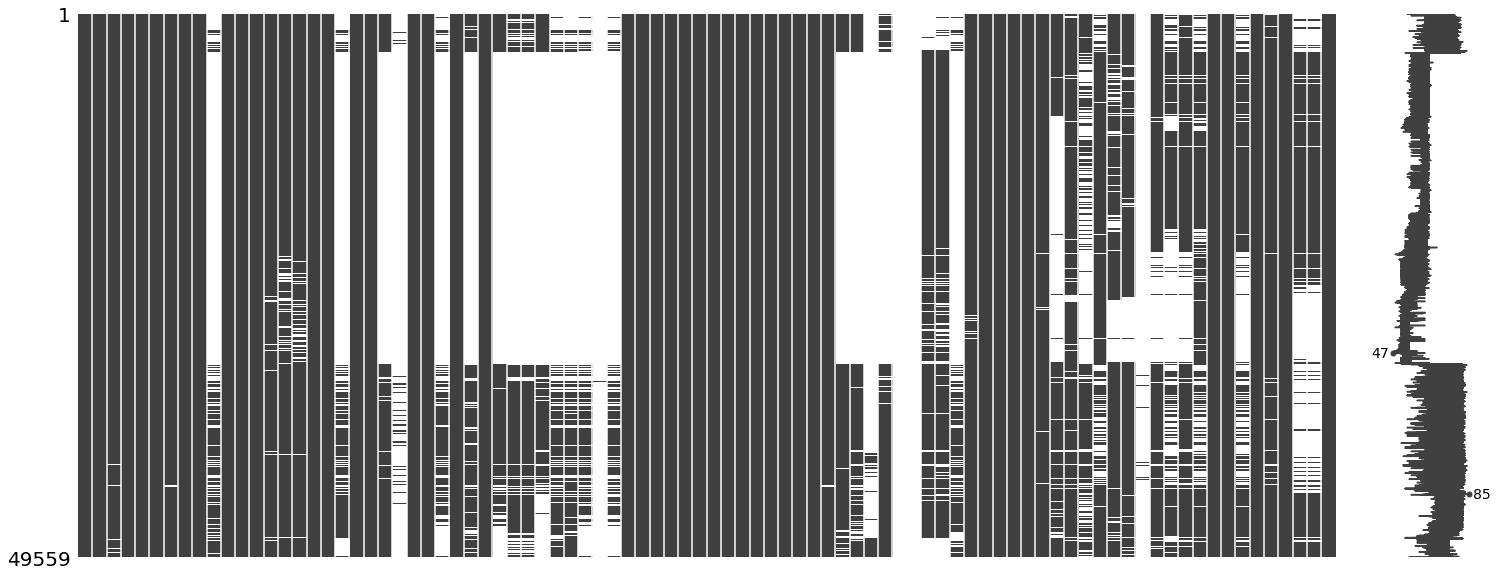

In [4]:
msno.matrix(datos)

### El objetivo será obtener una base de datos sin valores nulos

Para esto, eliminaremos las columnas consideradas no relevantes para la predicción, y de las restantes que contengan valores nulos, imputaremos datos en caso de ser una columna con información importante, de lo contrario, se eliminan las filas con datos faltantes

# Columnas Borradas

In [5]:
elim_columnas = ['Nombre Cliente', 'Proyecto','Nombre PEP2','Telefono', 'Celular', 'Email Cliente', 'Firma cliente', 
                 'Problemas Operaciones 2', 'Modificado por', 'Fecha de proyeccion', 'Ejecutivo CCE', 'Ultimo comentario', 
                 'Fecha Último Comentario', 'Nombre Vendedor', 'Jefe Comercial', 'Gerente Zonal', 'Rut', 'Situacion Laboral',
                 'Complemente Renta', 'Empleador', 'Antiguedad Laboral', 'Antiguedad Laboral (Meses)', 'Renta Liquida',
                'Renta Variable', 'N° De Activos', 'N° De Pasivos', 'Fecha de registro de cotización', 'Fecha Pre Reserva',
                 'Fecha Recepcion Rechazada']

In [6]:
df_prueba = datos.drop(elim_columnas, axis=1)

In [7]:
df_prueba

,Unnamed: 0,ID,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Inmobiliaria,Etapa,Fecha escritura firmada por cliente,Rut Cliente,...,Estado Civil,N° Grupo Familiar,Profesion,Ciudad,Comuna,Tipo Compra,Tamaño De La Empresa,Cargo,Rango de Ingresos,Profesion (Estandar)
0,0,191503,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,DUNAS C8 - ETAPA 1,NaT,18010236-1,...,Soltero(a),5,Otro,Tocopilla,María Elena,Primera Vivienda,Pequeña,GERENTE DE OPERACIONES,1.500.001 y 2.000.000,Otros
1,1,191502,Si,212516093,1-ZONA NORTE,COQUIMBO,Constructora Noval Limitada,Condominio Brisas de Maitenes (Constructora),NaT,14099007-8,...,Soltero(a),2,NaN,Huasco,Freirina,Primera Vivienda,NaN,NaN,Hasta 500.000,Otros
2,2,191501,No,212516089,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Condominio Puerta del Norte Etapa 1 Subetapa 1,NaT,16054365-5,...,Soltero(a),3,Técnico,Antofagasta,Antofagasta,Primera Vivienda,Mediana,Asistente de Parvulo,Hasta 500.000,Tecnicos
3,3,191500,Si,212516059,1-ZONA NORTE,COQUIMBO,Constructora Noval Limitada,Condominio Brisas de Maitenes (Constructora),NaT,17516727-7,...,Soltero(a),Sin Información,NaN,Huasco,Freirina,Primera Vivienda,Pequeña,NaN,Hasta 500.000,Otros
4,4,191499,Si,212515816,1-ZONA NORTE,COQUIMBO,Constructora Noval Limitada,Condominio Brisas de Maitenes (Constructora),NaT,18952778-0,...,Soltero(a),Sin Información,Educadora de Párvulos,Choapa,Los Vilos,Primera Vivienda,Grande,Parvularia,Hasta 500.000,Universitarios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49554,49554,3691,NaN,212400437,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-05-17,8160486-k,...,Soltero(a),1,Secretaria,Bío Bío,Chiguayante,Primera Vivienda,Pequeña,Administrativo,Hasta 500.000,Tecnicos
49555,49555,3690,Si,212335257,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,NaT,12973677-1,...,Soltero(a),3,Otro,Concepción,Hualpén,Primera Vivienda,Mediana,Administrativo,Hasta 500.000,Otros
49556,49556,3687,Si,212333672,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2010-10-26,15854791-0,...,Sin Información,Sin Información,Otro,Concepción,Concepción,Otros,NaN,NaN,Hasta 500.000,Otros
49557,49557,3686,NaN,212344850,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-04-18,14059574-8,...,Soltero(a),1,Psicólogo,Concepción,Hualpén,Primera Vivienda,Grande,Administrativo,Hasta 500.000,Universitarios


<AxesSubplot:>

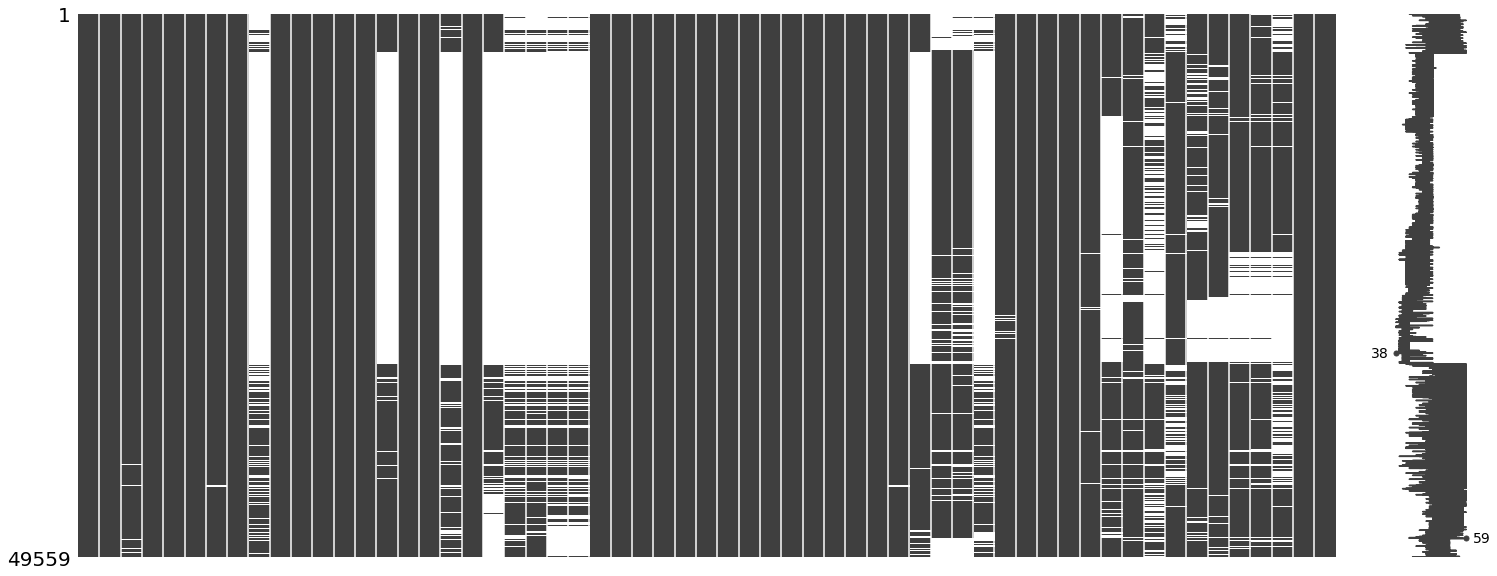

In [8]:
msno.matrix(df_prueba)

In [9]:
## Se hace un filtro de clientes, se consideran sólo clientes con renta líquida entre 300.000 y 50.000.000

data_cruzada = datos[(datos['Renta Liquida'] <= 50000000) & (datos['Renta Liquida'] >= 300000)]
data_cruzada = data_cruzada.reset_index(drop=True)
data_cruzada

,Unnamed: 0,ID,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Inmobiliaria,Proyecto,Etapa,Fecha escritura firmada por cliente,...,Empleador,Antiguedad Laboral,Antiguedad Laboral (Meses),Cargo,Renta Liquida,Renta Variable,Rango de Ingresos,N° De Activos,N° De Pasivos,Profesion (Estandar)
0,0,191503,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Dunas de Costa Laguna,DUNAS C8 - ETAPA 1,NaT,...,Transdal Spa,1,6,GERENTE DE OPERACIONES,2000000,2000000,1.500.001 y 2.000.000,NaN,NaN,Otros
1,5,191497,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Dunas de Costa Laguna,DUNAS C8 - ETAPA 1,NaT,...,Minera Spence S.A. Operada por BHP,2,10,Operador Process,2300000,2300000,Sobre 2.000.000,NaN,NaN,Universitarios
2,6,191496,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Puerta del Norte,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,...,Lan,1,0,Técnico,450000,0,Hasta 500.000,0.0,0.0,Otros
3,7,191495,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Puerta del Norte,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,...,Lan,1,0,Técnico,450000,0,Hasta 500.000,0.0,0.0,Otros
4,9,191493,No,212516095,3-ZONA SUR,BIO-BIO,Gestion Monte Santo,Parque Torreones,Parque Torreones etapa 1B,NaT,...,NaN,9,1,NaN,3800000,3800000,Sobre 2.000.000,NaN,NaN,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38540,49552,3693,NaN,212347406,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-01-03,...,Pensionado,0,10,Jefe,830000,830000,Entre 500.001 y 1.000.000,0.0,0.0,Otros
38541,49553,3692,NaN,212347047,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-01-03,...,ARZOBISPADO DE CONCEPCION,0,18,Supervisor,672000,672000,Entre 500.001 y 1.000.000,0.0,0.0,Universitarios
38542,49555,3690,Si,212335257,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,NaT,...,BELSPORT,0,99,Administrativo,370000,370000,Hasta 500.000,0.0,0.0,Otros
38543,49557,3686,NaN,212344850,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-04-18,...,MUNICIPALIDAD DE HUALPEN,0,12,Administrativo,400000,400000,Hasta 500.000,0.0,0.0,Universitarios


Text(0.5, 1.0, 'Distribucion de ingresos')

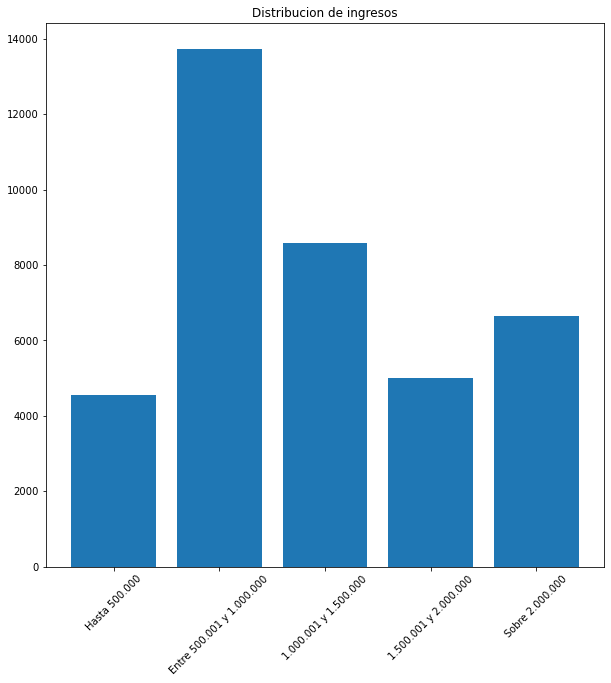

In [10]:
dic_ing_cruzada= dict()

for i in range(data_cruzada.shape[0]):
    if str(data_cruzada['Rango de Ingresos'][i]) not in list(dic_ing_cruzada.keys()):
        dic_ing_cruzada[str(data_cruzada['Rango de Ingresos'][i])] =1
    else:
        dic_ing_cruzada[str(data_cruzada['Rango de Ingresos'][i])] += 1
df_ingresos_cruzada = pd.DataFrame(columns= ['Ingresos', 'frecuencia'])

for i in range(len(dic_ing_cruzada)):
    df_ingresos_cruzada.loc[i] = [list(dic_ing_cruzada.keys())[i], list(dic_ing_cruzada.values())[i]]

    
    
l = [2, 4, 3, 0, 1]
df_ingresos_cruzada_ordenada =  pd.DataFrame(columns= ['Ingresos', 'frecuencia'])

for i in l:
    df_ingresos_cruzada_ordenada.loc[i] = [df_ingresos_cruzada['Ingresos'][i], df_ingresos_cruzada['frecuencia'][i]]
df_ingresos_cruzada_ordenada = df_ingresos_cruzada_ordenada.reset_index(drop=True)


plt.figure(figsize=(10,10))

plt.bar(df_ingresos_cruzada_ordenada['Ingresos'],df_ingresos_cruzada_ordenada['frecuencia'])
plt.xticks(rotation=45)
plt.title('Distribucion de ingresos')

### Estandarización de la columna Cargo

In [11]:
cargos = set()
for i in range(len(data_cruzada['Cargo'].unique())):
    text= data_cruzada['Cargo'].unique()[i]

    cargos.add(unicodedata.normalize('NFD', str(text))\
           .encode('ascii', 'ignore')\
           .decode("utf-8").lower().replace('.', '').strip())

cargos_ordenados=sorted(cargos)

In [12]:
#Realizamos el proceso de pasar a minusculas y quitar tildes en el DataFrame

for i in range(data_cruzada.shape[0]):
    text= data_cruzada['Cargo'][i]
    if text == np.nan:
        continue
    data_cruzada.loc[i,['Cargo']] = unicodedata.normalize('NFD', str(text))\
           .encode('ascii', 'ignore')\
           .decode("utf-8").lower().replace('.', '').strip()

In [13]:
cargos_2 = cargos_ordenados.copy()

def cat_cargos(nombre_cargo, lista_cargo):
    if len(lista_cargo)!=0:
        for i in range(len(cargos_2)):
            if nombre_cargo in str(cargos_2[i]):
                lista_cargo.append(cargos_2[i])
        for i in lista_cargo:
            cargos_2.remove(i)
            
    else:
        lista_cargo= []
        for i in range(len(cargos_2)):
            if nombre_cargo in str(cargos_2[i]):
                lista_cargo.append(cargos_2[i])
        for i in lista_cargo:
            cargos_2.remove(i)
            
            
    return lista_cargo

In [14]:
gerentes = ['gerente',
 'gerente administracion y finanzas',
 'gerente administrativa',
 'gerente administrativo',
 'gerente comercial',
 'gerente corporativo',
 'gerente de administracion y finanzas',
 'gerente de auditoria',
 'gerente de canal tradicional',
 'gerente de control de costos',
 'gerente de cuenta',
 'gerente de cuentas',
 'gerente de finanzas',
 'gerente de informatico',
 'gerente de innovacion y exportaciones',
 'gerente de inovacion y desarrollo',
 'gerente de local',
 'gerente de logistica y ventas',
 'gerente de marketing',
 'gerente de operaciones',
 'gerente de planificacion',
 'gerente de produccion',
 'gerente de proyecto',
 'gerente de proyectos',
 'gerente de servicios',
 'gerente de sistema',
 'gerente de territorio',
 'gerente de tienda',
 'gerente de unidad',
 'gerente de ventas',
 'gerente desarrollo regional',
 'gerente dueno',
 'gerente estrategia de negocios',
 'gerente finanzas',
 'gerente general',
 'gerente local',
 'gerente negocio',
 'gerente operaciones',
 'gerente operaciones y abastecimiento',
 'gerente planta proceso',
 'gerente recursos humanos',
 'gerente rrhh',
 'gerente seguridad y salud ocupacional',
 'gerente servicios de linea',
 'gerente socio unico',
 'gerente tecnico',
 'gerente tecnico de ventas',
 'gerente urbanizacion',
 'gerente ventas regionales',
 'gerente zonal',
 'sebgerente de trade- marketin',
 'sub gerente',
 'sub gerente comercial',
 'sub gerente control de gestion',
 'sub gerente de adminitracion y finanzas',
 'sub gerente de calidad',
 'sub gerente de carga',
 'sub gerente de local',
 'sub gerente de operaciones',
 'sub gerente de poduccion',
 'sub gerente de seguridad',
 'sub gerente de servicio tecnico',
 'sub gerente educacion',
 'sub gerente informatica',
 'sub gerente personas',
 'sub gerente telecomunicaciones',
 'sub-gerente',
 'sub-gerente comercial',
 'subgerente atencion clientes mayoristas',
 'subgerente comercial',
 'subgerente de desarrollo',
 'subgerente de negocios',
 'subgerente de recoleccion',
 'subgerente mantencion',
 'subgerente planificacion comercial logistico',
 'subgerente riesgo empresas',
 'subgerente rrhh',
 'subgerente zona',
 'subgerentes bussines intelligence',
 'gereente',
 'gerencia',
 'gerenta',
 'superintendente mantencion mina', 
 'superintendente',
 'superintendente de geologia',
 'superintendente de ventas',
 'superintendente medioambiente',
 'coronel de aviacion',
 'coronel de gendarmeria',
 'cpitan de alta mar',
 'juez',
 'juez titular',
 'representante comercial',
 'representante de  ventas',
 'representante de marca en terreno',
 'representante de post venta',
 'representante de ventas',
 'representante de ventas y aplicaciones',
 'representante distrito',
 'representante legal',
 'representante legal empresas yireh',
 'representante soporte al producto',
 'sargento',
 'seremi',
 'seremi de obras publicas',
 'vicepresidente rrhh',
 'departamento de criminalistica',
 'general',
 'ceo']

In [15]:
jefes = ['administrativo jefe',
 'cirujano dentista jefe',
 'director tecnico y jefe de sucursal',
 'enfermera en jefe',
 'enfermera jefe',
 'enfermera jefe unidad grd',
 'ingeniero jefe',
 'jefe',
 'jefe  de modelos estadisticos',
 'jefe  operaciones - comercial metrologia',
 'jefe administracion',
 'jefe administracion y finanzas',
 'jefe administrador',
 'jefe administrativo',
 'jefe area',
 'jefe area de propuestas',
 'jefe area tecnologia',
 'jefe atencion clientes y administrativo',
 'jefe auditoria',
 'jefe autonomo',
 'jefe cobranza',
 'jefe comercial',
 'jefe comercial recuperaciones',
 'jefe contabilidad',
 'jefe contable',
 'jefe contrl gestion',
 'jefe control',
 'jefe de abastecimiento',
 'jefe de administracion y finanzas',
 'jefe de administrativo',
 'jefe de adquisiciones',
 'jefe de area',
 'jefe de area ambiental',
 'jefe de areas',
 'jefe de asesoria',
 'jefe de bodega',
 'jefe de calidad',
 'jefe de calidad de obra',
 'jefe de calidad gastronomica',
 'jefe de carrera ing comercial',
 'jefe de clientes',
 'jefe de cobrazan',
 'jefe de compra',
 'jefe de confiadilidad',
 'jefe de contabilidad',
 'jefe de contabilidad y recursos humanos',
 'jefe de control',
 'jefe de creditos y cobranza',
 'jefe de desarrollo',
 'jefe de distribucion',
 'jefe de distribucion de materiales',
 'jefe de dpartamento de gestion de personas',
 'jefe de entregas',
 'jefe de estandares y procedimientos',
 'jefe de estudio',
 'jefe de estudio o propuestas',
 'jefe de financiamiento',
 'jefe de finanzas',
 'jefe de gerreno',
 'jefe de grupo de control de egresos',
 'jefe de impuestos',
 'jefe de informatica',
 'jefe de infraestructura',
 'jefe de ingenieria',
 'jefe de ingenieria de procesos',
 'jefe de inspeccion  municipal',
 'jefe de instalaciones',
 'jefe de investigacion',
 'jefe de laboratorio',
 'jefe de laboratorio metalurgico',
 'jefe de linea',
 'jefe de local',
 'jefe de mantencion',
 'jefe de mantencion planta',
 'jefe de mantenimiento',
 'jefe de marca-marketing',
 'jefe de marketing',
 'jefe de mejora continua',
 'jefe de mejora continua y calidad',
 'jefe de oficina',
 'jefe de oficina tenica',
 'jefe de operaciones',
 'jefe de planificacion',
 'jefe de planificacion  de inventarios',
 'jefe de planificacion y control',
 'jefe de planificacion zonal',
 'jefe de planta',
 'jefe de planta ( dep operaciones )',
 'jefe de plataforma',
 'jefe de prevencion de riesgo',
 'jefe de produccion',
 'jefe de productos',
 'jefe de proyecto',
 'jefe de proyectos',
 'jefe de proyectos it',
 'jefe de proyectos senior',
 'jefe de recepcion',
 'jefe de reclutamiento y seleccion',
 'jefe de recursos humanos',
 'jefe de riesgo ti',
 'jefe de rrhh',
 'jefe de seccion',
 'jefe de seguridad',
 'jefe de seguridad y salud ocupacional',
 'jefe de servicio',
 'jefe de servicio de traumatologia',
 'jefe de sistema',
 'jefe de sistema integrado de gestion',
 'jefe de sucursal',
 'jefe de taller',
 'jefe de terreno',
 'jefe de tesoreria',
 'jefe de tienda',
 'jefe de transportes y distribucion',
 'jefe de turno',
 'jefe de turno mantencion',
 'jefe de turno operaciones',
 'jefe de unidad osorno',
 'jefe de unidad tecnica pedagogica',
 'jefe de venta',
 'jefe de ventas',
 'jefe de ventas industrial zona norte',
 'jefe de zona',
 'jefe del departamento de contabilidad',
 'jefe departamento',
 'jefe departamento calidad',
 'jefe departamento de prevencion de riesgos',
 'jefe departamento de proyecto',
 'jefe departamento de urbanizacion direccion de obras',
 'jefe departamento prevencion de riesgos',
 'jefe depto',
 'jefe docente',
 'jefe dpto de prevension de riesgos',
 'jefe equipo medicos',
 'jefe funcional de planificacion',
 'jefe gtm',
 'jefe independiente',
 'jefe ingenieria',
 'jefe laboratorio',
 'jefe logistica',
 'jefe nacional administrativo',
 'jefe nacional cobrazanza',
 'jefe negocios corporativo',
 'jefe oficina',
 'jefe oficina tecnica',
 'jefe operaciones',
 'jefe operaciones minera escondida',
 'jefe personal',
 'jefe planta metalmecanica',
 'jefe plataforme',
 'jefe prevencion de riesogs',
 'jefe proyecto',
 'jefe proyectos',
 'jefe proyectos host',
 'jefe recursos humanos y administracion regional',
 'jefe regional',
 'jefe reten',
 'jefe rrhh',
 'jefe salud mental',
 'jefe seguridad y salud ocupacional',
 'jefe senior construccion',
 'jefe servicio',
 'jefe servicio al cliente',
 'jefe servicio dental',
 'jefe servicio tecnico',
 'jefe sucursal',
 'jefe sucursal vina del mar',
 'jefe tecnico',
 'jefe terreno',
 'jefe traumatologia',
 'jefe turno',
 'jefe turno mantenimiento - apilamiento y ripios',
 'jefe turno mina',
 'jefe unidad medicina',
 'jefe utp',
 'jefe zona sur',
 'jefe zonal',
 'jjefe oficina',
 'jeefe',
 'jefa',
 'jefa de administracion y finanza',
 'jefa de administracion y finanzas',
 'jefa de bien estar',
 'jefa de bodega',
 'jefa de contabilidad',
 'jefa de departamentos de fiscalizacion',
 'jefa de depto de capacitacion',
 'jefa de finanzas',
 'jefa de gabinete',
 'jefa de local',
 'jefa de obras',
 'jefa de operaciones',
 'jefa de plataforma',
 'jefa de recursos humanos',
 'jefa de tienda',
 'jefa de ventas',
 'jefa utp', 
 'lider',
 'lider area cnc',
 'lider area de reparaciones',
 'lider control documentos',
 'lider de costos (mineria)',
 'lider de redes y seguridad',
 'lider de servicio a cliente',
 'lider gestion de riesgo',
 'capataz  obras civiles',
 'capataz electrico',
 'capataz montaje',
 'capitan',
 'capitan de barco',
 'carbinero capitan',
 'detective',
 'fical',
 'fiscal',
 'oficial de carabineros',
 'oficial de ejercito',
 'oficial de marina',
 'oficial de marina de mercante',
 'oficial fuerza area',
 'oficial grado de comandante de grupo',
 'oficial policial profecional',
 'oficial tercero  titular planta',
 'oficil ee carabineros',
 'oficila policial',
 'sargento 1',
 'sargento 2do',
 'sargento primero',
 'sargento sdo',
 'sargento segundo',
 'sub comisario',
 'sub oficial',
 'sub prefecto',
 'sub teniente',
 'sub teniente de carabineros',
 'subcomisario',
 'suboficial',
 'suboficial, gendarmeria',
 'subofiicial de carabinero',
 'teniente',
 'teniente coronel']

In [16]:
supervisores= ['credit y collections supervisor',
 'supervisor',
 'supervisor  de obra',
 'supervisor admision',
 'supervisor de bodega',
 'supervisor de centro de operaciones de red',
 'supervisor de cobranza',
 'supervisor de condominios',
 'supervisor de contrato',
 'supervisor de instalacion y proyectos',
 'supervisor de logistica',
 'supervisor de naves',
 'supervisor de obra',
 'supervisor de operaciones',
 'supervisor de operaciones centro de distribucion',
 'supervisor de planata',
 'supervisor de post-venta',
 'supervisor de postventa',
 'supervisor de proceso',
 'supervisor de relaves',
 'supervisor de servicio',
 'supervisor de terreno',
 'supervisor de terreno en obras civiles',
 'supervisor de ventas',
 'supervisor de ventas norte',
 'supervisor electrico',
 'supervisor en terreno',
 'supervisor enfermera',
 'supervisor industrial',
 'supervisor linea de mantencion',
 'supervisor mecanico',
 'supervisor medioambiental',
 'supervisor metalurgico',
 'supervisor operaciones aereas',
 'supervisor operario',
 'supervisor planta',
 'supervisor planta externa',
 'supervisor servicios electricos',
 'supervisor tecnical',
 'supervisor tecnico',
 'supervisor unidad de distribucion',
 'supervisor zonal',
 'supervisora',
 'supervisora  logistica',
 'supervisora de cajas',
 'supervisora de contabilidad',
 'supervisora de ventas',
 'supervisora tecnica sename',
 'inspector',
 'inspector comercial',
 'inspector de calidad',
 'inspector de control',
 'inspector de obras',
 'inspector de servicios turisticos',
 'inspector fiscalizador',
 'inspector general',
 'inspector policia de investigaciones',
 'inspector tectico',
 'inspector tecnico',
 'inspector tecnico de obras',
 'subinspector',
 'subinspector gdo 12',
 'subinspectora',
 'impector de transito',
 'supervisior de estructura',
 'supervisior zona de control']

In [17]:
tecnicos = ['asesor tecnico',
 'asistente tecnico',
 'asistente tecnico de cuadratura',
 'director tecnico complementario',
 'ejecutivo tecnico',
 'encargado servicio tecnico',
 'encargado tecnico',
 'intrustor tecnico',
 'profesional tecnico universitario',
 'representante tecnico',
 'soporte tecnico',
 'tecnico',
 'tecnico  dgac',
 'tecnico / vendedor',
 'tecnico analista geologico',
 'tecnico control de calidad',
 'tecnico de canales',
 'tecnico de ensayo no destructivo',
 'tecnico de maquinaria pesada',
 'tecnico de servicio',
 'tecnico de servicios',
 'tecnico dental',
 'tecnico electricista',
 'tecnico electrico',
 'tecnico electronico',
 'tecnico en diseno grafico',
 'tecnico en electricidad',
 'tecnico en enfermeria',
 'tecnico en enfermeria nivel superior',
 'tecnico en lubricacion',
 'tecnico en mantencion',
 'tecnico en mantencion electrico',
 'tecnico en mantenimiento',
 'tecnico en meteorologia',
 'tecnico en negocio naviero',
 'tecnico en odontologia',
 'tecnico en telecomunicaciones',
 'tecnico en tronaduras',
 'tecnico especialista',
 'tecnico geomensor',
 'tecnico grafico',
 'tecnico informatico',
 'tecnico informatio',
 'tecnico mantencion',
 'tecnico mantencion industrial',
 'tecnico mantenedor',
 'tecnico mayor mec en mantencion',
 'tecnico mecanico',
 'tecnico metalurgico',
 'tecnico moncon',
 'tecnico monitoreo',
 'tecnico operaciones',
 'tecnico operaciones proceso',
 'tecnico operador',
 'tecnico paramedico',
 'tecnico parmedico',
 'tecnico senior',
 'tecnico superior',
 'tecnico superior en enfermeria',
 'tecnico teatral',
 'tecnico telecomunicacion',
 'vendedor tecnico', 
 'prevencion de riesgos',
 'prevencionista',
 'prevencionista  para calderas',
 'prevencionista de riesgo',
 'prevencionista de riesgo y medio ambiente',
 'prevencionista de riesgos',
 'prevencionista e riesgos',
 'prevencionista riesgo',
 'prevensionista',
 'prevensionista de riesgos', 
 'tec de dialisis',
 'tec en enfermeria',
 'tec medico',
 'technical field advisor-gas turbine controls',
 'tecniico enfermeria', 
 'especialista  hse',
 'especialista electrico',
 'especialista en aplicaciones de negocio',
 'especialista en herramientas de perforacion',
 'especialista en operaciones',
 'especialista en ortodoncia',
 'especialista en sitema senior',
 'especialista en telecomunicaciones',
 'especialista monitoreo de condiciones',
 'especialista predictivo', 
 'electrico en mantencion',
 'electrico mantencion',
 'mantencion de equipos de aire acondicionado',
 'mantencion electrica',
 'mantenedor  industrial',
 'mantenedor  mecanico',
 'mantenedor de equipos electronicos',
 'mantenedor de procesos',
 'mantenedor de servicios criticos',
 'mantenedor electrico instrumentista',
 'mantenedor maquinaria pesada',
 'mantenedor mecanico',
 'mantenedor mina',
 'mantenedor planta',
 'mantenedor planta d',
 'mantenimiento equipos de apoyo',
 'mecanico en mantencion',
 'operador mantenedor mayor',
 'soporte y mantencion informatica',
 'superintendente mantencion mina', 
 'electromecanico',
 'electromecanico especialista',
 'maestro maypr mecanico',
 'mecanico',
 'mecanico 2a',
 'mecanico aeronautico',
 'mecanico armador',
 'mecanico c',
 'mecanico de turno',
 'mecanico en maquinaria pesada',
 'mecanico industrial',
 'mecanico junior',
 'soldador mecanico', 
 'electricista',
 'electrico',
 'electrico 1-e',
 'electrico de turno',
 'electrico instrumentista', 
 'area tecnica',
 'constructor',
 'constructor civil',
 'constructor residente',
 'consttuctor civil',
 'contructora civil',
 'desarrollador',
 'desarrollador de sfttware',
 'desarrollador senior',
 'desarrollo negocios zona norte',
 'dibujante',
 'dibujante proyectista',
 'disenador',
 'disenador grafico',
 'disenador industrial',
 'disenador intermedio',
 'disenador pagina web',
 'disenadora',
 'disenadora web',
 'fresador',
 'intrumentista',
 'maestro',
 'maestro albanil',
 'maestro carpintero',
 'maestro de cocina',
 'maestro mayor',
 'maestro mayor de segunda',
 'marinero 1',
 'marinero primero',
 'marino',
 'mecanido 2-b',
 'profecional de terreno',
 'profecional departamento finanzas',
 'programador',
 'proyecticta area electrica',
 'proyectista',
 'seguridad informatica',
 'software engineer',
 'tercnico en refrigeracion',
 'taquigrafo de sesiones',
 'teecnico predictivo',
 'telecomunicaciones',
 'topografo',
 'tornero',
 'dvops',
 'experto en calidad',
 'experto en prevencion de riesgos',
 'oficina tecnica']

In [18]:
ingenieros= ['asistente de gerencia de ingenieria',
 'decano facultad de ingenieria',
 'dibujante de ingenieria y arquitectura',
 'director de ingenieria',
 'especialista en proyectos ingenieria',
 'independiente, ingeniero forestal',
 'ingeniera',
 'ingeniera agron',
 'ingeniera control gestion',
 'ingeniera en informatica',
 'ingenieria en ejecucion informatica',
 'ingeniero',
 'ingeniero a cargo',
 'ingeniero a cargo de gestion',
 'ingeniero abastecimiento y contrato',
 'ingeniero agronomo',
 'ingeniero ambiental',
 'ingeniero analista',
 'ingeniero analista de mercados',
 'ingeniero analista en perforacion y tronadura',
 'ingeniero aplicaciones reparables',
 'ingeniero calculista',
 'ingeniero civil',
 'ingeniero civil electrico',
 'ingeniero civil en informatica',
 'ingeniero civil industrial',
 'ingeniero civil informatica',
 'ingeniero civil mecanico',
 'ingeniero civil metalurgico',
 'ingeniero civil mina',
 'ingeniero civil quimico',
 'ingeniero comercial',
 'ingeniero confiabilidad',
 'ingeniero construccion',
 'ingeniero constructor',
 'ingeniero control',
 'ingeniero control de gestion',
 'ingeniero control de procesos',
 'ingeniero de compras',
 'ingeniero de confiabilidad',
 'ingeniero de contrato',
 'ingeniero de contratos estrategicos',
 'ingeniero de control de gestion',
 'ingeniero de control en gestion',
 'ingeniero de cuentas',
 'ingeniero de estudio de proyectos',
 'ingeniero de estudios',
 'ingeniero de estudios depto medio ambiente',
 'ingeniero de gestion',
 'ingeniero de gestion de operaciones',
 'ingeniero de operaciones',
 'ingeniero de procesos',
 'ingeniero de produccion',
 'ingeniero de producto',
 'ingeniero de propuestas',
 'ingeniero de proyecto',
 'ingeniero de proyectos',
 'ingeniero de proyectos tecnologicos',
 'ingeniero de proyectos y proceso',
 'ingeniero de redes y contectividdes',
 'ingeniero de servicios',
 'ingeniero de sistemas',
 'ingeniero de software',
 'ingeniero de soporte',
 'ingeniero de soporte broadcast',
 'ingeniero de ventas',
 'ingeniero de ventas senior',
 'ingeniero desarrollador',
 'ingeniero desarrollo',
 'ingeniero desarrollo de productos',
 'ingeniero ej minas',
 'ingeniero ejecucion informatico',
 'ingeniero el ciber seguridad',
 'ingeniero electrico',
 'ingeniero en administracion',
 'ingeniero en aprendizaje de maquinas',
 'ingeniero en automatizacion',
 'ingeniero en automatizacion y control industrial',
 'ingeniero en computacion e informatica',
 'ingeniero en conectividad en redes',
 'ingeniero en confiabilidad',
 'ingeniero en construccion',
 'ingeniero en contruccion',
 'ingeniero en desarrollo de software',
 'ingeniero en ejecucion',
 'ingeniero en ejecucion industrial',
 'ingeniero en gestion',
 'ingeniero en informartica',
 'ingeniero en informatica',
 'ingeniero en mantencion y soporte',
 'ingeniero en mantenimiento',
 'ingeniero en monitorio de condiciones',
 'ingeniero en prevencion de riesg',
 'ingeniero en prevencion de riesgo',
 'ingeniero en prevencion de riesgos',
 'ingeniero en prevension de riesgos',
 'ingeniero en recursos naturales',
 'ingeniero en redes',
 'ingeniero en remuneraciones',
 'ingeniero en seguridad tecnica',
 'ingeniero en servicio nacional de aduanas',
 'ingeniero en servicios',
 'ingeniero en sistemas',
 'ingeniero en software',
 'ingeniero en sofware',
 'ingeniero en ventas y servicios',
 'ingeniero especialista',
 'ingeniero especialista en chancado',
 'ingeniero estructura',
 'ingeniero estructural',
 'ingeniero excelencia operacional',
 'ingeniero forestal',
 'ingeniero geomensor',
 'ingeniero industrial',
 'ingeniero informatico',
 'ingeniero mantencion mina',
 'ingeniero mecanico',
 'ingeniero medio ambiente, contrata',
 'ingeniero metalurgico',
 'ingeniero naval',
 'ingeniero planificador corto plazo',
 'ingeniero planificador largo palzo',
 'ingeniero predictivo',
 'ingeniero prevemta',
 'ingeniero programacion',
 'ingeniero programador',
 'ingeniero proyectos',
 'ingeniero reportabilidad y mejoramiento',
 'ingeniero senior',
 'ingeniero senior chancado y correas',
 'ingeniero senior control produccion mina',
 'ingeniero senior instrumentacion',
 'ingeniero senior recursos hidricos',
 'ingeniero sistena de control distribuido',
 'ingeniero software',
 'ingeniero telematica',
 'ingeniero trainne',
 'servicio de ingenieria', 
 'informatica', 
 'informatico',
 'ing comercial',
 'ing constructor',
 'ing de produccion',
 'ing de terreno',
 'ing en prevencion de riesgos',
 'ing especialistas contructor',
 'ing especialistas en reportes',
 'ing inf',
 'ing informatico',
 'ing proyecto ti',
 'ingebiero en administracion de negocios',
 'ingeneiro en software',
 'ingenoero comercial',
 'ign en prevencion de riesgo']

In [19]:
encargados=['encargada clinica',
 'encargada comercio exteior',
 'encargada contabilidad y tesoreria',
 'encargada contable',
 'encargada de adquisiciones',
 'encargada de arriendo',
 'encargada de cobranzas',
 'encargada de convivencia escolar',
 'encargada de cultura y comunicaciones',
 'encargada de departamento',
 'encargada de facturacion',
 'encargada de finanzas',
 'encargada de laboratorio de computacion',
 'encargada de perecibles',
 'encargada de programacion y control zona aeroportuaria sur',
 'encargada de proveedores',
 'encargada de recursos humanos',
 'encargada de tienda',
 'encargada de turno',
 'encargada de unidad estadistica',
 'encargada dpto novios',
 'encargada oficina tecnica',
 'encargada omil',
 'encargado',
 'encargado asuntos comunitarios',
 'encargado de abastecimiento y logistica',
 'encargado de admision',
 'encargado de alimentacion',
 'encargado de area',
 'encargado de bodega',
 'encargado de calidad',
 'encargado de capacitacion',
 'encargado de compra',
 'encargado de compras',
 'encargado de computacion',
 'encargado de despacho',
 'encargado de flota remolcadores',
 'encargado de laboratorio  litio',
 'encargado de legumbres',
 'encargado de logistica',
 'encargado de mantenimiento',
 'encargado de operaciones',
 'encargado de reparacion',
 'encargado de sistema integrado de gestion y medio ambiente',
 'encargado de unidad de ventas',
 'encargado operaciones',
 'encargado sala de control',
 'encargado sala de informatica',
 'encargado salud ocupacional',
 'encargado zonal', 
 'director',
 'director de capacitacion',
 'director de contraloria',
 'director de empresas',
 'director de escuela',
 'director de negocios',
 'director de obras municipales',
 'director de proyecto',
 'director de transmicion',
 'director medico',
 'director regional',
 'director rrhh',
 'director salud ocupacional',
 'directora',
 'directora de colegio',
 'directora de desarrollo comunitario',
 'directora del centro b',
 'directora regional de aduanas',
 'directora regional pro chile',
 'dueno y director',
 'senior director sales',
 'sub director',
 'subdirector de transferencia de tecnologia puc', 
 'coord de recursos',
 'coordenador chile',
 'coordinado regional de cobranza',
 'coordinador',
 'coordinador area',
 'coordinador de finanzas y control de gestion',
 'coordinador de proyectos',
 'coordinador de rrll',
 'coordinador de servicio al cliente',
 'coordinador marketing',
 'coordinador proyectos',
 'coordinador regional',
 'coordinador sgi',
 'coordinadora',
 'coordinadora de contrato',
 'coordinadora de jeans',
 'coordinadora de utp',
 'coordinadora eventos',
 'coordinadora regional de proyectos',
 'cordinadora de ventas',
 'corrdinadora',
 'encardo programa salud mental',
 'engargado de bodega',
 'responsable de calidad de obra',
 'responsable medio ambiente',
 'directivo']

In [20]:
administrativos = ['administracion',
 'administracion de contrato',
 'administracion de empresa',
 'administracion de empresas',
 'administracion y finanzas',
 'administrador',
 'administrador de aplicaciones',
 'administrador de condominios',
 'administrador de contrato',
 'administrador de contratos',
 'administrador de edificio',
 'administrador de empresas',
 'administrador de fundo',
 'administrador de local',
 'administrador de obra',
 'administrador de obras',
 'administrador de propiedades',
 'administrador de red informatica',
 'administrador de sistemas',
 'administrador general inmobiliaria',
 'administrador local',
 'administrador publico',
 'administradora',
 'administradora de hotel',
 'administradors',
 'administrativa',
 'administrativa de bodega',
 'administrativa de estadisticas',
 'administrativa de gestion sso',
 'administrativa de operaciones',
 'administrativa de recepcion',
 'administrativa de rrhh',
 'administrativa facturacion',
 'administrativo',
 'administrativo (secretaria y cajera)',
 'administrativo / ventas',
 'administrativo contable',
 'administrativo de cobranza',
 'administrativo de finanzas',
 'administrativo de ventas',
 'administrativo docente',
 'administrativo grado 21',
 'administrativo inmobiliario',
 'administrativo logistico ii',
 'administrativo obras',
 'administrativo personal',
 'administrativo profesional',
 'administrativo publico',
 'administrativo vendedor integral cajero',
 'analista administrador de lms',
 'analista de administracion',
 'asistente  administrativa',
 'asistente administrativa',
 'asistente administrativo',
 'auditor administrativo y financiero',
 'cajero administrativo',
 'personal administrativo',
 'profesional administrativo',
 'secretaria administrativa',
 'secretaria y administracion',
 'sub administrador',
 'sub administrador predial', 
 'adm manger',
 'adm recursos humanos',
 'admin',
 'adminisra',
 'administartiva',
 'adminsitrador',
 'adminsitrativo',
 'admistrativa',
 'admistrativo',
 'adrministrativo',
 'asministrativo', 
 'aministrador',
 'amninistrativo segundo',
 'utp educacion media']

In [21]:
apoyo = ['abogado asistente fiscalia local copiapo',
 'asiste post venta call center zonal',
 'asiste social',
 'asistencia social',
 'asistente',
 'asistente almacenaje de vehiculos',
 'asistente atencion clientes',
 'asistente comercial',
 'asistente comercial pe b',
 'asistente comercial senior -2',
 'asistente comercio exterior',
 'asistente contable',
 'asistente de acreditacion',
 'asistente de adquisiciones',
 'asistente de bienestar',
 'asistente de bobeda',
 'asistente de bodega',
 'asistente de centro',
 'asistente de cobranza',
 'asistente de comercio exterior',
 'asistente de educacion',
 'asistente de finanzas',
 'asistente de gerencia',
 'asistente de gestion',
 'asistente de importaciones',
 'asistente de la educacion',
 'asistente de lab',
 'asistente de linea',
 'asistente de parvulo',
 'asistente de parvulos',
 'asistente de produccion',
 'asistente de proyecto',
 'asistente de recursos humanos',
 'asistente de sala',
 'asistente de seguridad',
 'asistente de servicio',
 'asistente de servicio tenico',
 'asistente de servicios',
 'asistente de servicios electrico industrial',
 'asistente de ventas',
 'asistente departamento estudio',
 'asistente ejecutiva de eventos',
 'asistente en capacitacion',
 'asistente gerencia industria',
 'asistente laboratorio',
 'asistente magister en comunicacion creativa',
 'asistente oficina tecnica',
 'asistente operaciones comerciales',
 'asistente personal',
 'asistente recurso humano',
 'asistente recursos humanos',
 'asistente rrhh',
 'asistente servicios',
 'asistente social',
 'asistente social y consejera tecnica',
 'asistente web',
 'docente asistente', 
 'secretaria',
 'secretaria academica',
 'secretaria comunal de planificacion',
 'secretaria consulta medica',
 'secretaria de finanzas',
 'secretaria de gerencia',
 'secretaria gerencia',
 'secretaria gerencia general',
 'secretaria rectoria',
 'secretario de estudio',
 'secretario de facultad',
 'secretario municipal', 
 'auxiliar',
 'auxiliar de apoyo',
 'auxiliar de casino',
 'auxiliar de enfermeria',
 'auxiliar de farmacia',
 'auxiliar de limpieza',
 'auxiliar de servicio',
 'auxiliar de servicios',
 'auxiliar se aseo vigilancia y aseo',
 'auxiliar servicio clinico',
 'ayudante',
 'ayudante de laboratorio',
 'ayudante de oficina tecnica',
 'ayudante de tostacion',
 'ayudante de turno',
 'ayudante mecanico', 
 'asesor',
 'asesor banco comunal',
 'asesor comercial',
 'asesor comercial de riesgo',
 'asesor de calidad',
 'asesor de cuentas voluntarias',
 'asesor de operaciones',
 'asesor de recursos humanos',
 'asesor de servicios',
 'asesor de ventas',
 'asesor del director',
 'asesor en prevencion de riesgo',
 'asesor en prevencion de riesgos',
 'asesor en seguridad y enf profesionales',
 'asesor experto',
 'asesor financiero',
 'asesor junior',
 'asesor juridico comercial',
 'asesor legal',
 'asesor post ventas',
 'asesor provisional',
 'asesora de hogar',
 'asesora del hogar',
 'asesora en prevencion de riesgos',
 'asesora juridica',
 'assistan profesional',
 'atencion de publico',
 'atendedor de bomba', 
 'cajera',
 'cajera recepcionista',
 'cajera/reponedora',
 'cajero',
 'cajero vendedor',
 'capacitaciones', 
 'cobrador',
 'cobrador telefonico', 
 'consultor',
 'consultor de ventas',
 'consultor sap',
 'consultor sap mm',
 'consultor senior',
 'consultora',
 'consutora', 
 'vendedor',
 'vendedor de terreno',
 'vendedor full',
 'vendedor terreno',
 'vendedora',
 'vendedora easy',
 'venedor',
 'ventas',
 'ventas corporativas gobierno',
 'ventas tecnicas',
 'ventas y publicidad',
 'arcenalera',
 'auxde servicio turno',
 'bibliotecaria',
 'bibliotecaria documentalista',
 'bodeguero',
 'botones',
 'brand manager',
 'brand manager marketing',
 'chofer',
 'condiuctor',
 'conducto',
 'conductor',
 'conductor de camion',
 'conductor flex',
 'conductor metro',
 'conductor profesional',
 'conduntor',
 'consejero regional',
 'conserje',
 'controklador de transito aereo',
 'control de calidad',
 'control de gestion',
 'control tesorero',
 'controlador transito aereo',
 'controler',
 'controller',
 'corredor de bolsa',
 'corredor de propiedades',
 'corredor de seguros',
 'corredora',
 'corredora de propiedades',
 'country manager',
 'country manager chile',
 'cuidadora adulto mayor',
 'cuidadora de ancianos',
 'dependiente',
 'embajadora',
 'emleada',
 'empleada',
 'empleado',
 'empleado bancario',
 'empleado civil de planta',
 'empleado publico',
 'empleado publicos',
 'empleadopublico',
 'empleados',
 'empleaodo',
 'empreado publico',
 'encuestador',
 'gestion en control de calidad',
 'gestion finanzas',
 'gestor de donaciones',
 'gestor de proyectos',
 'gestor de resoluciones sanitarias',
 'gestor de servicios',
 'gestor produccion termica convencional',
 'gestor territorial',
 'manager it service desk chile & peru',
 'orientadora',
 'psicolaga',
 'psicologa',
 'psicologa educacional',
 'psicologa independiente',
 'psicologa laboral',
 'psicologa sep',
 'psicologo',
 'psicopedagoga',
 'psicopedagogo',
 'psicopegagogia',
 'psipedagoga',
 'fiscalizador',
 'fiscalizador sii',
 'fiscalizadora',
 'peajista',
 'preventa canal',
 'procurador',
 'product manager',
 'product manager division repuestos',
 'programa sembrando sonrisas',
 'prtero',
 'recaudacion',
 'recepcionista',
 'recepcionista / despachador',
 'recursos humanos',
 'relacionadora comercial',
 'relacionadora publca',
 'relacionadora publico',
 'rentista',
 'repartidor',
 'reponedor',
 'reponedora',
 'sales especialist',
 'servicio al pasajero sernior',
 'servicio farmacia clinica',
 'servicios integrales en informatica y gestion de proyectos',
 'sicologa',
 'sicologo',
 'sistema',
 'sociologa',
 'sociologo',
 'soporte de producto',
 'soporte it',
 'trabajador social',
 'trabajadora particular',
 'trabajadora social',
 'trabajo social',
 'trade marketing supermercado',
 'traductor e interprete',
 'traductora',
 'transportista',
 'transportista privado',
 'trasnportista',
 'tripulante',
 'tripulante cubierta nave',
 'tripulante de cabiba',
 'tripulante de cabina',
 'tutora',
 'vigilante',
 'web master nacional santo tomas',
 'cabo',
 'cabo 1',
 'cabo 2',
 'cabo 2 del ejercito de chile',
 'cabo 2do',
 'cabo primero',
 'cabo segundo',
 'carabinero',
 'carabinero - gope',
 'instructor',
 'instructor equipos mineros',
 'instructor maquina pesada',
 'key account manager',
 'keyqa account manager',
 'laboratorista de conductores y mbt',
 'lead decounter',
 'logistica',
 'maestra de cocina',
 'manipuladora de alimentos',
 'nadador de rescate',
 'policia',
 'profesional compras publicas',
 'profesional de abastecimiento',
 'profesional de apoya',
 'profesional de aseguramiento de la calidad(  pac)',
 'profesional departamento control de gestion',
 'profesional nivel 6',
 'tesorera',
 'tesorero',
 'accountant',
 'accountant 3',
 'arquitecto de soluciones 5',
 'arquitecto en computacion',
 'arquitecto integracion',
 'artesana',
 'aseador',
 'auditor',
 'auditor de certificacion',
 'auditor de certificacion senior',
 'auditor de sistemas',
 'auditor financiero',
 'auditor interno',
 'auditoria',
 'cocinero',
 'conservador de bienes raices',
 'contabilidad',
 'contador',
 'contador auditor',
 'contador general',
 'contador publico',
 'contadora',
 'contadora general',
 'contadora regional',
 'data scientist',
 'delivery manager',
 'demand planner',
 'despachador central',
 'ecargado de compra',
 'editora de textos',
 'facilicitador',
 'factor de comercio',
 'funcionaria publica',
 'funcionario armada',
 'funcionario municipal',
 'funcionario publico',
 'inside sales account management iv',
 'maintainer concentrator',
 'officer  security',
 'periodista',
 'pilotera',
 'piloto',
 'piloto comercial',
 'pintora',
 'publicista',
 'soldador',
 'gendarme',
 'gendarmen',
 'generalista  rrhh',
 'planificacion y costeo hospital naval',
 'planificador',
 'planificador ii',
 'planificadora',
 'seguridad',
 'guardia',
 'guardia de seguridad',
 'guardia seguridad',
 'finanzas',
 'minero']

In [22]:
analistas= ['analisra',
 'analista',
 'analista business intelligense',
 'analista calculista pension',
 'analista cobranza y auditoria',
 'analista comercial',
 'analista contable',
 'analista contraloria comercial',
 'analista control gestion',
 'analista control interno',
 'analista criminalistica',
 'analista de  operaciones',
 'analista de cheques',
 'analista de comunicaciones',
 'analista de conservacion',
 'analista de contabilidad de inversiones',
 'analista de contratos',
 'analista de control de gestion',
 'analista de credito',
 'analista de cuentas contables y beneficios',
 'analista de desarrollo de sistema',
 'analista de dialogo comunitario iii',
 'analista de finanzas',
 'analista de gestion',
 'analista de inteligencia de negocios',
 'analista de mantencion',
 'analista de mk',
 'analista de operaciones',
 'analista de personas',
 'analista de planificacion',
 'analista de procesos operativos',
 'analista de proyecto',
 'analista de proyecto senior',
 'analista de recursos humanos',
 'analista de remuneraciones',
 'analista de riesgo y patrimonio',
 'analista de riesgos',
 'analista de seguridad',
 'analista de servicios',
 'analista de sistema',
 'analista de sistemas',
 'analista de soluciones de seguridad',
 'analista de tecnologia',
 'analista desarrollo',
 'analista en control de gestion',
 'analista en sistema sqa',
 'analista facturacion',
 'analista financiero',
 'analista operacional',
 'analista peraciones banchile',
 'analista planificacion',
 'analista pmo',
 'analista presupuestaria',
 'analista programador',
 'analista programador y soporte de usuarios',
 'analista quimica',
 'analista quimico',
 'analista quimico a',
 'analista remuneraciones',
 'analista riesgo',
 'analista riesgo senior',
 'analista saec',
 'analista senior',
 'analista sgi',
 'analista software',
 'contador analista']

In [23]:
ejecutivos = ['director ejecutivo',
 'ejec comercial',
 'ejecutiva',
 'ejecutiva banca de personas',
 'ejecutiva banca persona',
 'ejecutiva banca preferente',
 'ejecutiva banca premium',
 'ejecutiva bancaria',
 'ejecutiva banchile inversiones',
 'ejecutiva ciomercial',
 'ejecutiva comercial',
 'ejecutiva comercial tarjetas de credito',
 'ejecutiva cuentas',
 'ejecutiva de cuenta',
 'ejecutiva de cuentas',
 'ejecutiva de empresas',
 'ejecutiva de negocios',
 'ejecutiva de normalizacion',
 'ejecutiva de seguimiento',
 'ejecutiva de venta',
 'ejecutiva de ventas',
 'ejecutiva empresas',
 'ejecutiva factoring',
 'ejecutiva negocios transaccionales',
 'ejecutiva premier',
 'ejecutiva senior',
 'ejecutiva trainne',
 'ejecutiva tributaria',
 'ejecutiva ventas',
 'ejecutiva zonal',
 'ejecutivo',
 'ejecutivo  cuenta',
 'ejecutivo  de ventas',
 'ejecutivo  empresa',
 'ejecutivo apoyo iii',
 'ejecutivo atencion al cliente',
 'ejecutivo automotirz',
 'ejecutivo bancario',
 'ejecutivo comercial',
 'ejecutivo comercial granel',
 'ejecutivo comercial pyme',
 'ejecutivo comercial ventas',
 'ejecutivo comercio exterior',
 'ejecutivo cuentas',
 'ejecutivo de cobranzas',
 'ejecutivo de contact center',
 'ejecutivo de control de ventas',
 'ejecutivo de creito',
 'ejecutivo de cuenta',
 'ejecutivo de cuentas',
 'ejecutivo de desarrollo',
 'ejecutivo de desarrollo negocios',
 'ejecutivo de garantia',
 'ejecutivo de negocio',
 'ejecutivo de negocios',
 'ejecutivo de relaciones',
 'ejecutivo de venta',
 'ejecutivo de ventas',
 'ejecutivo empresario',
 'ejecutivo empresas',
 'ejecutivo hipotecaria',
 'ejecutivo micro empresas',
 'ejecutivo negocios',
 'ejecutivo televentas',
 'ejecutivo venta',
 'ejecutivo ventas',
 'ejecutor de ambulancia',
 'sub- director ejecutivo', 
 'agente',
 'agente aduana',
 'agente centro de comunicaciones',
 'agente de aduana',
 'agente de renta',
 'agente de ventas',
 'agente previsional',
 'ej clientes banca privada',
 'ejencutiva de exportaciones']

In [24]:
operarios = ['cargo de operador planta',
 'control operacional',
 'controler operacional',
 'coordinador operaciones terrestre',
 'director finanzas y operaciones',
 'operaciones',
 'operado planta',
 'operador',
 'operador area humeda',
 'operador audiovisual',
 'operador avsec',
 'operador base-plantas',
 'operador cartografico',
 'operador de equipos mineros',
 'operador de faena',
 'operador de gps',
 'operador de grua',
 'operador de gruas',
 'operador de maquinaria',
 'operador de maquinaria pesada',
 'operador de minas',
 'operador de planta',
 'operador de plantas quimicas',
 'operador de procesos',
 'operador de produccion',
 'operador de rayos',
 'operador de soporte tecnologico',
 'operador en minas',
 'operador grua',
 'operador maq',
 'operador maq retirado',
 'operador maquinaria',
 'operador maquinaria pesada',
 'operador mina',
 'operador mina i',
 'operador modulo',
 'operador planta',
 'operador planta c',
 'operador planta industrial',
 'operador prduccion',
 'operador process',
 'operador retroexcavadora',
 'operador sala control',
 'operador sala de control',
 'operador superior de maquinaria pesada',
 'operador terreno',
 'operadora',
 'operadora agricola',
 'operadora de equipo minero',
 'operardor de embozado',
 'operardor sala de control',
 'operaria',
 'operario',
 'operario de camara',
 'operario electrico',
 'operario multifuncional',
 'puesto central de operaciones',
 'responsable operacion comercial',
 'teleoperador',
 'gruero fundicion']

In [25]:
docentes = ['profesor',
 'profesor asociado',
 'profesor de ciencias',
 'profesor de edmedia',
 'profesor de historia',
 'profesor de lenguaje',
 'profesor de matematica y computacion',
 'profesor de matematicas',
 'profesor filosofia',
 'profesor titular',
 'profesor universitario',
 'profesora',
 'profesora civil',
 'profesora de educacion basica',
 'profesora de ingles',
 'profesora de lenguaje y comunicacion',
 'profesora diferencial',
 'profesora educacion basica',
 'profesora educacion diferencial',
 'profesora educacion media',
 'profesora quimica',
 'profesora quimica y biologia',
 'profesora universitaria matematica y fisica',
 'profesora y entrenadora de atletismo', 
 'docente',
 'docente de aula',
 'docente de electronica',
 'docente del area electricidad',
 'docente instructor', 
 'academica',
 'academico',
 'academico en la facultad de ciencias medicas',
 'academico jornada completa',
 'coordinador academico',
 'vicerrector academico', 
 'licenciado en matematicas',
 'licenciado en quimica',
 'eucadora',
 'ed fisica',
 'ed parvulo',
 'educ de parvulos',
 'educadora',
 'educadora de parvulo',
 'educadora de parvulos',
 'educadora diferencia',
 'educadora diferencial',
 'educadora parvulo',
 'educadora parvulos',
 'educardora d eparvulos',
 'parvularia',
 'doncente',
 'profersor']

In [26]:
salud = ['anestesiologo',
 'dentista',
 'dentista cirujano',
 'enfermer',
 'enfermera',
 'enfermera clinica',
 'enfermera clinica paciente critico pediatrico',
 'enfermera contralora',
 'enfermera particular',
 'enfermera servicios sap',
 'enfermera uci',
 'enfermera ucm',
 'enfermero',
 'enfermero clinico',
 'enfermero interventor',
 'enfermero naval',
 'enfernera',
 'kinesiologa',
 'kinesiologo',
 'kinisiologo',
 'laboratorista dental',
 'matron',
 'matrona',
 'medico',
 'medico  residente de urgencia',
 'medico atencion primaria',
 'medico cirujano',
 'medico de turno',
 'medico de urgencia',
 'medico general',
 'medico ginecologo',
 'medico oftamologo',
 'medico psiquiara',
 'medico tratante',
 'medico unidad de cuidados intensivos hospital regional de talca',
 'medico urologo',
 'medico veterinario',
 'nutricion',
 'nutricionaista',
 'nutricionista',
 'nutricionista cesfam placilla',
 'odontologa',
 'odontologo',
 'paramedico',
 'servicios odontologicos',
 'tens',
 'tens de ambulancia',
 'terapeuta ocupacional',
 'unidad de apoyo emergencia',
 'urologo',
 'visitador medico', 
 'cirujana dentista',
 'cirujano',
 'cirujano dentista',
 'doctora',
 'egresado medico veterinario',
 'fonoadiologo',
 'fonoaudilogo',
 'fonoaudiologa',
 'fonoaudiologo',
 'fonoaudologo',
 'igenista ocupacional',
 'instrumentista quirurgica',
 'instrumentista quirurgico',
 'quimica farmaceutica',
 'quimico',
 'quimico farmaceutica',
 'quimico farmaceutico',
 'tecnologa',
 'tecnologo',
 'tecnologo medico',
 'tecnologo medico ecografista',
 'tedcnologo medico',
 'pramedico',
 'emfermera',
 'emfermera de hemodialisis']

In [27]:
independientes =['abogada',
 'abogada independiente',
 'abogado',
 'abogado asociado',
 'abogado independiente',
 'arquietcto',
 'arquitecto',
 'comerciante independiente',
 'duena minimarket',
 'dueno',
 'duena',
 'dueno empresa',
 'banquero grandes empresas e inmobiliaria',
 'futbolista',
 'futbolista profesional',
 'socia',
 'socia propietario',
 'socio',
 'indeoendiente',
 'indep',
 'independeinte',
 'independiente',
 'independiente contratista',
 'indepoendiente',
 'invercionista',
 'inversionista',
 'mercaderista',
 'micro empresaria',
 'presta servicios',
 'productora de ambientacion',
 'productora de prensa',
 'empresaria',
 'empresaria rep legal',
 'empresario',
 'empresario transportista',
 'duena empresa']

In [28]:
otros= ['actriz',
 'actuario',
 'agricultor',
 'agronoma',
 'antofagasta',
 'antropologa',
 'apoyo aseo',
 'area business manager',
 'armador',
 'bioinformatica senior',
 'bioquimico',
 'biotecnologo',
 'bombero especializado en manejo de aeropuertos',
 'bps senior b',
 'capellan',
 'cartografo',
 'chef',
 'comerciante',
 'comercio exterior',
 'comex',
 'comprador',
 'comunicacdor audiovisual',
 'comunicador',
 'difusion  colegios',
 'digitador',
 'doctora en psicologia',
 'document control',
 'duena da casa',
 'duena de casa',
 'duena de csa',
 'duenas de casa',
 'estetisista',
 'estilista',
 'estudia',
 'estudiante',
 'feriante',
 'ffaa',
 'filosofo',
 'fisico medico',
 'garzona',
 'gasfiter',
 'geologa',
 'geologo',
 'geologo de produccion',
 'grado mayor',
 'head of product',
 'huinchero',
 'instalador de accesorio',
 'interandina de comercio',
 'ito residente',
 'jornalero',
 'jubilada',
 'jubilado',
 'juvilado',
 'lvs market pillar leader',
 'modelista senior',
 'neurorradiologo',
 'operdor maquinaria pesada',
 'otro',
 'padron de barco',
 'panadero',
 'pastora',
 'payroll encharge',
 'pedagogo',
 'pedicurista',
 'peluqera',
 'peluquera',
 'pensionada',
 'pensionado',
 'pensionado fuerza aerea',
 'performance management leader',
 'personal training',
 'profesional',
 'propietario',
 'quimica',
 'salina y fabres sa',
 'senior a',
 'suscriptor',
 'tax manager',
 'taxiata']

In [29]:
for i in range(data_cruzada.shape[0]):
    
    if data_cruzada['Cargo'][i] == 'nan':
        data_cruzada.loc[i, ['Cargo Estandarizado']] = np.nan
        
    elif data_cruzada['Cargo'][i] in gerentes:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Gerente'
    
    elif data_cruzada['Cargo'][i] in jefes:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Jefe'
    
    elif data_cruzada['Cargo'][i] in supervisores:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Supervisor'
    
    elif data_cruzada['Cargo'][i] in tecnicos:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Tecnico'
    
    elif data_cruzada['Cargo'][i] in ingenieros:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Ingeniero'
    
    elif data_cruzada['Cargo'][i] in encargados:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Encargado'
        
    elif data_cruzada['Cargo'][i] in administrativos:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Administrativo'
    
    elif data_cruzada['Cargo'][i] in apoyo:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Apoyo'
        
    elif data_cruzada['Cargo'][i] in analistas:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Analista'
        
    elif data_cruzada['Cargo'][i] in ejecutivos:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Ejecutivo'
        
    elif data_cruzada['Cargo'][i] in operarios:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Operario'
        
    elif data_cruzada['Cargo'][i] in docentes:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Docente'
        
    elif data_cruzada['Cargo'][i] in salud:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Salud'
    
    elif data_cruzada['Cargo'][i] in independientes:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Independiente'
    
    else:
        data_cruzada.loc[i, ['Cargo Estandarizado']] = 'Otro'

<AxesSubplot:>

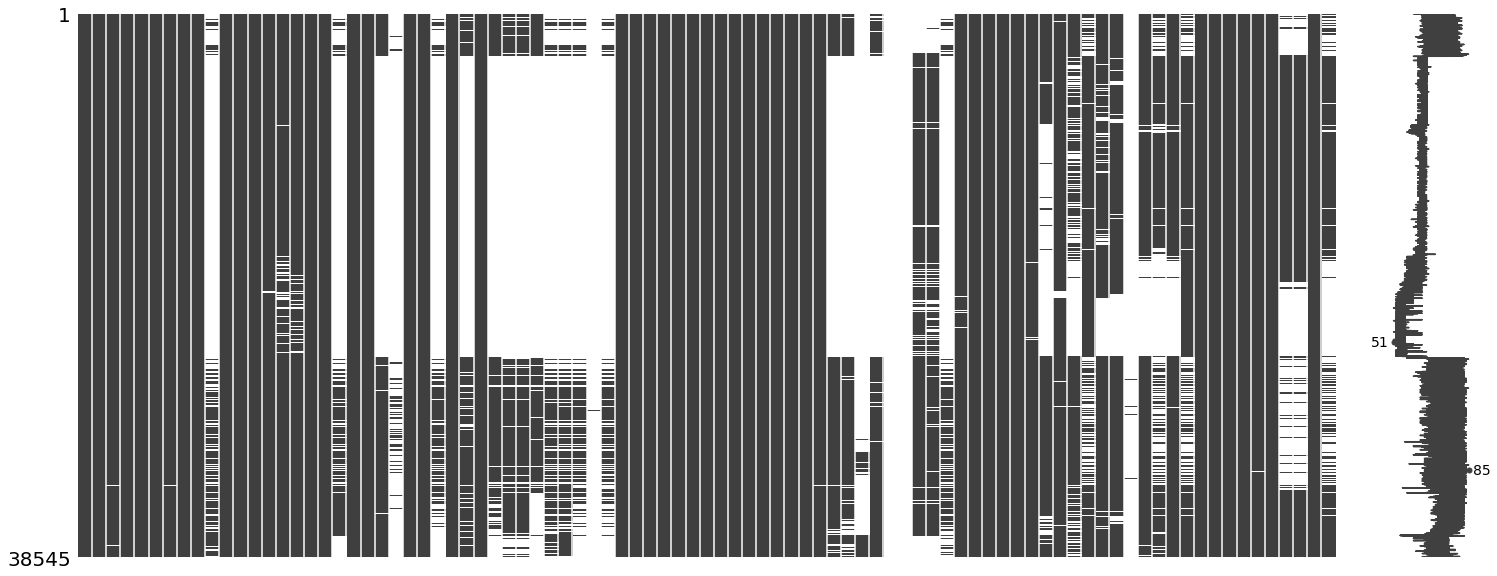

In [30]:
msno.matrix(data_cruzada)

In [31]:
data_cruzada['Cargo Estandarizado'].unique()

array(['Gerente', 'Operario', 'Tecnico', nan, 'Ingeniero', 'Ejecutivo',
       'Jefe', 'Docente', 'Apoyo', 'Salud', 'Administrativo',
       'Independiente', 'Otro', 'Analista', 'Supervisor', 'Encargado'],
      dtype=object)

In [32]:
prom_sueldos= data_cruzada[['Renta Liquida', 'Cargo Estandarizado']].groupby('Cargo Estandarizado').median()
prom_sueldos= prom_sueldos.reset_index()
prom_sueldos

,Cargo Estandarizado,Renta Liquida
0,Administrativo,850000
1,Analista,1200000
2,Apoyo,950000
3,Docente,1000000
4,Ejecutivo,1300000
5,Encargado,1450000
6,Gerente,2500000
7,Independiente,2000000
8,Ingeniero,1557500
9,Jefe,1500000


In [33]:
prueba = prom_sueldos
prueba['Diferencia'] = abs(prueba['Renta Liquida'] - data_cruzada['Renta Liquida'][38373])

In [34]:
prueba

,Cargo Estandarizado,Renta Liquida,Diferencia
0,Administrativo,850000,150000
1,Analista,1200000,500000
2,Apoyo,950000,250000
3,Docente,1000000,300000
4,Ejecutivo,1300000,600000
5,Encargado,1450000,750000
6,Gerente,2500000,1800000
7,Independiente,2000000,1300000
8,Ingeniero,1557500,857500
9,Jefe,1500000,800000


In [35]:
#Se guarda la base de datos

data_cruzada.to_excel('data_cargos_estandar.xlsx')

In [36]:
#Se arreglan los datos en la columna cargo para gerentes

for i in range(data_cruzada.shape[0]):
    if (data_cruzada['Cargo Estandarizado'][i]=='Gerente' and data_cruzada['Renta Liquida'][i]<= 1000000):
        data_cruzada.loc[i, ['Renta Liquida']] += 2000000
        
    if (data_cruzada['Cargo Estandarizado'][i]=='Gerente' and 1000000< data_cruzada['Renta Liquida'][i]<= 2000000):
        data_cruzada.loc[i, ['Renta Liquida']] += 1500000

In [37]:
data_cruzada

,Unnamed: 0,ID,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Inmobiliaria,Proyecto,Etapa,Fecha escritura firmada por cliente,...,Antiguedad Laboral,Antiguedad Laboral (Meses),Cargo,Renta Liquida,Renta Variable,Rango de Ingresos,N° De Activos,N° De Pasivos,Profesion (Estandar),Cargo Estandarizado
0,0,191503,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Dunas de Costa Laguna,DUNAS C8 - ETAPA 1,NaT,...,1,6,gerente de operaciones,3500000,2000000,1.500.001 y 2.000.000,NaN,NaN,Otros,Gerente
1,5,191497,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Dunas de Costa Laguna,DUNAS C8 - ETAPA 1,NaT,...,2,10,operador process,2300000,2300000,Sobre 2.000.000,NaN,NaN,Universitarios,Operario
2,6,191496,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Puerta del Norte,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,...,1,0,tecnico,450000,0,Hasta 500.000,0.0,0.0,Otros,Tecnico
3,7,191495,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Puerta del Norte,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,...,1,0,tecnico,450000,0,Hasta 500.000,0.0,0.0,Otros,Tecnico
4,9,191493,No,212516095,3-ZONA SUR,BIO-BIO,Gestion Monte Santo,Parque Torreones,Parque Torreones etapa 1B,NaT,...,9,1,nan,3800000,3800000,Sobre 2.000.000,NaN,NaN,Otros,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38540,49552,3693,NaN,212347406,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-01-03,...,0,10,jefe,830000,830000,Entre 500.001 y 1.000.000,0.0,0.0,Otros,Jefe
38541,49553,3692,NaN,212347047,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-01-03,...,0,18,supervisor,672000,672000,Entre 500.001 y 1.000.000,0.0,0.0,Universitarios,Supervisor
38542,49555,3690,Si,212335257,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,NaT,...,0,99,administrativo,370000,370000,Hasta 500.000,0.0,0.0,Otros,Administrativo
38543,49557,3686,NaN,212344850,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista,Cipreses de Bellavista C2b-2,2011-04-18,...,0,12,administrativo,400000,400000,Hasta 500.000,0.0,0.0,Universitarios,Administrativo


In [38]:
for i in range(data_cruzada.shape[0]):
    
    if 0<= data_cruzada['Renta Liquida'][i] <= 500000:
        data_cruzada.loc[i,['Rango de Ingresos']] = 'Hasta 500.000'
    elif 500000< data_cruzada['Renta Liquida'][i] <= 1000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = 'Entre 500.001 y 1.000.000'
    elif 1000000< data_cruzada['Renta Liquida'][i] <= 1500000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '1.000.001 y 1.500.000'
    elif 1500000< data_cruzada['Renta Liquida'][i] <= 2000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '1.500.001 y 2.000.000'
    elif 2000000< data_cruzada['Renta Liquida'][i] <= 2500000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '2.000.001 y 2.500.000'
    elif 2500000< data_cruzada['Renta Liquida'][i] <= 3000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '2.500.001 y 3.000.000'    
    elif 3000000< data_cruzada['Renta Liquida'][i] <= 4000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '3.000.001 y 4.000.000'
    elif 4000000< data_cruzada['Renta Liquida'][i] <= 6000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '4.000.001 y 6.000.000'
    elif 6000000< data_cruzada['Renta Liquida'][i] <= 8000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '6.000.001 y 8.000.000'
    elif 8000000< data_cruzada['Renta Liquida'][i] <= 10000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '8.000.001 y 10.000.000'
    elif 10000000< data_cruzada['Renta Liquida'][i] <= 20000000:
        data_cruzada.loc[i,['Rango de Ingresos']] = '10.000.001 y 20.000.000'
    else:
        data_cruzada.loc[i,['Rango de Ingresos']] = 'Sobre 20.000.000'

# Imputación de datos para la columna Cargo Estandarizado

In [39]:
def indice(df):
    min = 0
    for i in range(1,df.shape[0]):
        if df['Diferencia'][i] < df['Diferencia'][min]:
            min = i
    return min

In [40]:
for i in range(data_cruzada.shape[0]):
    if str(data_cruzada['Cargo Estandarizado'][i]) == 'nan':
        df_sueldos = prom_sueldos
        df_sueldos['Diferencia'] = abs(df_sueldos['Renta Liquida'] - data_cruzada['Renta Liquida'][i])
        data_cruzada.loc[i, ['Cargo Estandarizado']] = df_sueldos['Cargo Estandarizado'][indice(df_sueldos)]

Text(0.5, 1.0, 'Distribucion de ingresos')

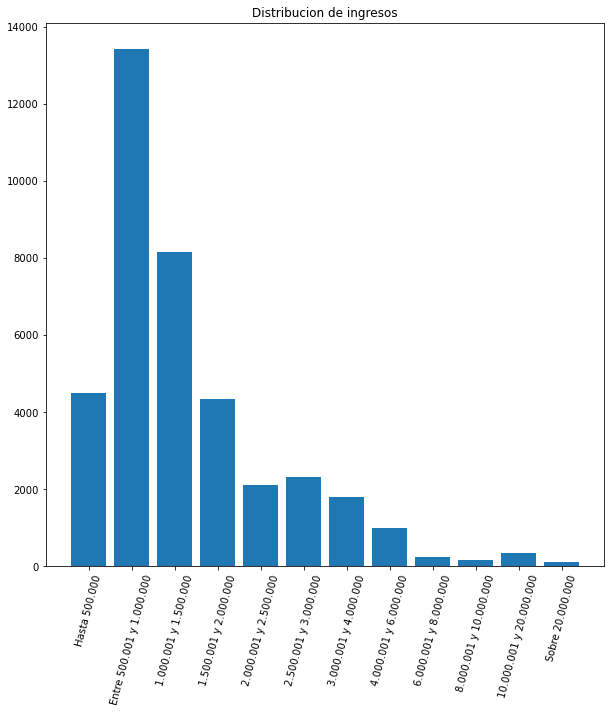

In [41]:
dic_ing_cruzada= dict()

for i in range(data_cruzada.shape[0]):
    if str(data_cruzada['Rango de Ingresos'][i]) not in list(dic_ing_cruzada.keys()):
        dic_ing_cruzada[str(data_cruzada['Rango de Ingresos'][i])] =1
    else:
        dic_ing_cruzada[str(data_cruzada['Rango de Ingresos'][i])] += 1
        

df_ingresos_cruzada = pd.DataFrame(columns= ['Ingresos', 'frecuencia'])

for i in range(len(dic_ing_cruzada)):
    df_ingresos_cruzada.loc[i] = [list(dic_ing_cruzada.keys())[i], list(dic_ing_cruzada.values())[i]]

l = [2, 4, 3, 5, 1, 6, 0, 7, 8, 10, 9, 11]
df_ingresos_cruzada_ordenada =  pd.DataFrame(columns= ['Ingresos', 'frecuencia'])

for i in l:
    df_ingresos_cruzada_ordenada.loc[i] = [df_ingresos_cruzada['Ingresos'][i], df_ingresos_cruzada['frecuencia'][i]]
df_ingresos_cruzada_ordenada = df_ingresos_cruzada_ordenada.reset_index(drop=True)


plt.figure(figsize=(10,10))

plt.bar(df_ingresos_cruzada_ordenada['Ingresos'],df_ingresos_cruzada_ordenada['frecuencia'])
plt.xticks(rotation=75)
plt.title('Distribucion de ingresos')

# Generamos combinaciones de estados

In [42]:
estado_cof = data_cruzada['Estado Carta Oferta'].unique().tolist()

In [43]:
estado_comercial_cof = data_cruzada['Estado Comercial COF'].unique().tolist()

In [44]:
comb = []
k=1
for i in range(len(estado_cof)):
    for j in range(len(estado_comercial_cof)):
        comb.append((estado_cof[i], estado_comercial_cof[j]))

In [45]:
comb

[('PPM', 'Normal'),
 ('PPM', 'Por Autorizar Desistimiento'),
 ('PPM', 'Traspasada'),
 ('PPM', 'Desistimiento'),
 ('PPM', 'En Traspaso'),
 ('PPM', 'Por Autorizar Cambio de Titular'),
 ('PPM', 'Por Autorizar Traspaso'),
 ('PPM', 'Traspaso Entre Empresa'),
 ('Con Promesa', 'Normal'),
 ('Con Promesa', 'Por Autorizar Desistimiento'),
 ('Con Promesa', 'Traspasada'),
 ('Con Promesa', 'Desistimiento'),
 ('Con Promesa', 'En Traspaso'),
 ('Con Promesa', 'Por Autorizar Cambio de Titular'),
 ('Con Promesa', 'Por Autorizar Traspaso'),
 ('Con Promesa', 'Traspaso Entre Empresa'),
 ('Reserva', 'Normal'),
 ('Reserva', 'Por Autorizar Desistimiento'),
 ('Reserva', 'Traspasada'),
 ('Reserva', 'Desistimiento'),
 ('Reserva', 'En Traspaso'),
 ('Reserva', 'Por Autorizar Cambio de Titular'),
 ('Reserva', 'Por Autorizar Traspaso'),
 ('Reserva', 'Traspaso Entre Empresa'),
 ('Cerrada/Escriturada', 'Normal'),
 ('Cerrada/Escriturada', 'Por Autorizar Desistimiento'),
 ('Cerrada/Escriturada', 'Traspasada'),
 ('Cerrad

In [46]:
elim_columnas = ['Nombre Cliente', 'Proyecto','Nombre PEP2','Telefono', 'Celular', 'Email Cliente', 'Firma cliente', 
                 'Problemas Operaciones 2', 'Modificado por', 'Fecha de proyeccion', 'Ejecutivo CCE', 'Ultimo comentario', 
                 'Fecha Último Comentario', 'Nombre Vendedor', 'Jefe Comercial', 'Gerente Zonal', 'Rut', 'Situacion Laboral',
                 'Complemente Renta', 'Empleador', 'Antiguedad Laboral (Meses)',
                'Renta Variable', 'N° De Activos', 'N° De Pasivos', 'Profesion']

In [47]:
por_limpiar = data_cruzada.drop(elim_columnas, axis=1)

<AxesSubplot:>

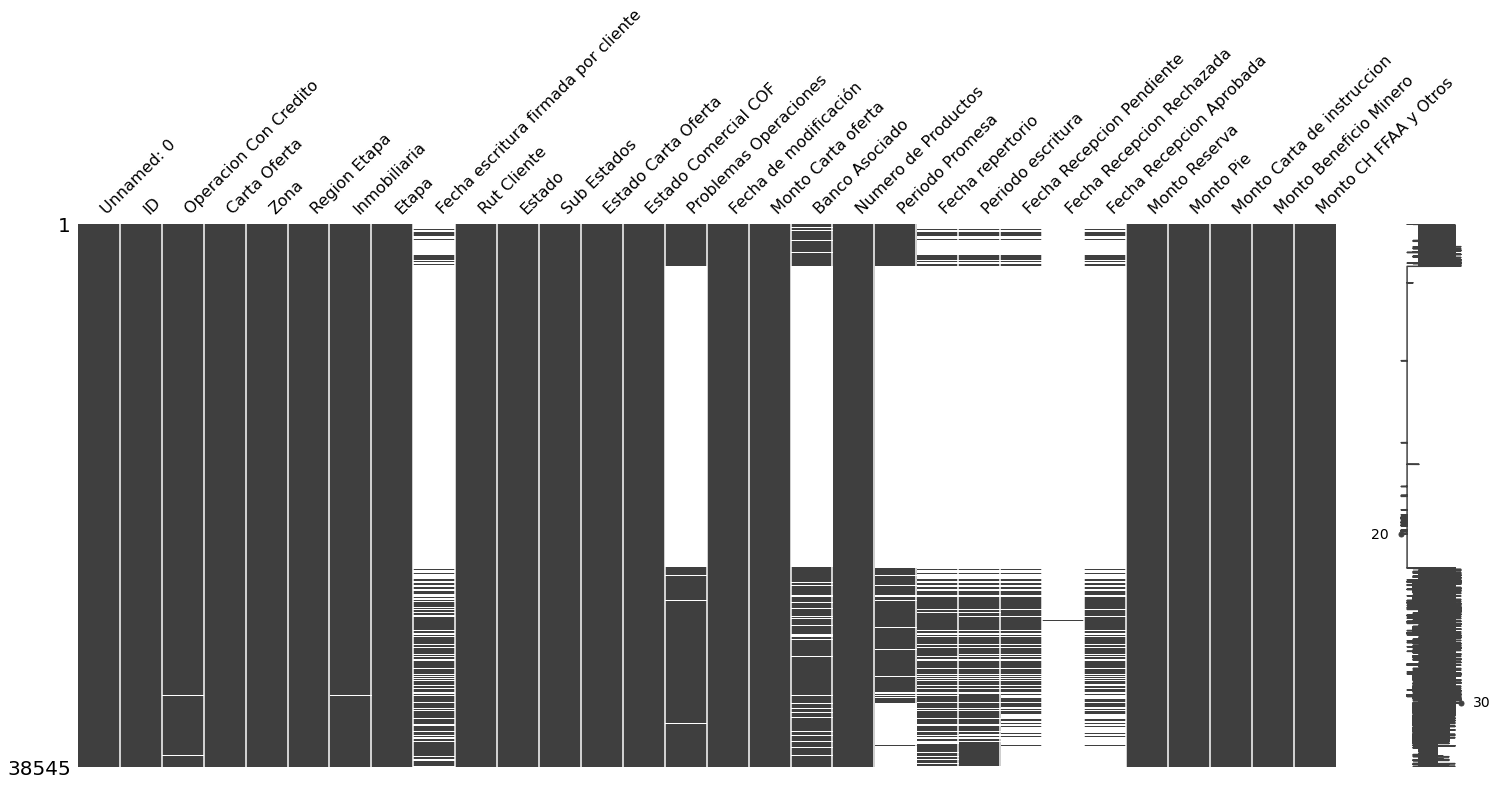

In [48]:
msno.matrix(por_limpiar[por_limpiar.columns[:30]])

<AxesSubplot:>

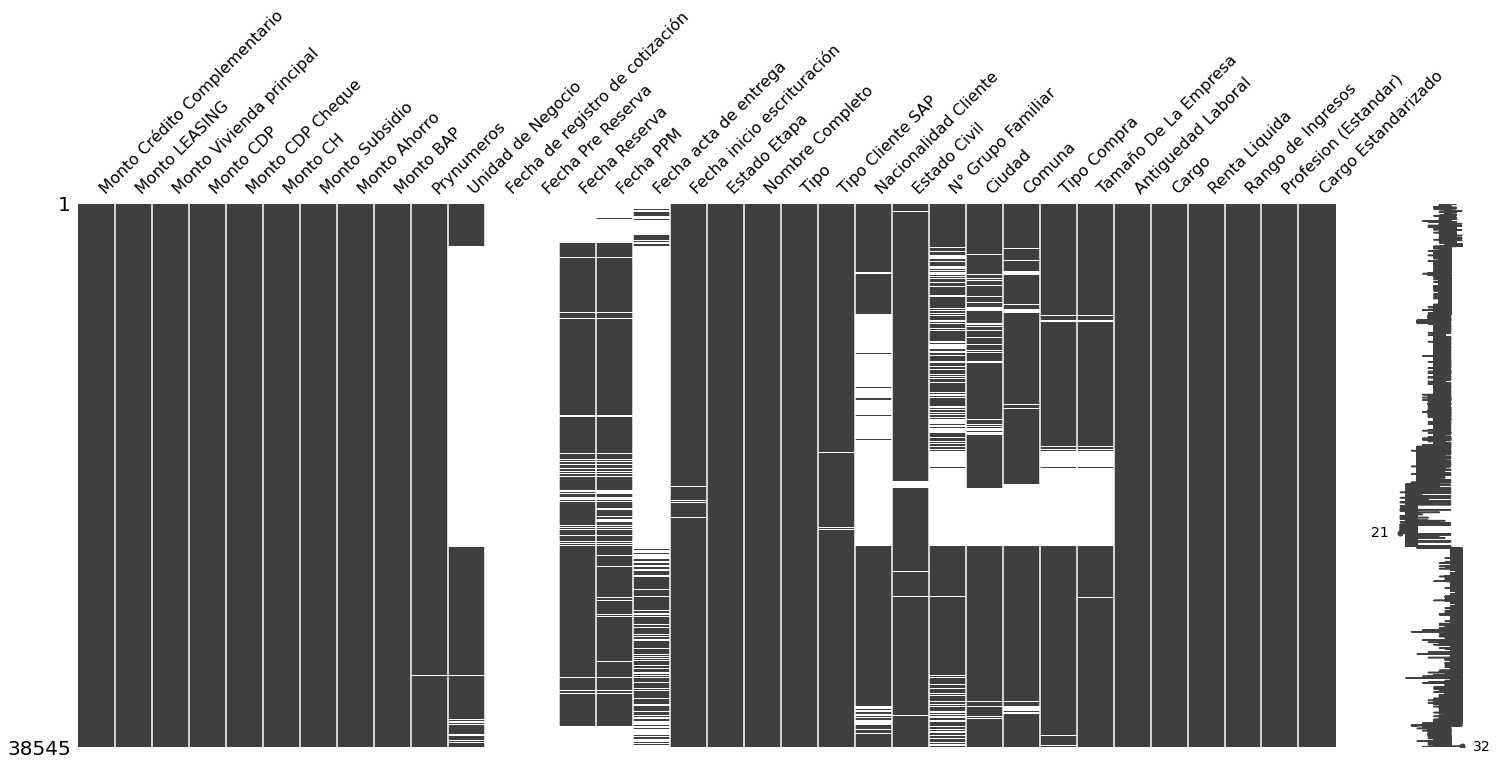

In [49]:
msno.matrix(por_limpiar[por_limpiar.columns[30:]])

In [50]:
por_limpiar['N° Grupo Familiar'].unique()

array(['5', '2', nan, '3', 'Sin Información', '4', '1', '6', '8', '7'],
      dtype=object)

# Imputación de datos para la columna N° Grupo Familiar

> Columna con 8 posibles categorías (Números del 1 al 8). Se utiliza la estrategia de imputación por el dato más frecuente, dónde la categoría más frecuente es 2

In [51]:
for i in range(por_limpiar.shape[0]):
    if por_limpiar['N° Grupo Familiar'][i] == 'Sin Información':
        por_limpiar['N° Grupo Familiar'][i] = np.nan

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Pasamos los datos a tipo int**

In [52]:
for i in range(por_limpiar.shape[0]):
    if not pd.isna(por_limpiar['N° Grupo Familiar'][i]):
        por_limpiar['N° Grupo Familiar'][i] = int(por_limpiar['N° Grupo Familiar'][i])

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Realizamos la imputación por el criterio de la moda**

In [53]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = [[i] for i in por_limpiar['N° Grupo Familiar'].values]
imp_mode.fit(X)
X_trans= imp_mode.transform(X)

In [54]:
trans= np.array(X_trans)

In [55]:
por_limpiar['N° Grupo Familiar'] = trans

In [56]:
columnas_esco=['Carta Oferta', 'Zona', 'Region Etapa','Inmobiliaria', 'Etapa', 'Estado Carta Oferta',
                      'Estado Comercial COF', 'Monto Reserva', 'Monto Pie', 'Monto Carta de instruccion',
                      'Monto Beneficio Minero', 'Monto CH FFAA y Otros','Monto Crédito Complementario', 'Monto LEASING',
                      'Monto Vivienda principal', 'Monto CDP', 'Monto CDP Cheque', 'Monto CH',
                      'Monto Subsidio', 'Monto Ahorro', 'Monto BAP', 'Nacionalidad Cliente',
                      'Estado Civil', 'N° Grupo Familiar', 'Tipo Compra',
                      'Tamaño De La Empresa', 'Antiguedad Laboral', 'Cargo',
                      'Rango de Ingresos', 'Profesion (Estandar)', 'Cargo Estandarizado', 'Renta Liquida']

<AxesSubplot:>

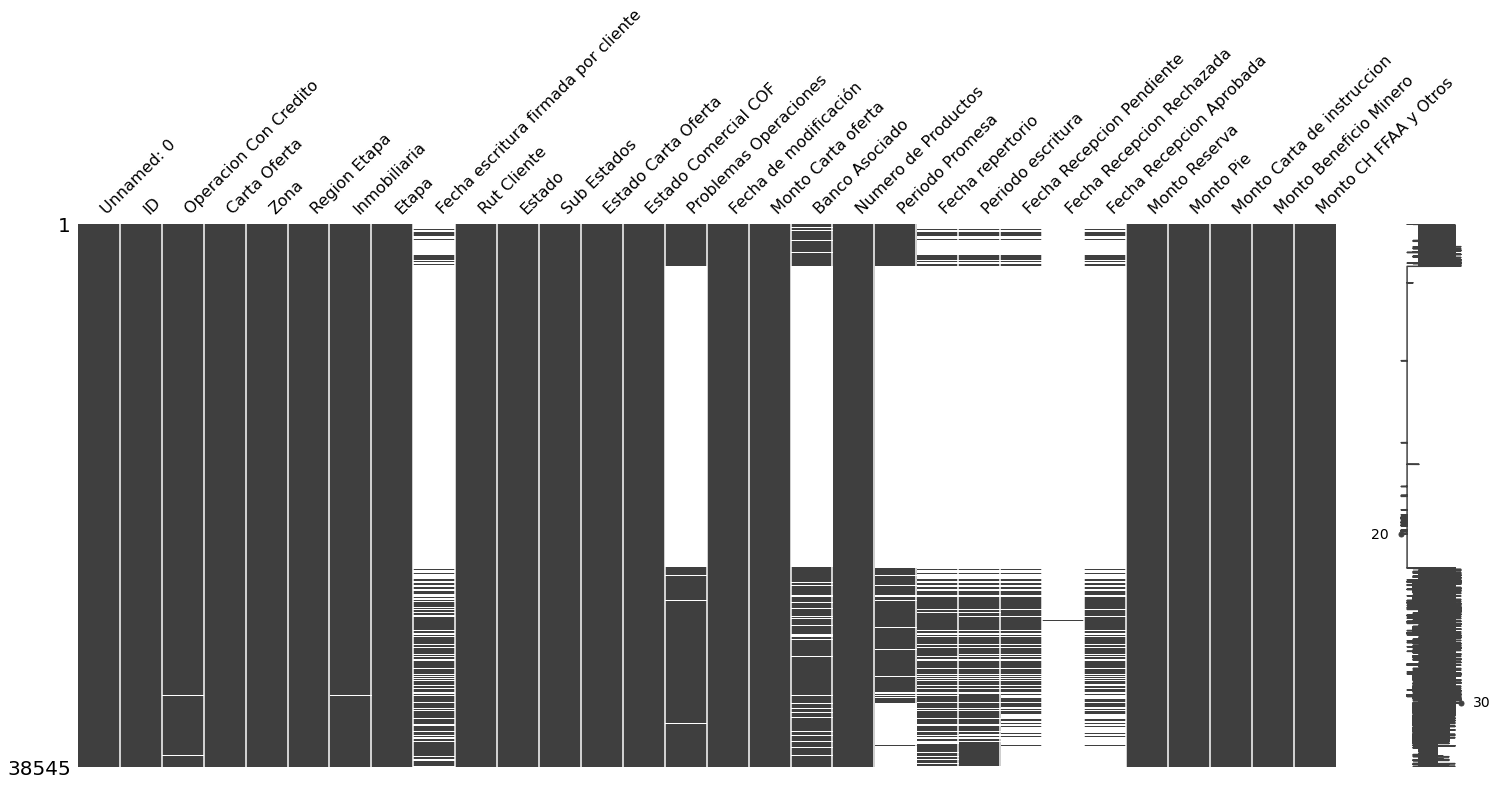

In [57]:
msno.matrix(por_limpiar[por_limpiar.columns[:30]])

<AxesSubplot:>

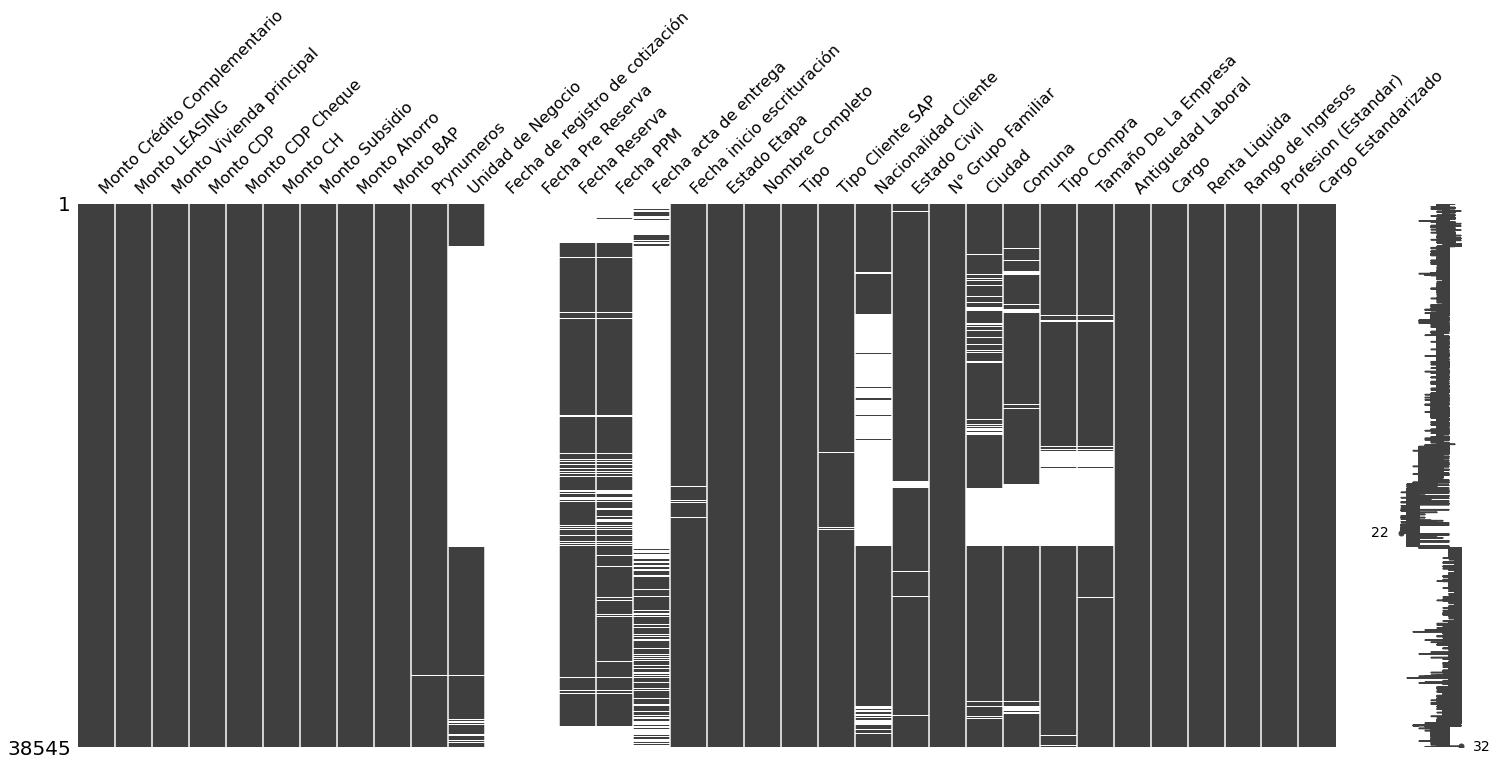

In [58]:
msno.matrix(por_limpiar[por_limpiar.columns[30:]])

# Imputación columna Tipo Compra

Esta columna cuenta con 4 categorías. La estrategia para imputar será a través de la categoría más frecuente.
Las posibles categorías son

> - Primera Vivienda
> - Segunda Vivienda
> - Vivienda Inversion
> - Otros

Dónde la categoría más frecuente es **Primera Vivienda**

In [59]:
por_limpiar['Tipo Compra'].unique()

array(['Primera Vivienda', 'Segunda Vivienda', 'Vivienda Inversion',
       'Otros', nan], dtype=object)

In [60]:
from sklearn import preprocessing
from scipy.stats import mode

In [61]:
le = preprocessing.LabelEncoder()
le.fit(['Primera Vivienda', 'Segunda Vivienda', 'Vivienda Inversion', 'Otros'])

LabelEncoder()

**Cambiamos las categorias a numericas**

In [62]:
for i in range(por_limpiar.shape[0]):
    if not pd.isna(por_limpiar['Tipo Compra'][i]):
        por_limpiar.loc[i,['Tipo Compra']] = le.transform([por_limpiar['Tipo Compra'][i]])[0]

In [63]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = [[i] for i in por_limpiar['Tipo Compra']]
imp_mode.fit(X)
X_trans= imp_mode.transform(X)

In [64]:
por_limpiar['Tipo Compra'] = X_trans

In [65]:
for i in range(por_limpiar.shape[0]):
    por_limpiar.loc[i,['Tipo Compra']] = le.inverse_transform([int(por_limpiar['Tipo Compra'][i])])[0]

<AxesSubplot:>

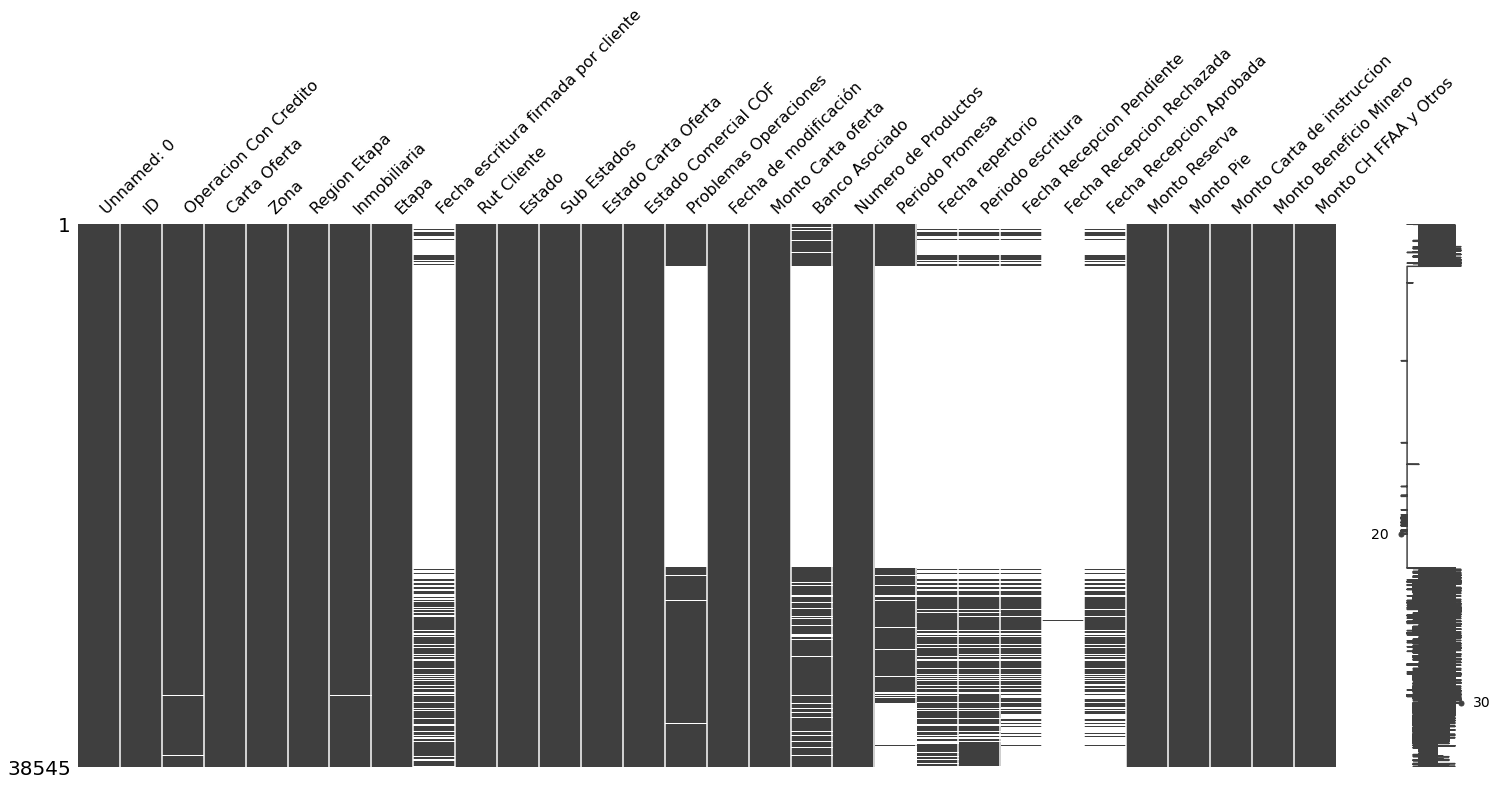

In [66]:
msno.matrix(por_limpiar[por_limpiar.columns[:30]])

<AxesSubplot:>

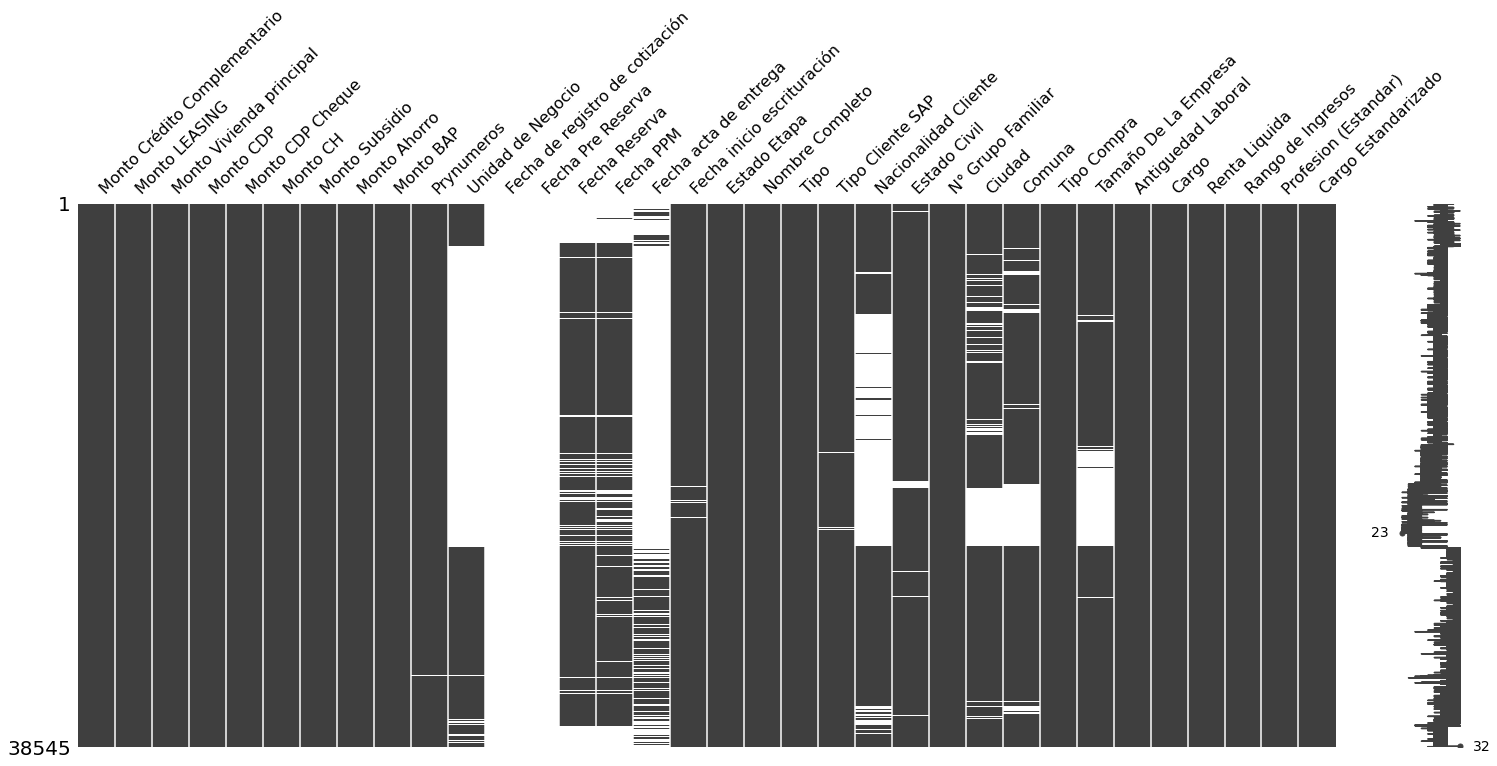

In [67]:
msno.matrix(por_limpiar[por_limpiar.columns[30:]])

# Imputación Columna Estado Civil

Columna con 7 posibles categorías, correspondientes a

> - Soltero(a)
> - Casado(a)
> - Divorciado(a)
> - Separado(a)
> - Sin Información
> - Viudo(a)
> - Unión Civil


Todos los valores nan y de la categoría Sin Información serán imputados por la categoría más común, correspondiente a **Soltero(a)**

In [68]:
por_limpiar['Estado Civil'].unique()

array(['Soltero(a)', 'Casado(a)', 'Divorciado(a)', nan, 'Separado(a)',
       'Sin Información', 'Viudo(a)', 'Unión Civil'], dtype=object)

In [69]:
for i in range(por_limpiar.shape[0]):
    if pd.isna(por_limpiar['Estado Civil'][i]) or por_limpiar['Estado Civil'][i]=='Sin Información':
        por_limpiar.loc[i,['Estado Civil']] = 'Soltero(a)'

# Imputación columna Nacionalidades

Columna con 18 posibles categorías correspondientes a

> - Chilena
> - Colombiana
> - Alemana 
> - Venezonala
> - Ecuatoriana
> - Boliviana
> - Extranjera
> - Peruana
> - Uruguaya
> - China
> - Argentina
> - Española
> - Brasileña
> - Paraguaya
> - Cubana
> - Sin Información
> - Salvadoreña
> - Italiana

Dónde el 97% de los clientes tienen nacionalidad chilena. Por lo que los valores NaN y Sin Información serán imputados por **Chilena**

In [70]:
por_limpiar['Nacionalidad Cliente'].unique()

array(['Chilena', 'Colombiana', 'Alemana', 'Venezolana', 'Ecuatoriana',
       nan, 'Boliviana', 'Extranjera', 'Peruana', 'Uruguaya', 'China',
       'Argentina', 'Española', 'Brasileña', 'Paraguaya', 'Cubana',
       'Sin Información', 'Salvadoreña', 'Italiana'], dtype=object)

In [71]:
dic_nacionalidades= dict()

for i in range(por_limpiar.shape[0]):
    if pd.isna(por_limpiar['Nacionalidad Cliente'][i]):
        continue
        
    if str(por_limpiar['Nacionalidad Cliente'][i]) not in list(dic_nacionalidades.keys()):
        dic_nacionalidades[str(por_limpiar['Nacionalidad Cliente'][i])] =1
    else:
        dic_nacionalidades[str(por_limpiar['Nacionalidad Cliente'][i])] += 1
        

df_nacionalidades = pd.DataFrame(columns= ['Nacionalidad', 'frecuencia'])

for i in range(len(dic_nacionalidades)):
    df_nacionalidades.loc[i] = [list(dic_nacionalidades.keys())[i], list(dic_nacionalidades.values())[i]]


In [72]:
df_nacionalidades

,Nacionalidad,frecuencia
0,Chilena,20824
1,Colombiana,59
2,Alemana,3
3,Venezolana,157
4,Ecuatoriana,31
5,Boliviana,17
6,Extranjera,210
7,Peruana,51
8,Uruguaya,4
9,China,10


In [73]:
for i in range(por_limpiar.shape[0]):
    if pd.isna(por_limpiar['Nacionalidad Cliente'][i]) or por_limpiar['Nacionalidad Cliente'][i]=='Sin Información':
        por_limpiar.loc[i,['Nacionalidad Cliente']] = 'Chilena'

<AxesSubplot:>

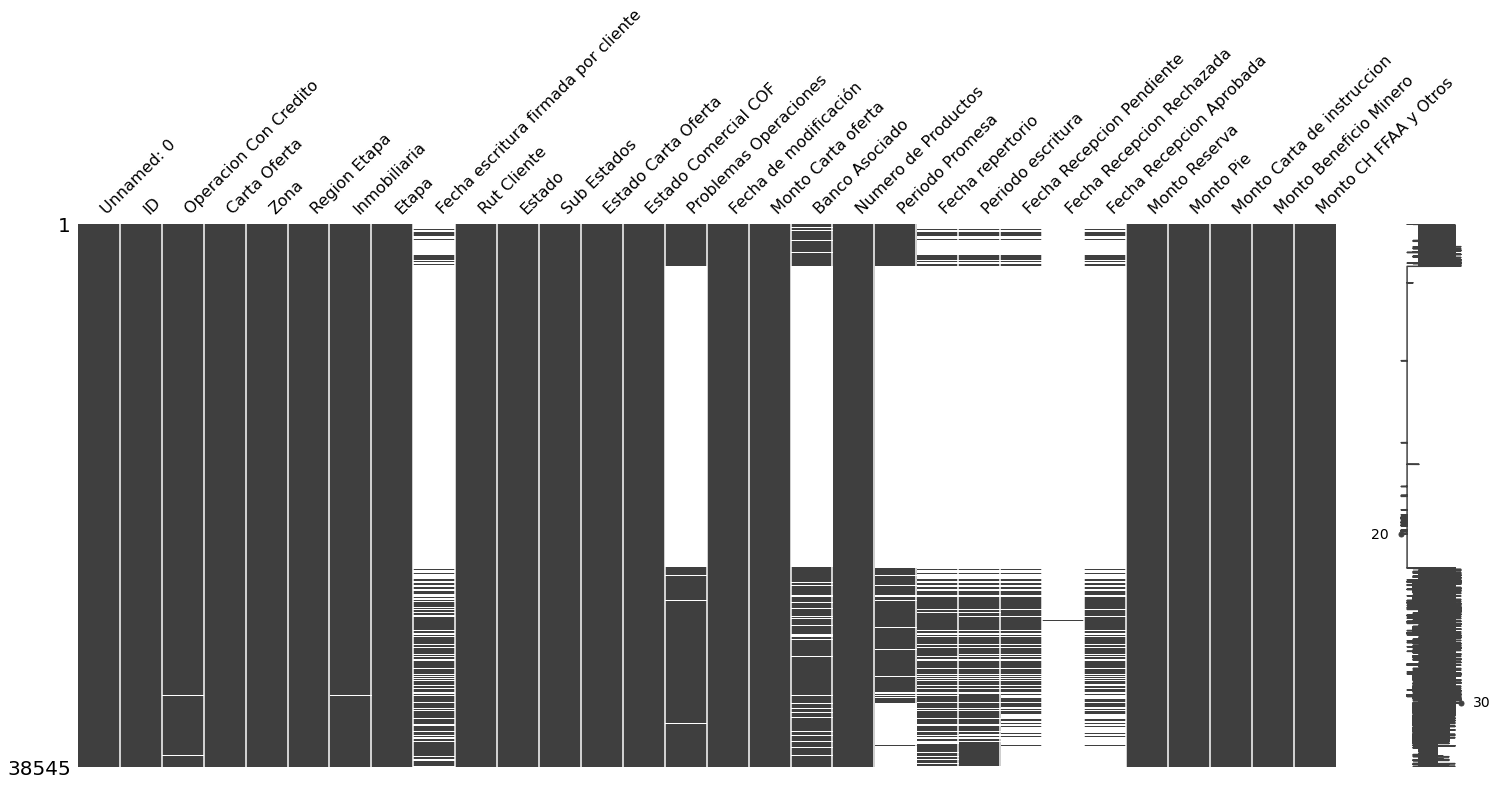

In [74]:
msno.matrix(por_limpiar[por_limpiar.columns[:30]])

<AxesSubplot:>

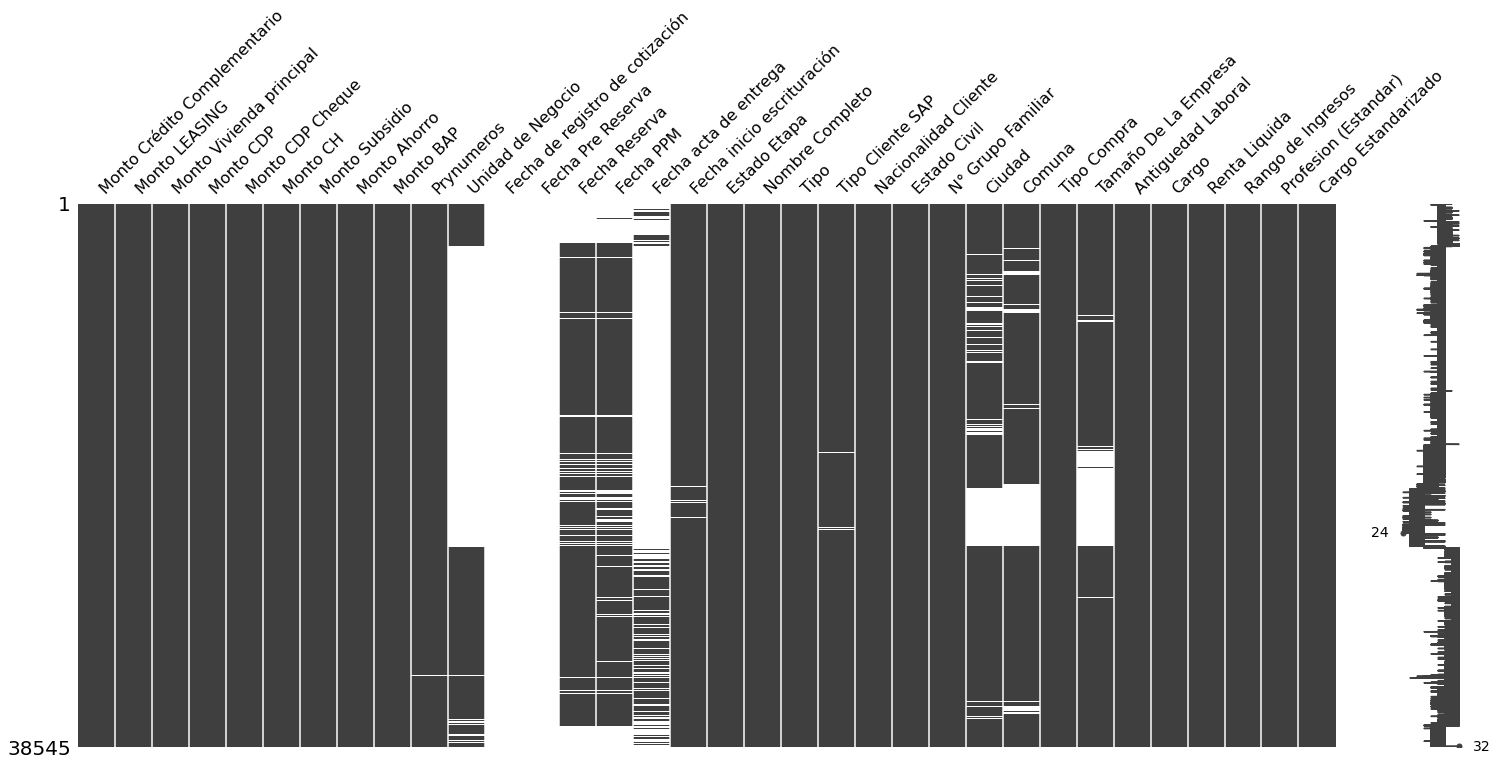

In [75]:
msno.matrix(por_limpiar[por_limpiar.columns[30:]])

In [76]:
dic_com= dict()

for i in range(por_limpiar.shape[0]):
    if str(por_limpiar['Comuna'][i]) not in list(dic_com.keys()):
        dic_com[str(por_limpiar['Comuna'][i])] =1
    else:
        dic_com[str(por_limpiar['Comuna'][i])] += 1

        
df_comunas = pd.DataFrame(columns= ['Comuna', 'frecuencia'])

for i in range(len(dic_com)):
    df_comunas.loc[i] = [list(dic_com.keys())[i], list(dic_com.values())[i]]

df_comunas

,Comuna,frecuencia
0,María Elena,17
1,Antofagasta,3366
2,Concepción,2585
3,Coquimbo,232
4,Talcahuano,315
...,...,...
270,Nogales,1
271,San Pedro,1
272,Marchigue,1
273,Quillón,1


In [77]:
df_orde = df_comunas.sort_values(by=['frecuencia'],ascending=False).reset_index(drop=True)

# Estimación Rango de edad

In [80]:
import math
import datetime as dt
from dateutil.relativedelta import relativedelta

slope= 3.3363697569700348e-06
intercept= 1932.2573852507373



# Creamos la columna Rango de edad

In [81]:
for i in range(por_limpiar.shape[0]):
    rut = por_limpiar['Rut Cliente'][i].split('-')[0].replace('.', '')
    fecha_nac = int(rut)*slope+intercept
    ano_nac = math.floor(fecha_nac)
    mes_nac = int(round((fecha_nac-ano_nac)*12))
    if mes_nac == 0:
        mes_nac =1
    fecha_nac = dt.date(ano_nac, mes_nac, 1)
    fecha_hoy = dt.date.today()
    edad = relativedelta(fecha_hoy, fecha_nac).years
    
    if por_limpiar['Nacionalidad Cliente'][i] == 'Chilena' and por_limpiar['Tipo'][i] == 'Natural':
        por_limpiar.loc[i, ['Edad']] = int(edad)
    else:
        por_limpiar.loc[i, ['Edad']] = 999999
    
    

In [82]:
por_limpiar

,Unnamed: 0,ID,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Inmobiliaria,Etapa,Fecha escritura firmada por cliente,Rut Cliente,...,Comuna,Tipo Compra,Tamaño De La Empresa,Antiguedad Laboral,Cargo,Renta Liquida,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Edad
0,0,191503,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,DUNAS C8 - ETAPA 1,NaT,18010236-1,...,María Elena,Primera Vivienda,Pequeña,1,gerente de operaciones,3500000,3.000.001 y 4.000.000,Otros,Gerente,28.0
1,5,191497,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,DUNAS C8 - ETAPA 1,NaT,19104385-5,...,Antofagasta,Primera Vivienda,Grande,2,operador process,2300000,2.000.001 y 2.500.000,Universitarios,Operario,25.0
2,6,191496,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,17718590-6,...,Antofagasta,Primera Vivienda,Pequeña,1,tecnico,450000,Hasta 500.000,Otros,Tecnico,29.0
3,7,191495,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,17718590-6,...,Antofagasta,Primera Vivienda,Pequeña,1,tecnico,450000,Hasta 500.000,Otros,Tecnico,29.0
4,9,191493,No,212516095,3-ZONA SUR,BIO-BIO,Gestion Monte Santo,Parque Torreones etapa 1B,NaT,9213925-5,...,Concepción,Segunda Vivienda,Grande,9,nan,3800000,3.000.001 y 4.000.000,Otros,Gerente,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38540,49552,3693,NaN,212347406,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-01-03,5188730-1,...,Ranquil,Primera Vivienda,Pequeña,0,jefe,830000,Entre 500.001 y 1.000.000,Otros,Jefe,71.0
38541,49553,3692,NaN,212347047,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-01-03,12015044-8,...,Concepción,Primera Vivienda,Mediana,0,supervisor,672000,Entre 500.001 y 1.000.000,Universitarios,Supervisor,48.0
38542,49555,3690,Si,212335257,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,NaT,12973677-1,...,Hualpén,Primera Vivienda,Mediana,0,administrativo,370000,Hasta 500.000,Otros,Administrativo,45.0
38543,49557,3686,NaN,212344850,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-04-18,14059574-8,...,Hualpén,Primera Vivienda,Grande,0,administrativo,400000,Hasta 500.000,Universitarios,Administrativo,42.0


In [83]:
for i in range(por_limpiar.shape[0]):
    if por_limpiar['Edad'][i] <=18 or por_limpiar['Edad'][i] >=100:
        por_limpiar['Edad'][i] = 999999

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
for i in range(por_limpiar.shape[0]):
    
    if por_limpiar['Edad'][i] == 999999:
        continue
    
    if 19 <= por_limpiar['Edad'][i] <= 25:
        por_limpiar.loc[i,['Rango de Edad']] = '19-25'
        
    elif 25 < por_limpiar['Edad'][i] <= 30:
        por_limpiar.loc[i,['Rango de Edad']] = '26-30'
    
    elif 30 < por_limpiar['Edad'][i] <= 35:
        por_limpiar.loc[i,['Rango de Edad']] = '31-35'
    
    elif 35 < por_limpiar['Edad'][i] <= 40:
        por_limpiar.loc[i,['Rango de Edad']] = '36-40'
        
    elif 40 < por_limpiar['Edad'][i] <= 45:
        por_limpiar.loc[i,['Rango de Edad']] = '41-45'
        
    elif 45 < por_limpiar['Edad'][i] <= 50:
        por_limpiar.loc[i,['Rango de Edad']] = '46-50'
        
    elif 50 < por_limpiar['Edad'][i] <= 55:
        por_limpiar.loc[i,['Rango de Edad']] = '51-55'
        
    elif 55 < por_limpiar['Edad'][i] <= 60:
        por_limpiar.loc[i,['Rango de Edad']] = '56-60'
    
    elif 60 < por_limpiar['Edad'][i] <= 65:
        por_limpiar.loc[i,['Rango de Edad']] = '61-65'
        
    elif 65 < por_limpiar['Edad'][i] <= 70:
        por_limpiar.loc[i,['Rango de Edad']] = '66-70'
        
    elif 70 < por_limpiar['Edad'][i] <= 75:
        por_limpiar.loc[i,['Rango de Edad']] = '71-75'
        
    elif 75 < por_limpiar['Edad'][i] <= 80:
        por_limpiar.loc[i,['Rango de Edad']] = '76-80'
    
    else:
        por_limpiar.loc[i,['Rango de Edad']] = 'sobre 80'

In [85]:
por_limpiar

,Unnamed: 0,ID,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Inmobiliaria,Etapa,Fecha escritura firmada por cliente,Rut Cliente,...,Tipo Compra,Tamaño De La Empresa,Antiguedad Laboral,Cargo,Renta Liquida,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Edad,Rango de Edad
0,0,191503,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,DUNAS C8 - ETAPA 1,NaT,18010236-1,...,Primera Vivienda,Pequeña,1,gerente de operaciones,3500000,3.000.001 y 4.000.000,Otros,Gerente,28.0,26-30
1,5,191497,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,DUNAS C8 - ETAPA 1,NaT,19104385-5,...,Primera Vivienda,Grande,2,operador process,2300000,2.000.001 y 2.500.000,Universitarios,Operario,25.0,19-25
2,6,191496,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,17718590-6,...,Primera Vivienda,Pequeña,1,tecnico,450000,Hasta 500.000,Otros,Tecnico,29.0,26-30
3,7,191495,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,Inmobiliaria Ciudad del Norte S.A.,Condominio Puerta del Norte Etapa 1 Sub etapa 2,NaT,17718590-6,...,Primera Vivienda,Pequeña,1,tecnico,450000,Hasta 500.000,Otros,Tecnico,29.0,26-30
4,9,191493,No,212516095,3-ZONA SUR,BIO-BIO,Gestion Monte Santo,Parque Torreones etapa 1B,NaT,9213925-5,...,Segunda Vivienda,Grande,9,nan,3800000,3.000.001 y 4.000.000,Otros,Gerente,58.0,56-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38540,49552,3693,NaN,212347406,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-01-03,5188730-1,...,Primera Vivienda,Pequeña,0,jefe,830000,Entre 500.001 y 1.000.000,Otros,Jefe,71.0,71-75
38541,49553,3692,NaN,212347047,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-01-03,12015044-8,...,Primera Vivienda,Mediana,0,supervisor,672000,Entre 500.001 y 1.000.000,Universitarios,Supervisor,48.0,46-50
38542,49555,3690,Si,212335257,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,NaT,12973677-1,...,Primera Vivienda,Mediana,0,administrativo,370000,Hasta 500.000,Otros,Administrativo,45.0,41-45
38543,49557,3686,NaN,212344850,3-ZONA SUR,BIO-BIO,Inmobiliaria Los Cipreses S.A.,Cipreses de Bellavista C2b-2,2011-04-18,14059574-8,...,Primera Vivienda,Grande,0,administrativo,400000,Hasta 500.000,Universitarios,Administrativo,42.0,41-45


In [86]:
#Rango de edad mas frecuente

por_limpiar['Rango de Edad'].mode()

0    41-45
dtype: object

In [87]:
dic_rang_edad= dict()

for i in range(por_limpiar.shape[0]):
    if str(por_limpiar['Rango de Edad'][i]) not in list(dic_rang_edad.keys()):
        dic_rang_edad[str(por_limpiar['Rango de Edad'][i])] =1
    else:
        dic_rang_edad[str(por_limpiar['Rango de Edad'][i])] += 1

        
df_rango_edad = pd.DataFrame(columns= ['Rango de Edad', 'frecuencia'])

for i in range(len(dic_rang_edad)):
    df_rango_edad.loc[i] = [list(dic_rang_edad.keys())[i], list(dic_rang_edad.values())[i]]

df_rango_edad

,Rango de Edad,frecuencia
0,26-30,2538
1,19-25,334
2,56-60,2708
3,36-40,5752
4,51-55,3497
5,41-45,8404
6,31-35,5709
7,nan,1060
8,46-50,4605
9,61-65,2084


Text(0.5, 1.0, 'Distribucion de edades')

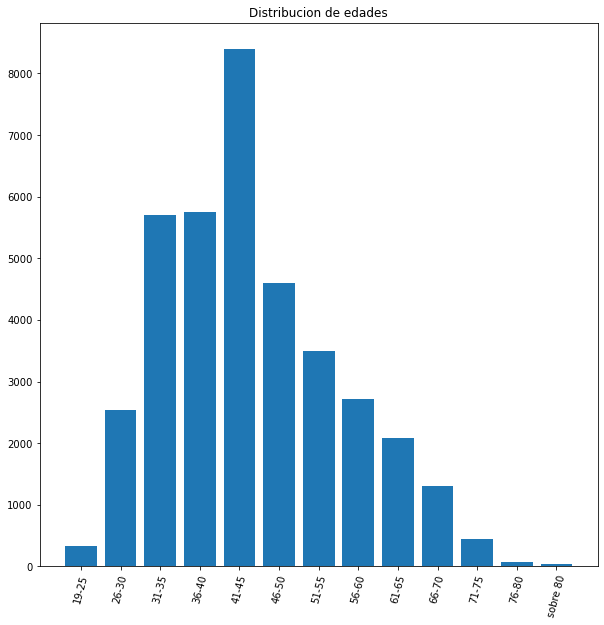

In [88]:
dic_rang_edad= dict()

for i in range(por_limpiar.shape[0]):
    if str(por_limpiar['Rango de Edad'][i]) not in list(dic_rang_edad.keys()):
        dic_rang_edad[str(por_limpiar['Rango de Edad'][i])] =1
    else:
        dic_rang_edad[str(por_limpiar['Rango de Edad'][i])] += 1

        
df_rango_edad = pd.DataFrame(columns= ['Rango de Edad', 'frecuencia'])

for i in range(len(dic_rang_edad)):
    df_rango_edad.loc[i] = [list(dic_rang_edad.keys())[i], list(dic_rang_edad.values())[i]]

df_rango_edad

l = [1, 0, 6, 3, 5, 8, 4, 2, 9, 10, 11, 12, 13]
df_rango_edad_ordenada =  pd.DataFrame(columns= ['Rango de Edad', 'frecuencia'])

for i in l:
    df_rango_edad_ordenada.loc[i] = [df_rango_edad['Rango de Edad'][i], df_rango_edad['frecuencia'][i]]
df_rango_edad_ordenada = df_rango_edad_ordenada.reset_index(drop=True)


plt.figure(figsize=(10,10))

plt.bar(df_rango_edad_ordenada['Rango de Edad'],df_rango_edad_ordenada['frecuencia'])
plt.xticks(rotation=75)
plt.title('Distribucion de edades')

# Imputación columna Rango de Edad

Como se muestra en el gráfico anterior, con la finalidad de hacer más natural la campana, los 1000 valores nan de la columna Rango de Edad serán imputados en el rango de edad 36-40 años

In [89]:
for i in range(por_limpiar.shape[0]):
    if pd.isna(por_limpiar['Rango de Edad'][i]):
        por_limpiar['Rango de Edad'][i] = '36-40'

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Distribucion de edades')

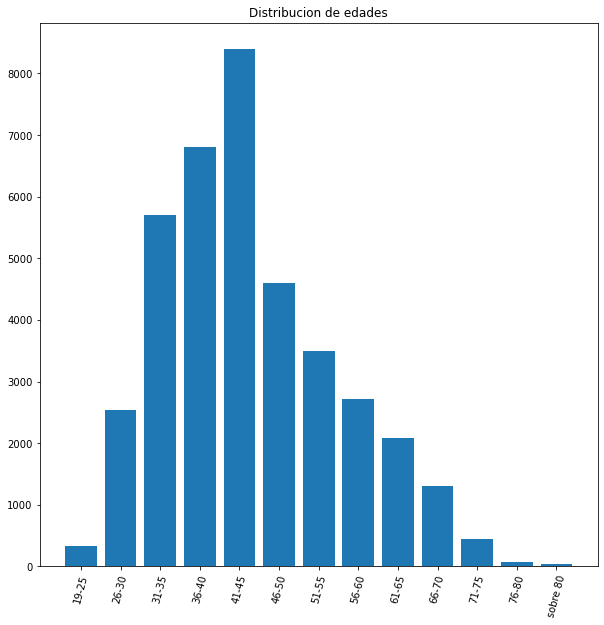

In [90]:
dic_rang_edad= dict()

for i in range(por_limpiar.shape[0]):
    if str(por_limpiar['Rango de Edad'][i]) not in list(dic_rang_edad.keys()):
        dic_rang_edad[str(por_limpiar['Rango de Edad'][i])] =1
    else:
        dic_rang_edad[str(por_limpiar['Rango de Edad'][i])] += 1

        
df_rango_edad = pd.DataFrame(columns= ['Rango de Edad', 'frecuencia'])

for i in range(len(dic_rang_edad)):
    df_rango_edad.loc[i] = [list(dic_rang_edad.keys())[i], list(dic_rang_edad.values())[i]]

df_rango_edad

l = [1, 0, 6, 3, 5, 7, 4, 2, 8, 9, 10, 11, 12]
df_rango_edad_ordenada =  pd.DataFrame(columns= ['Rango de Edad', 'frecuencia'])

for i in l:
    df_rango_edad_ordenada.loc[i] = [df_rango_edad['Rango de Edad'][i], df_rango_edad['frecuencia'][i]]
df_rango_edad_ordenada = df_rango_edad_ordenada.reset_index(drop=True)


plt.figure(figsize=(10,10))

plt.bar(df_rango_edad_ordenada['Rango de Edad'],df_rango_edad_ordenada['frecuencia'])
plt.xticks(rotation=75)
plt.title('Distribucion de edades')

# Estado de la data y selección de variables

<AxesSubplot:>

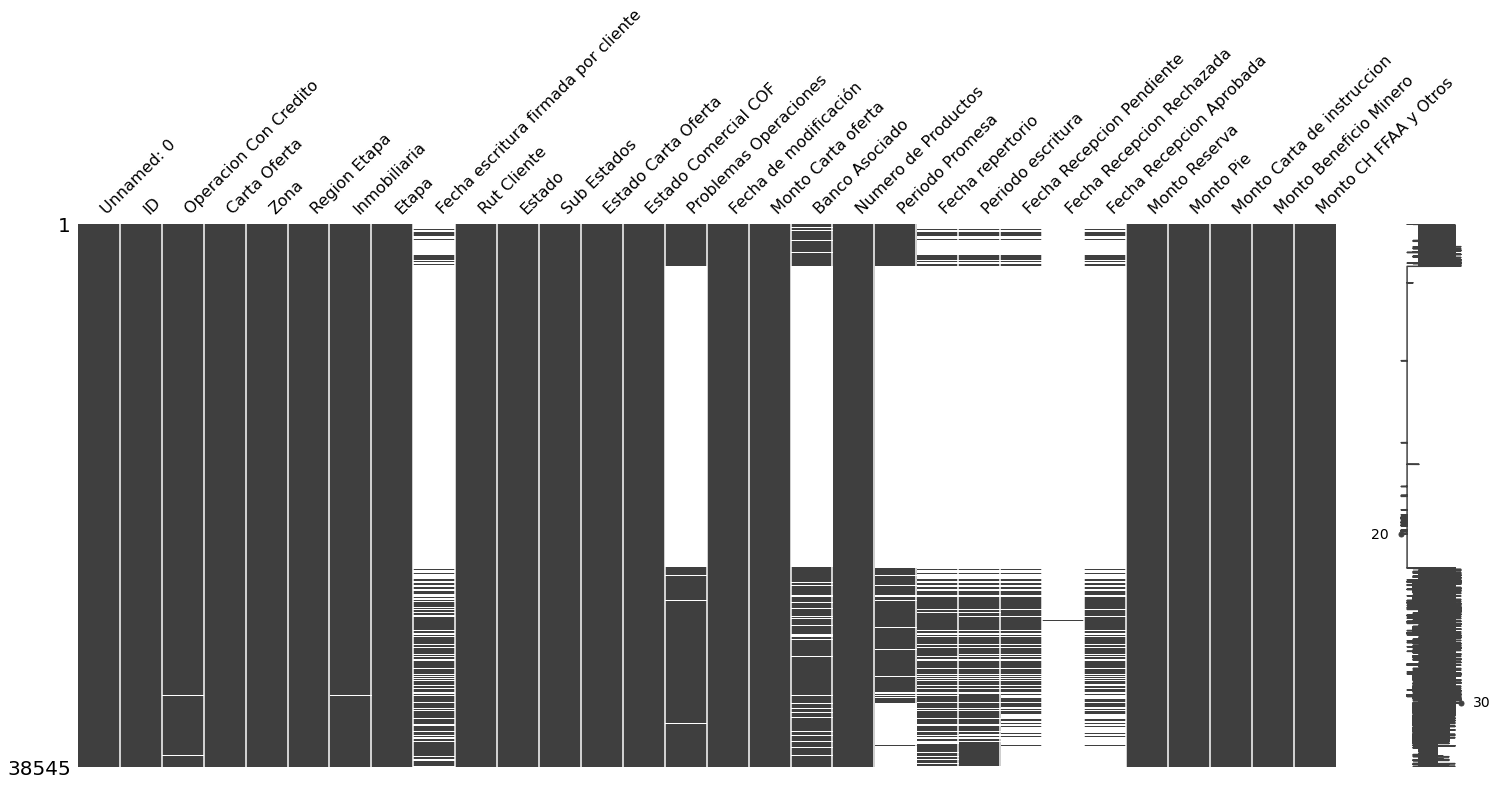

In [91]:
msno.matrix(por_limpiar[por_limpiar.columns[:30]])

<AxesSubplot:>

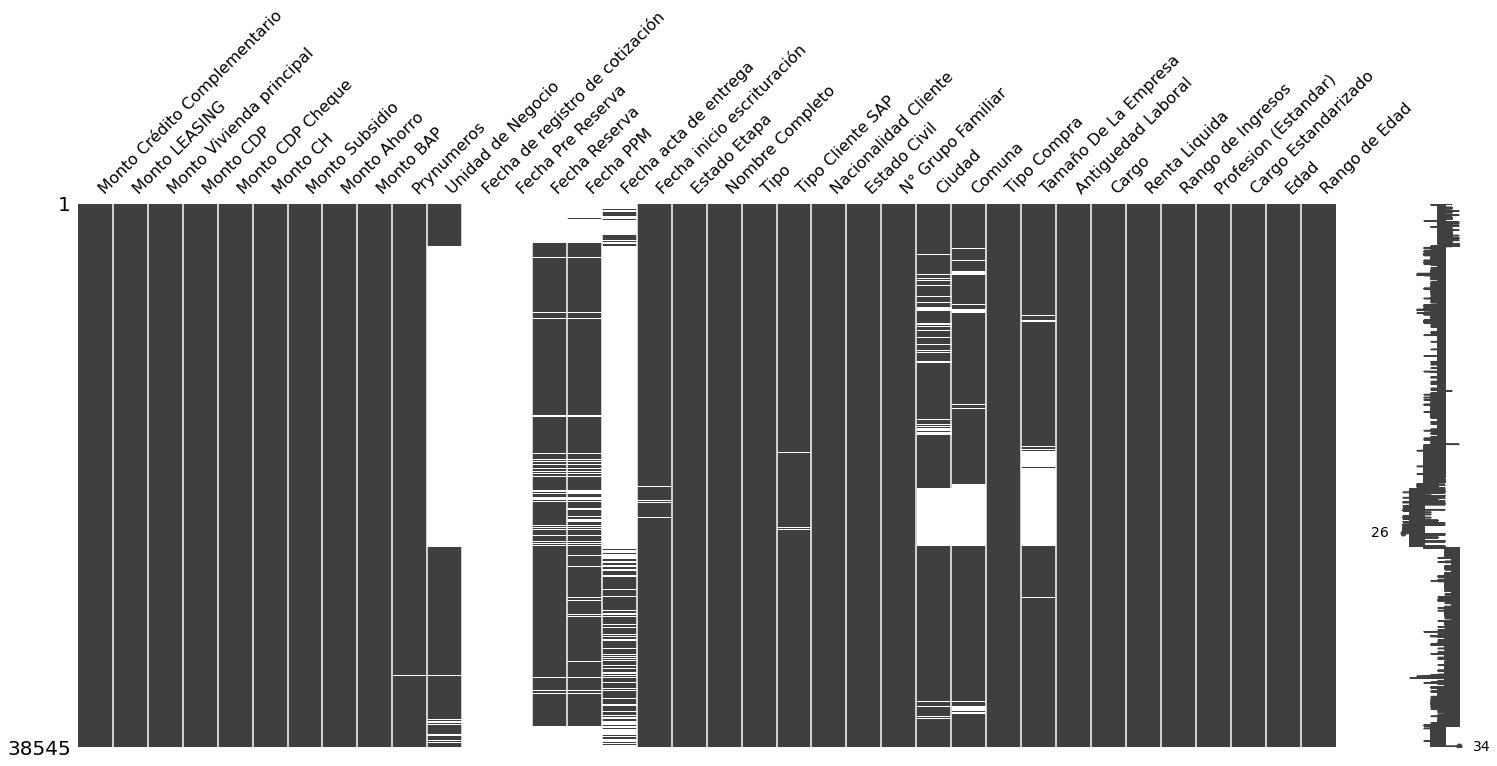

In [92]:
msno.matrix(por_limpiar[por_limpiar.columns[30:]])

In [93]:
eliminar_columnas = ['ID', 'Inmobiliaria', 'Etapa', 'Fecha escritura firmada por cliente', 'Estado', 'Sub Estados',
                    'Problemas Operaciones', 'Fecha de modificación', 'Banco Asociado', 'Numero de Productos',
                     'Periodo Promesa', 'Fecha repertorio','Periodo escritura', 'Fecha Recepcion Pendiente',
                     'Fecha Recepcion Rechazada', 'Fecha Recepcion Aprobada', 'Prynumeros', 'Unidad de Negocio',
                     'Fecha de registro de cotización','Fecha Pre Reserva', 'Fecha Reserva', 'Fecha PPM',
                     'Fecha acta de entrega', 'Fecha inicio escrituración', 'Estado Etapa', 'Tipo Cliente SAP', 
                     'Tamaño De La Empresa', 'Cargo', 'Edad']

In [94]:
data_limpia = por_limpiar.drop(eliminar_columnas, axis=1)

<AxesSubplot:>

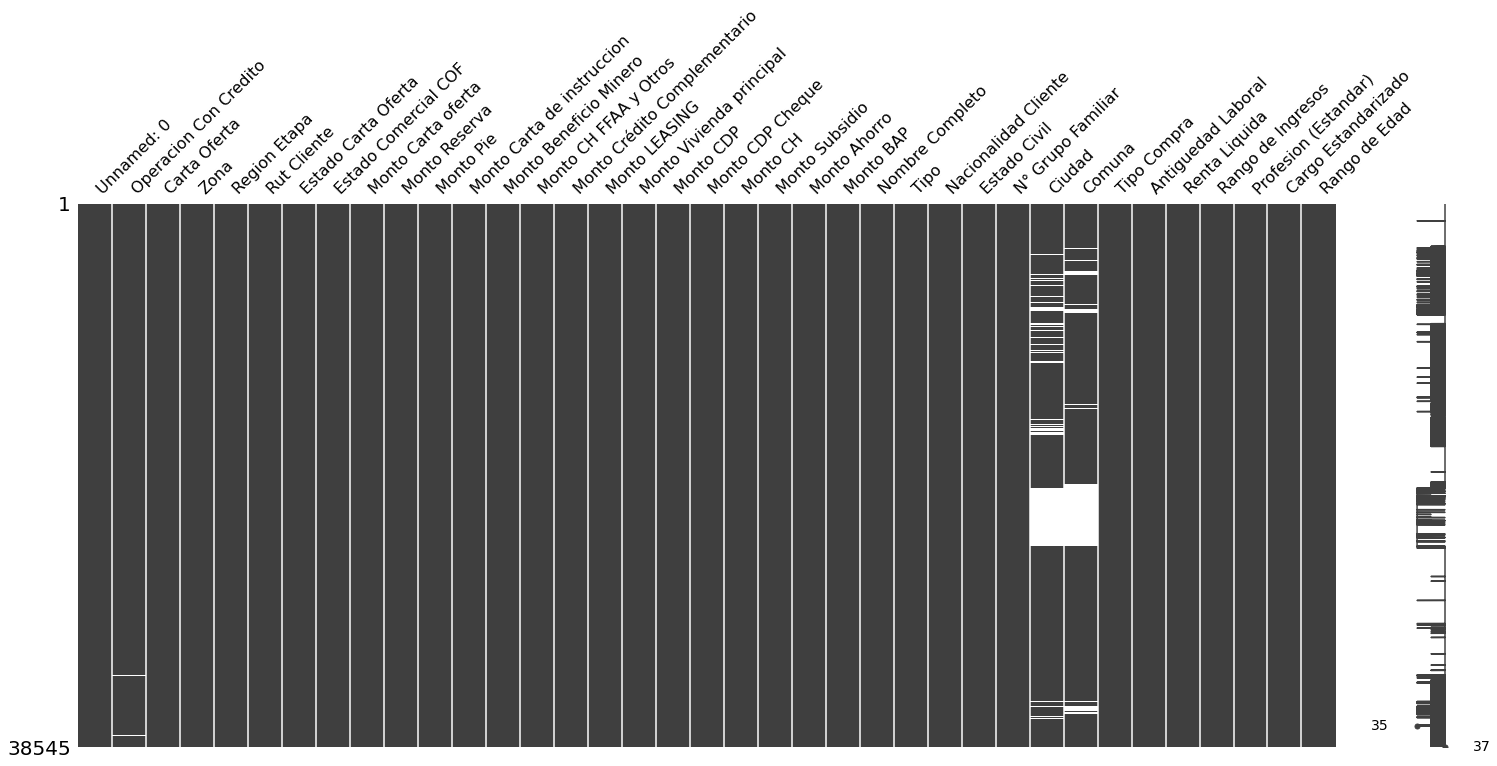

In [95]:
msno.matrix(data_limpia)

In [96]:
data_limpia.drop('Comuna', axis=1).dropna()

,Unnamed: 0,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Rut Cliente,Estado Carta Oferta,Estado Comercial COF,Monto Carta oferta,Monto Reserva,...,Estado Civil,N° Grupo Familiar,Ciudad,Tipo Compra,Antiguedad Laboral,Renta Liquida,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Rango de Edad
0,0,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,18010236-1,PPM,Normal,6400.0,7648.0,...,Soltero(a),5.0,Tocopilla,Primera Vivienda,1,3500000,3.000.001 y 4.000.000,Otros,Gerente,26-30
1,5,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,19104385-5,Con Promesa,Normal,5250.0,62.0,...,Soltero(a),2.0,Antofagasta,Primera Vivienda,2,2300000,2.000.001 y 2.500.000,Universitarios,Operario,19-25
2,6,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,78.0,0.0,...,Soltero(a),2.0,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30
3,7,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,2400.0,0.0,...,Soltero(a),2.0,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30
4,9,No,212516095,3-ZONA SUR,BIO-BIO,9213925-5,PPM,Normal,50.0,10.0,...,Casado(a),3.0,Concepción,Segunda Vivienda,9,3800000,3.000.001 y 4.000.000,Otros,Gerente,56-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38537,49549,Si,212436049,3-ZONA SUR,BIO-BIO,16598203-7,Liquidada,Normal,5155.0,10.0,...,Soltero(a),6.0,Concepción,Primera Vivienda,1,2100000,2.000.001 y 2.500.000,Universitarios,Jefe,31-35
38538,49550,Si,212431527,3-ZONA SUR,BIO-BIO,14374178-8,Liquidada,Normal,3274.0,10.0,...,Soltero(a),2.0,Concepción,Primera Vivienda,0,1090000,1.000.001 y 1.500.000,Otros,Supervisor,36-40
38539,49551,Si,212430055,3-ZONA SUR,BIO-BIO,10192637-0,Liquidada,Normal,5148.0,10.0,...,Casado(a),4.0,Concepción,Segunda Vivienda,1,3000000,2.500.001 y 3.000.000,Otros,Jefe,51-55
38542,49555,Si,212335257,3-ZONA SUR,BIO-BIO,12973677-1,Liquidada,Normal,950.0,0.0,...,Soltero(a),3.0,Concepción,Primera Vivienda,0,370000,Hasta 500.000,Otros,Administrativo,41-45


<AxesSubplot:>

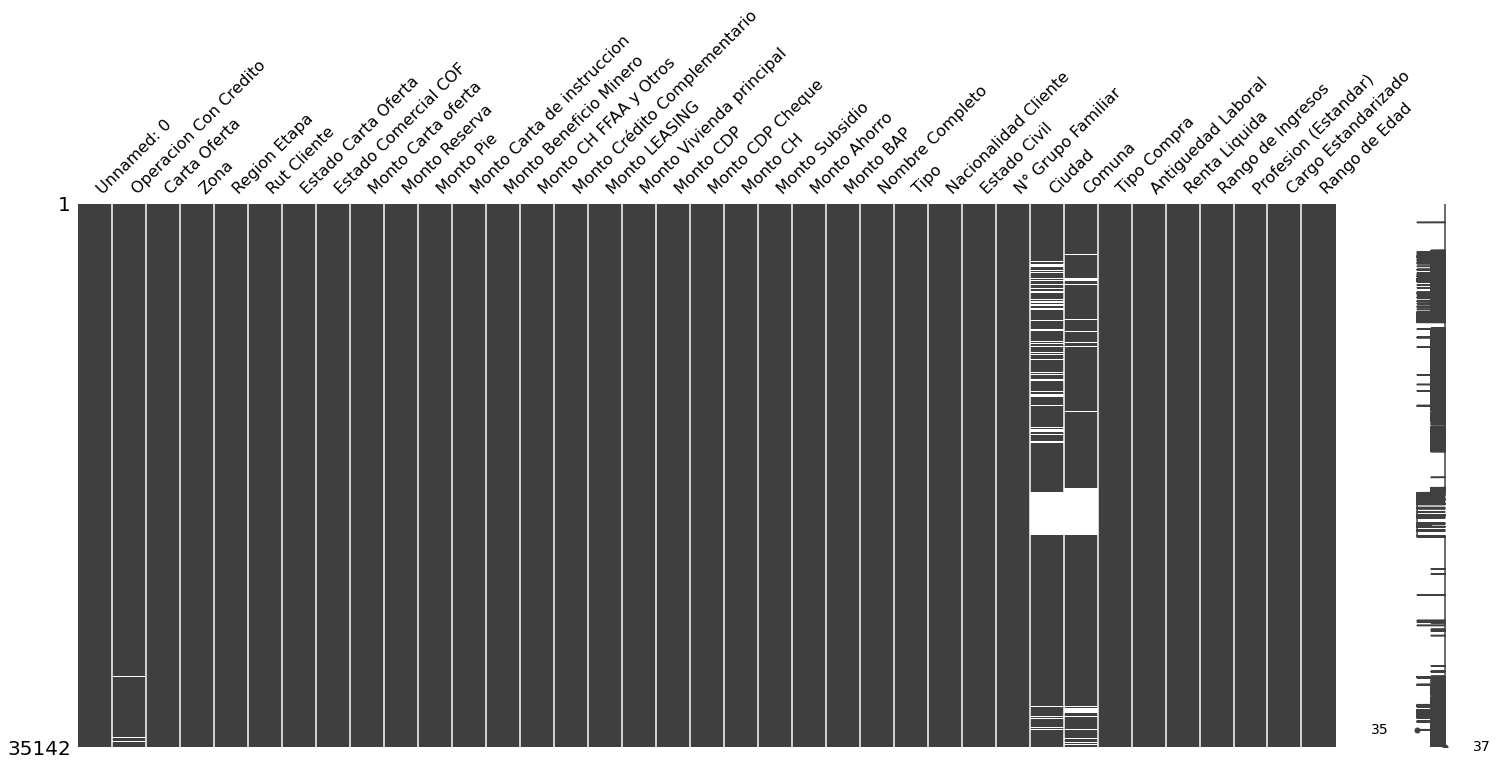

In [97]:
msno.matrix(data_limpia[(data_limpia['Antiguedad Laboral']<= 60) & (data_limpia['Antiguedad Laboral']> 0)])

In [98]:
data_limpia = data_limpia[(data_limpia['Antiguedad Laboral']<= 60) & (data_limpia['Antiguedad Laboral']> 0)]
data_limpia = data_limpia.reset_index(drop=True)

# Data de Ciudades

In [99]:
ciudades = pd.read_excel('Base comuna proyectos.xlsx')

In [100]:
ciudades

,Producto,Id Zona,Zona,Id Proyecto,Proyecto,Id Etapa,Etapa,Id Centro Responsabilidad,De Centro Responsabilidad,Comuna,Región,Fecha Inicio Escrituración
0,Casa,3,3-ZONA SUR,161,Torreones,1088,Torreones F2-A10 (Cipreses),4000248,Torreones F2-A10,Concepción,BIO-BIO,2013-11-29 00:00:00
1,Casa,3,3-ZONA SUR,161,Torreones,1088,Torreones F2-A10 (Cipreses),4000248,Torreones F2-A10,Concepción,BIO-BIO,2013-11-29 00:00:00
2,Casa,3,3-ZONA SUR,161,Torreones,1088,Torreones F2-A10 (Cipreses),4000248,Torreones F2-A10,Concepción,BIO-BIO,2013-11-29 00:00:00
3,Casa,3,3-ZONA SUR,161,Torreones,1088,Torreones F2-A10 (Cipreses),4000248,Torreones F2-A10,Concepción,BIO-BIO,2013-11-29 00:00:00
4,Casa,3,3-ZONA SUR,161,Torreones,1088,Torreones F2-A10 (Cipreses),4000248,Torreones F2-A10,Concepción,BIO-BIO,2013-11-29 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
53855,Casa,5,ZONA ANTOFAGASTA,944,San Pedro Casas Antofagasta,1560,San Pedro Lote F1 Etapa 1,400066301,San Pedro SM 15,Antofagasta,ANTOFAGASTA,2022-11-01 00:00:00
53856,Casa,5,ZONA ANTOFAGASTA,944,San Pedro Casas Antofagasta,1560,San Pedro Lote F1 Etapa 1,400066301,San Pedro SM 15,Antofagasta,ANTOFAGASTA,2022-11-01 00:00:00
53857,Casa,5,ZONA ANTOFAGASTA,944,San Pedro Casas Antofagasta,1560,San Pedro Lote F1 Etapa 1,400066301,San Pedro SM 15,Antofagasta,ANTOFAGASTA,2022-11-01 00:00:00
53858,Casa,5,ZONA ANTOFAGASTA,944,San Pedro Casas Antofagasta,1560,San Pedro Lote F1 Etapa 1,400066301,San Pedro SM 15,Antofagasta,ANTOFAGASTA,2022-11-01 00:00:00


In [101]:
ciudades.columns

Index(['Producto ', 'Id Zona ', 'Zona ', 'Id Proyecto ', 'Proyecto ',
       'Id Etapa ', 'Etapa ', 'Id Centro Responsabilidad ',
       'De Centro Responsabilidad ', 'Comuna ', 'Región ',
       'Fecha Inicio Escrituración '],
      dtype='object')

In [102]:
ciudades['Comuna '].unique()

array(['Concepción', 'Antofagasta', 'Lo Barnechea', 'Puente Alto',
       'Las Condes', 'Pudahuel', 'La Serena', 'Ñuñoa', 'Temuco',
       'Valparaiso', 'Puerto Montt', 'Lampa', 'Peñalolén', 'Maipu',
       'Colina', 'Vitacura', 'San Pedro de la Paz', 'Santiago',
       'Coquimbo', 'Osorno', 'Huechuraba', 'Quilicura', 'Providencia',
       'Concon', 'Padre Hurtado', 'Viña del Mar', 'Valdivia', 'Quilpue',
       'San Miguel', 'Cerrillos', 'Quinta Normal', 'La Cisterna',
       'Villa Alemana', 'San Joaquín', 'Curicó', 'Chiguayante',
       'La Florida'], dtype=object)

In [103]:
data_limpia['Zona'].unique()

array(['5-ZONA ANTOFAGASTA', '3-ZONA SUR', '2-ZONA CENTRO',
       '1-ZONA NORTE', '4-ZONA VERTICAL'], dtype=object)

# Clasificación

In [104]:
escritura = [('Cerrada/Escriturada', 'Normal'), ('Cerrada/Escriturada', 'Traspasada'), ('Cerrada/Escriturada', 'En Traspaso'), 
            ('Cerrada/Escriturada', 'Por Autorizar Cambio de Titular'), ('Cerrada/Escriturada', 'Por Autorizar Traspaso'), 
            ('Cerrada/Escriturada', 'Traspaso Entre Empresa'), ('Liquidada', 'Normal'), ('Liquidada', 'Por Autorizar Desistimiento'), 
            ('Liquidada', 'Traspasada'), ('Liquidada', 'Desistimiento'), ('Liquidada', 'En Traspaso'), 
            ('Liquidada', 'Por Autorizar Cambio de Titular'), ('Liquidada', 'Por Autorizar Traspaso'), 
            ('Liquidada', 'Traspaso Entre Empresa'), ('Cerrada/Cobrada', 'Normal'), ('Cerrada/Cobrada', 'Por Autorizar Desistimiento'),
            ('Cerrada/Cobrada', 'Traspasada'), ('Cerrada/Cobrada', 'Desistimiento'), ('Cerrada/Cobrada', 'En Traspaso'),
            ('Cerrada/Cobrada', 'Por Autorizar Cambio de Titular'), ('Cerrada/Cobrada', 'Por Autorizar Traspaso'),
            ('Cerrada/Cobrada', 'Traspaso Entre Empresa')]

desiste = [('PPM', 'Por Autorizar Desistimiento'), ('PPM', 'Desistimiento'), ('Con Promesa', 'Por Autorizar Desistimiento'),
          ('Con Promesa', 'Desistimiento'), ('Reserva', 'Por Autorizar Desistimiento'), ('Reserva', 'Desistimiento'),
          ('Cerrada/Escriturada', 'Por Autorizar Desistimiento'), ('Cerrada/Escriturada', 'Desistimiento'), 
          ('Anulada', 'Normal'), ('Anulada', 'Por Autorizar Desistimiento'), ('Anulada', 'Traspasada'), 
          ('Anulada', 'Desistimiento'), ('Anulada', 'En Traspaso'), ('Anulada', 'Por Autorizar Cambio de Titular'),
          ('Anulada', 'Por Autorizar Traspaso'), ('Anulada', 'Traspaso Entre Empresa'), ('Pre-reserva', 'Desistimiento'),
          ('Pre-reserva', 'Por Autorizar Desistimiento')]


por_definir = [('PPM', 'Normal'), ('PPM', 'Traspasada'), ('PPM', 'En Traspaso'), ('PPM', 'Por Autorizar Cambio de Titular'), 
               ('PPM', 'Por Autorizar Traspaso'), ('PPM', 'Traspaso Entre Empresa'), ('Con Promesa', 'Normal'),
               ('Con Promesa', 'Traspasada'), ('Con Promesa', 'En Traspaso'), ('Con Promesa', 'Por Autorizar Cambio de Titular'),
               ('Con Promesa', 'Por Autorizar Traspaso'), ('Con Promesa', 'Traspaso Entre Empresa'), ('Reserva', 'Normal'),
               ('Reserva', 'Traspasada'), ('Reserva', 'En Traspaso'), ('Reserva', 'Por Autorizar Cambio de Titular'),
               ('Reserva', 'Por Autorizar Traspaso'), ('Reserva', 'Traspaso Entre Empresa'), ('Pre-reserva', 'Normal'),
               ('Pre-reserva', 'Traspasada'), ('Pre-reserva', 'En Traspaso'), ('Pre-reserva', 'Por Autorizar Cambio de Titular')
,
               ('Pre-reserva', 'Por Autorizar Traspaso'), ('Pre-reserva', 'Traspaso Entre Empresa')]

In [105]:
for i in range(data_limpia.shape[0]):
    #print(i, ')', (data_limpia['Estado Carta Oferta'][i], data_limpia['Estado Comercial COF'][i]))
    if (data_limpia['Estado Carta Oferta'][i], data_limpia['Estado Comercial COF'][i]) in escritura:
        data_limpia.loc[i, ['Etiqueta']] = 'Escritura'
    
    if (data_limpia['Estado Carta Oferta'][i], data_limpia['Estado Comercial COF'][i]) in desiste:
        data_limpia.loc[i, ['Etiqueta']] = 'Desiste'
    
    if (data_limpia['Estado Carta Oferta'][i], data_limpia['Estado Comercial COF'][i]) in por_definir:
        data_limpia.loc[i, ['Etiqueta']] = 'Por Definir'

In [106]:
data_limpia

,Unnamed: 0,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Rut Cliente,Estado Carta Oferta,Estado Comercial COF,Monto Carta oferta,Monto Reserva,...,Ciudad,Comuna,Tipo Compra,Antiguedad Laboral,Renta Liquida,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Rango de Edad,Etiqueta
0,0,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,18010236-1,PPM,Normal,6400.0,7648.0,...,Tocopilla,María Elena,Primera Vivienda,1,3500000,3.000.001 y 4.000.000,Otros,Gerente,26-30,Por Definir
1,5,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,19104385-5,Con Promesa,Normal,5250.0,62.0,...,Antofagasta,Antofagasta,Primera Vivienda,2,2300000,2.000.001 y 2.500.000,Universitarios,Operario,19-25,Por Definir
2,6,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,78.0,0.0,...,Antofagasta,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir
3,7,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,2400.0,0.0,...,Antofagasta,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir
4,9,No,212516095,3-ZONA SUR,BIO-BIO,9213925-5,PPM,Normal,50.0,10.0,...,Concepción,Concepción,Segunda Vivienda,9,3800000,3.000.001 y 4.000.000,Otros,Gerente,56-60,Por Definir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35137,49547,Si,212447751,3-ZONA SUR,BIO-BIO,16765411-8,Liquidada,Normal,1749.0,10.0,...,Concepción,NaN,Primera Vivienda,3,1000000,Entre 500.001 y 1.000.000,Otros,Supervisor,31-35,Escritura
35138,49548,Si,212446696,3-ZONA SUR,BIO-BIO,13724179-k,Liquidada,Normal,3900.0,10.0,...,Concepción,NaN,Primera Vivienda,1,1000000,Entre 500.001 y 1.000.000,Otros,Jefe,41-45,Escritura
35139,49549,Si,212436049,3-ZONA SUR,BIO-BIO,16598203-7,Liquidada,Normal,5155.0,10.0,...,Concepción,Concepción,Primera Vivienda,1,2100000,2.000.001 y 2.500.000,Universitarios,Jefe,31-35,Escritura
35140,49551,Si,212430055,3-ZONA SUR,BIO-BIO,10192637-0,Liquidada,Normal,5148.0,10.0,...,Concepción,Chiguayante,Segunda Vivienda,1,3000000,2.500.001 y 3.000.000,Otros,Jefe,51-55,Escritura


# Distribución de Etiquetas

Text(0.5, 1.0, 'Distribucion de Etiquetas')

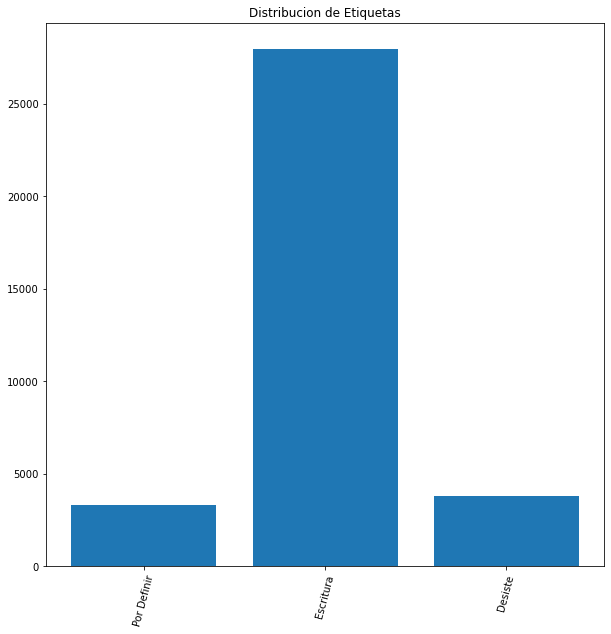

In [107]:
dic_etiq= dict()

for i in range(data_limpia.shape[0]):
    if str(data_limpia['Etiqueta'][i]) not in list(dic_etiq.keys()):
        dic_etiq[str(data_limpia['Etiqueta'][i])] =1
    else:
        dic_etiq[str(data_limpia['Etiqueta'][i])] += 1

        
df_etiqueta = pd.DataFrame(columns= ['Etiqueta', 'frecuencia'])

for i in range(len(dic_etiq)):
    df_etiqueta.loc[i] = [list(dic_etiq.keys())[i], list(dic_etiq.values())[i]]

plt.figure(figsize=(10,10))

plt.bar(df_etiqueta['Etiqueta'],df_etiqueta['frecuencia'])
plt.xticks(rotation=75)
plt.title('Distribucion de Etiquetas')

In [108]:
df_etiqueta

,Etiqueta,frecuencia
0,Por Definir,3337
1,Escritura,27991
2,Desiste,3814


# Estandarización de la columna Comuna 

La estrategia implementada será categorizar las comunas de Regiones en una única Región. Mientras que Región Metropolitana será separada en sus comunas.

In [109]:
com = [ ('Algarrobo (Provincia San Antonio, V Región de Valparaíso'),
 ('Alhué (Provincia Melipilla, Región Metropolitana de Santiago'),
 ('Alto Bío Bío (Provincia Bío Bío, VIII Región del Biobío'),
 ('Alto del Carmen (Provincia Huasco, III Región de Atacama'),
 ('Alto Hospicio (Provincia Iquique, I Región de Tarapacá'),
 ('Ancud (Provincia Chiloé, X Región de Los Lagos'),
 ('Andacollo (Provincia Elqui, IV Región de Coquimbo'),
 ('Angol (Provincia Malleco, IX Región de la Araucanía'),
 ('Antártica (Provincia Antártica Chilena, XII Región de Magallanes y de la Antártica Chilena'),
 ('Antofagasta (Provincia Antofagasta, II Región de Antofagasta'),
 ('Antuco (Provincia Bío Bío, VIII Región del Biobío'),
 ('Arauco (Provincia Arauco, VIII Región del Biobío'),
 ('Arica (Provincia Arica, XV Región de Arica y Parinacota'),
 ('Aysén (Provincia Aysén, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Buin (Provincia Maipo, Región Metropolitana de Santiago'),
 ('Bulnes (Provincia Diguillín, XVI Región de Ñuble'),
 ('Cabildo (Provincia Petorca, V Región de Valparaíso'),
 ('Cabo de Hornos (Provincia Antártica Chilena, XII Región de Magallanes y de la Antártica Chilena'),
 ('Cabrero (Provincia Bío Bío, VIII Región del Biobío'),
 ('Calama (Provincia El Loa, II Región de Antofagasta'),
 ('Calbuco (Provincia Llanquihue, X Región de Los Lagos'),
 ('Caldera (Provincia Copiapó, III Región de Atacama'),
 ('Calera de Tango (Provincia Maipo, Región Metropolitana de Santiago'),
 ('Calle Larga (Provincia Los Andes, V Región de Valparaíso'),
 ('Camarones (Provincia Arica, XV Región de Arica y Parinacota'),
 ('Camiña (Provincia Tamarugal, I Región de Tarapacá'),
 ('Canela (Provincia Choapa, IV Región de Coquimbo'),
 ('Cañete (Provincia Arauco, VIII Región del Biobío'),
 ('Carahue (Provincia Cautín, IX Región de la Araucanía'),
 ('Cartagena (Provincia San Antonio, V Región de Valparaíso'),
 ('Casablanca (Provincia Valparaíso, V Región de Valparaíso'),
 ('Castro (Provincia Chiloé, X Región de Los Lagos'),
 ('Catemu (Provincia San Felipe de Aconcagua, V Región de Valparaíso'),
 ('Cauquenes (Provincia Cauquenes, VII Región del Maule'),
 ('Cerrillos (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Cerro Navia (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Chaitén (Provincia Palena, X Región de Los Lagos'),
 ('Chanco (Provincia Cauquenes, VII Región del Maule'),
 ('Chañaral (Provincia Chañaral, III Región de Atacama'),
 ('Chépica (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Chiguayante (Provincia Concepción, VIII Región del Biobío'),
 ('Chile Chico (Provincia General Carrera, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Chillán (Provincia Diguillín, XVI Región de Ñuble'),
 ('Chillán Viejo (Provincia Diguillín, XVI Región de Ñuble'),
 ('Chimbarongo (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Chol Chol (Provincia Cautín, IX Región de la Araucanía'),
 ('Chonchi (Provincia Chiloé, X Región de Los Lagos'),
 ('Cisnes (Provincia Aysén, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Cobquecura (Provincia Itata, XVI Región de Ñuble'),
 ('Cochamó (Provincia Llanquihue, X Región de Los Lagos'),
 ('Cochrane (Provincia Capitán Prat, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Codegua (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Coelemu (Provincia Itata, XVI Región de Ñuble'),
 ('Coihueco (Provincia Punilla, XVI Región de Ñuble'),
 ('Coinco (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Colbún (Provincia Linares, VII Región del Maule'),
 ('Colchane (Provincia Tamarugal, I Región de Tarapacá'),
 ('Colina (Provincia Chacabuco, Región Metropolitana de Santiago'),
 ('Collipulli (Provincia Malleco, IX Región de la Araucanía'),
 ('Coltauco (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Combarbalá (Provincia Limarí, IV Región de Coquimbo'),
 ('Concepción (Provincia Concepción, VIII Región del Biobío'),
 ('Conchalí (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Concón (Provincia Valparaíso, V Región de Valparaíso'),
 ('Constitución (Provincia Talca, VII Región del Maule'),
 ('Contulmo (Provincia Arauco, VIII Región del Biobío'),
 ('Copiapó (Provincia Copiapó, III Región de Atacama'),
 ('Coquimbo (Provincia Elqui, IV Región de Coquimbo'),
 ('Coronel (Provincia Concepción, VIII Región del Biobío'),
 ('Corral (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Coyhaique (Provincia Coyhaique, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Cunco (Provincia Cautín, IX Región de la Araucanía'),
 ('Curacautín (Provincia Malleco, IX Región de la Araucanía'),
 ('Curacaví (Provincia Melipilla, Región Metropolitana de Santiago'),
 ('Curaco de Vélez (Provincia Chiloé, X Región de Los Lagos'),
 ('Curanilahue (Provincia Arauco, VIII Región del Biobío'),
 ('Curarrehue (Provincia Cautín, IX Región de la Araucanía'),
 ('Curepto (Provincia Talca, VII Región del Maule'),
 ('Curicó (Provincia Curicó, VII Región del Maule'),
 ('Dalcahue (Provincia Chiloé, X Región de Los Lagos'),
 ('Diego de Almagro (Provincia Chañaral, III Región de Atacama'),
 ('Doñihue (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('El Bosque (Provincia Santiago, Región Metropolitana de Santiago'),
 ('El Carmen (Provincia Diguillín, XVI Región de Ñuble'),
 ('El Monte (Provincia Talagante, Región Metropolitana de Santiago'),
 ('El Quisco (Provincia San Antonio, V Región de Valparaíso'),
 ('El Tabo (Provincia San Antonio, V Región de Valparaíso'),
 ('Empedrado (Provincia Talca, VII Región del Maule'),
 ('Ercilla (Provincia Malleco, IX Región de la Araucanía'),
 ('Estación Central (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Florida (Provincia Concepción, VIII Región del Biobío'),
 ('Freire (Provincia Cautín, IX Región de la Araucanía'),
 ('Freirina (Provincia Huasco, III Región de Atacama'),
 ('Fresia (Provincia Llanquihue, X Región de Los Lagos'),
 ('Frutillar (Provincia Llanquihue, X Región de Los Lagos'),
 ('Futaleufú (Provincia Palena, X Región de Los Lagos'),
 ('Futrono (Provincia Ranco, XIV Región de Los Ríos'),
 ('Galvarino (Provincia Cautín, IX Región de la Araucanía'),
 ('General Lagos (Provincia Parinacota, XV Región de Arica y Parinacota'),
 ('Gorbea (Provincia Cautín, IX Región de la Araucanía'),
 ('Graneros (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Guaitecas (Provincia Aysén, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Hijuelas (Provincia Quillota, V Región de Valparaíso'),
 ('Hualaihué (Provincia Palena, X Región de Los Lagos'),
 ('Hualañé (Provincia Curicó, VII Región del Maule'),
 ('Hualpén (Provincia Concepción, VIII Región del Biobío'),
 ('Hualqui (Provincia Concepción, VIII Región del Biobío'),
 ('Huara (Provincia Tamarugal, I Región de Tarapacá'),
 ('Huasco (Provincia Huasco, III Región de Atacama'),
 ('Huechuraba (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Illapel (Provincia Choapa, IV Región de Coquimbo'),
 ('Independencia (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Iquique (Provincia Iquique, I Región de Tarapacá'),
 ('Isla de Maipo (Provincia Talagante, Región Metropolitana de Santiago'),
 ('Isla de Pascua (Provincia Isla de Pascua, V Región de Valparaíso'),
 ('Juan Fernández (Provincia Valparaíso, V Región de Valparaíso'),
 ('La Calera (Provincia Quillota, V Región de Valparaíso'),
 ('La Cisterna (Provincia Santiago, Región Metropolitana de Santiago'),
 ('La Cruz (Provincia Quillota, V Región de Valparaíso'),
 ('La Estrella (Provincia Cardenal Caro, VI Región del Libertador General Bernardo O’Higgins'),
 ('La Florida (Provincia Santiago, Región Metropolitana de Santiago'),
 ('La Granja (Provincia Santiago, Región Metropolitana de Santiago'),
 ('La Higuera (Provincia Elqui, IV Región de Coquimbo'),
 ('La Ligua (Provincia Petorca, V Región de Valparaíso'),
 ('La Pintana (Provincia Santiago, Región Metropolitana de Santiago'),
 ('La Reina (Provincia Santiago, Región Metropolitana de Santiago'),
 ('La Serena (Provincia Elqui, IV Región de Coquimbo'),
 ('La Unión (Provincia Ranco, XIV Región de Los Ríos'),
 ('Lago Ranco (Provincia Ranco, XIV Región de Los Ríos'),
 ('Lago Verde (Provincia Coyhaique, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Laguna Blanca (Provincia Magallanes, XII Región de Magallanes y de la Antártica Chilena'),
 ('Laja (Provincia Bío Bío, VIII Región del Biobío'),
 ('Lampa (Provincia Chacabuco, Región Metropolitana de Santiago'),
 ('Lanco (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Las Cabras (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Las Condes (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Lautaro (Provincia Cautín, IX Región de la Araucanía'),
 ('Lebu (Provincia Arauco, VIII Región del Biobío'),
 ('Licantén (Provincia Curicó, VII Región del Maule'),
 ('Limache (Provincia Marga Marga, V Región de Valparaíso'),
 ('Linares (Provincia Linares, VII Región del Maule'),
 ('Litueche (Provincia Cardenal Caro, VI Región del Libertador General Bernardo O’Higgins'),
 ('Llanquihue (Provincia Llanquihue, X Región de Los Lagos'),
 ('Llay Llay (Provincia San Felipe de Aconcagua, V Región de Valparaíso'),
 ('Lo Barnechea (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Lo Espejo (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Lo Prado (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Lolol (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Loncoche (Provincia Cautín, IX Región de la Araucanía'),
 ('Longaví (Provincia Linares, VII Región del Maule'),
 ('Lonquimay (Provincia Malleco, IX Región de la Araucanía'),
 ('Los Álamos (Provincia Arauco, VIII Región del Biobío'),
 ('Los Andes (Provincia Los Andes, V Región de Valparaíso'),
 ('Los Ángeles (Provincia Bío Bío, VIII Región del Biobío'),
 ('Los Lagos (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Los Muermos (Provincia Llanquihue, X Región de Los Lagos'),
 ('Los Sauces (Provincia Malleco, IX Región de la Araucanía'),
 ('Los Vilos (Provincia Choapa, IV Región de Coquimbo'),
 ('Lota (Provincia Concepción, VIII Región del Biobío'),
 ('Lumaco (Provincia Malleco, IX Región de la Araucanía'),
 ('Machalí (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Macul (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Máfil (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Maipú (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Malloa (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Marchigüe (Provincia Cardenal Caro, VI Región del Libertador General Bernardo O’Higgins'),
 ('María Elena (Provincia Tocopilla, II Región de Antofagasta'),
 ('María Pinto (Provincia Melipilla, Región Metropolitana de Santiago'),
 ('Mariquina (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Maule (Provincia Talca, VII Región del Maule'),
 ('Maullín (Provincia Llanquihue, X Región de Los Lagos'),
 ('Mejillones (Provincia Antofagasta, II Región de Antofagasta'),
 ('Melipeuco (Provincia Cautín, IX Región de la Araucanía'),
 ('Melipilla (Provincia Melipilla, Región Metropolitana de Santiago'),
 ('Molina (Provincia Curicó, VII Región del Maule'),
 ('Monte Patria (Provincia Limarí, IV Región de Coquimbo'),
 ('Mostazal (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Mulchén (Provincia Bío Bío, VIII Región del Biobío'),
 ('Nacimiento (Provincia Bío Bío, VIII Región del Biobío'),
 ('Nancagua (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Navidad (Provincia Cardenal Caro, VI Región del Libertador General Bernardo O’Higgins'),
 ('Negrete (Provincia Bío Bío, VIII Región del Biobío'),
 ('Ninhue (Provincia Itata, XVI Región de Ñuble'),
 ('Nogales (Provincia Quillota, V Región de Valparaíso'),
 ('Nueva Imperial (Provincia Cautín, IX Región de la Araucanía'),
 ('Ñiquén (Provincia Punilla, XVI Región de Ñuble'),
 ('Ñuñoa (Provincia Santiago, Región Metropolitana de Santiago'),
 ('O’Higgins (Provincia Capitán Prat, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Olivar (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Ollagüe (Provincia El Loa, II Región de Antofagasta'),
 ('Olmué (Provincia Marga Marga, V Región de Valparaíso'),
 ('Osorno (Provincia Osorno, X Región de Los Lagos'),
 ('Ovalle (Provincia Limarí, IV Región de Coquimbo'),
 ('Padre Hurtado (Provincia Talagante, Región Metropolitana de Santiago'),
 ('Padre Las Casas (Provincia Cautín, IX Región de la Araucanía'),
 ('Paihuano (Provincia Elqui, IV Región de Coquimbo'),
 ('Paillaco (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Paine (Provincia Maipo, Región Metropolitana de Santiago'),
 ('Palena (Provincia Palena, X Región de Los Lagos'),
 ('Palmilla (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Panguipulli (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Panquehue (Provincia San Felipe de Aconcagua, V Región de Valparaíso'),
 ('Papudo (Provincia Petorca, V Región de Valparaíso'),
 ('Paredones (Provincia Cardenal Caro, VI Región del Libertador General Bernardo O’Higgins'),
 ('Parral (Provincia Linares, VII Región del Maule'),
 ('Pedro Aguirre Cerda (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Pelarco (Provincia Talca, VII Región del Maule'),
 ('Pelluhue (Provincia Cauquenes, VII Región del Maule'),
 ('Pemuco (Provincia Diguillín, XVI Región de Ñuble'),
 ('Pencahue (Provincia Talca, VII Región del Maule'),
 ('Penco (Provincia Concepción, VIII Región del Biobío'),
 ('Peñaflor (Provincia Talagante, Región Metropolitana de Santiago'),
 ('Peñalolén (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Peralillo (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Perquenco (Provincia Cautín, IX Región de la Araucanía'),
 ('Petorca (Provincia Petorca, V Región de Valparaíso'),
 ('Peumo (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Pica (Provincia Tamarugal, I Región de Tarapacá'),
 ('Pichidegua (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Pichilemu (Provincia Cardenal Caro, VI Región del Libertador General Bernardo O’Higgins'),
 ('Pinto (Provincia Diguillín, XVI Región de Ñuble'),
 ('Pirque (Provincia Cordillera, Región Metropolitana de Santiago'),
 ('Pitrufquén (Provincia Cautín, IX Región de la Araucanía'),
 ('Placilla (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Portezuelo (Provincia Itata, XVI Región de Ñuble'),
 ('Porvenir (Provincia Tierra del Fuego, XII Región de Magallanes y de la Antártica Chilena'),
 ('Pozo Almonte (Provincia Tamarugal, I Región de Tarapacá'),
 ('Primavera (Provincia Tierra del Fuego, XII Región de Magallanes y de la Antártica Chilena'),
 ('Providencia (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Puchuncaví (Provincia Valparaíso, V Región de Valparaíso'),
 ('Pucón (Provincia Cautín, IX Región de la Araucanía'),
 ('Pudahuel (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Puente Alto (Provincia Cordillera, Región Metropolitana de Santiago'),
 ('Puerto Montt (Provincia Llanquihue, X Región de Los Lagos'),
 ('Puerto Natales (Provincia Última Esperanza, XII Región de Magallanes y de la Antártica Chilena'),
 ('Puerto Octay (Provincia Osorno, X Región de Los Lagos'),
 ('Puerto Varas (Provincia Llanquihue, X Región de Los Lagos'),
 ('Pumanque (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Punitaqui (Provincia Limarí, IV Región de Coquimbo'),
 ('Punta Arenas (Provincia Magallanes, XII Región de Magallanes y de la Antártica Chilena'),
 ('Puqueldón (Provincia Chiloé, X Región de Los Lagos'),
 ('Purén (Provincia Malleco, IX Región de la Araucanía'),
 ('Purranque (Provincia Osorno, X Región de Los Lagos'),
 ('Putaendo (Provincia San Felipe de Aconcagua, V Región de Valparaíso'),
 ('Putre (Provincia Parinacota, XV Región de Arica y Parinacota'),
 ('Puyehue (Provincia Osorno, X Región de Los Lagos'),
 ('Queilén (Provincia Chiloé, X Región de Los Lagos'),
 ('Quellón (Provincia Chiloé, X Región de Los Lagos'),
 ('Quemchi (Provincia Chiloé, X Región de Los Lagos'),
 ('Quilaco (Provincia Bío Bío, VIII Región del Biobío'),
 ('Quilicura (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Quilleco (Provincia Bío Bío, VIII Región del Biobío'),
 ('Quillón (Provincia Diguillín, XVI Región de Ñuble'),
 ('Quillota (Provincia Quillota, V Región de Valparaíso'),
 ('Quilpué (Provincia Marga Marga, V Región de Valparaíso'),
 ('Quinchao (Provincia Chiloé, X Región de Los Lagos'),
 ('Quinta de Tilcoco (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Quinta Normal (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Quintero (Provincia Valparaíso, V Región de Valparaíso'),
 ('Quirihue (Provincia Itata, XVI Región de Ñuble'),
 ('Rancagua (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Ránquil (Provincia Itata, XVI Región de Ñuble'),
 ('Rauco (Provincia Curicó, VII Región del Maule'),
 ('Recoleta (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Renaico (Provincia Malleco, IX Región de la Araucanía'),
 ('Renca (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Rengo (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Requínoa (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Retiro (Provincia Linares, VII Región del Maule'),
 ('Rinconada (Provincia Los Andes, V Región de Valparaíso'),
 ('Río Bueno (Provincia Ranco, XIV Región de Los Ríos'),
 ('Río Claro (Provincia Talca, VII Región del Maule'),
 ('Río Hurtado (Provincia Limarí, IV Región de Coquimbo'),
 ('Río Ibáñez (Provincia General Carrera, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Río Negro (Provincia Osorno, X Región de Los Lagos'),
 ('Río Verde (Provincia Magallanes, XII Región de Magallanes y de la Antártica Chilena'),
 ('Romeral (Provincia Curicó, VII Región del Maule'),
 ('Saavedra (Provincia Cautín, IX Región de la Araucanía'),
 ('Sagrada Familia (Provincia Curicó, VII Región del Maule'),
 ('Salamanca (Provincia Choapa, IV Región de Coquimbo'),
 ('San Antonio (Provincia San Antonio, V Región de Valparaíso'),
 ('San Bernardo (Provincia Maipo, Región Metropolitana de Santiago'),
 ('San Carlos (Provincia Punilla, XVI Región de Ñuble'),
 ('San Clemente (Provincia Talca, VII Región del Maule'),
 ('San Esteban (Provincia Los Andes, V Región de Valparaíso'),
 ('San Fabián (Provincia Punilla, XVI Región de Ñuble'),
 ('San Felipe (Provincia San Felipe de Aconcagua, V Región de Valparaíso'),
 ('San Fernando (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('San Gregorio (Provincia Magallanes, XII Región de Magallanes y de la Antártica Chilena'),
 ('San Ignacio (Provincia Diguillín, XVI Región de Ñuble'),
 ('San Javier (Provincia Linares, VII Región del Maule'),
 ('San Joaquín (Provincia Santiago, Región Metropolitana de Santiago'),
 ('San José de Maipo (Provincia Cordillera, Región Metropolitana de Santiago'),
 ('San Juan de la Costa (Provincia Osorno, X Región de Los Lagos'),
 ('San Miguel (Provincia Santiago, Región Metropolitana de Santiago'),
 ('San Nicolás (Provincia Punilla, XVI Región de Ñuble'),
 ('San Pablo (Provincia Osorno, X Región de Los Lagos'),
 ('San Pedro (Provincia Melipilla, Región Metropolitana de Santiago'),
 ('San Pedro de Atacama (Provincia El Loa, II Región de Antofagasta'),
 ('San Pedro de la Paz (Provincia Concepción, VIII Región del Biobío'),
 ('San Rafael (Provincia Talca, VII Región del Maule'),
 ('San Ramón (Provincia Santiago, Región Metropolitana de Santiago'),
 ('San Rosendo (Provincia Bío Bío, VIII Región del Biobío'),
 ('San Vicente de Tagua Tagua (Provincia Cachapoal, VI Región del Libertador General Bernardo O’Higgins'),
 ('Santa Bárbara (Provincia Bío Bío, VIII Región del Biobío'),
 ('Santa Cruz (Provincia Colchagua, VI Región del Libertador General Bernardo O’Higgins'),
 ('Santa Juana (Provincia Concepción, VIII Región del Biobío'),
 ('Santa María (Provincia San Felipe de Aconcagua, V Región de Valparaíso'),
 ('Santiago (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Santo Domingo (Provincia San Antonio, V Región de Valparaíso'),
 ('Sierra Gorda (Provincia Antofagasta, II Región de Antofagasta'),
 ('Talagante (Provincia Talagante, Región Metropolitana de Santiago'),
 ('Talca (Provincia Talca, VII Región del Maule'),
 ('Talcahuano (Provincia Concepción, VIII Región del Biobío'),
 ('Taltal (Provincia Antofagasta, II Región de Antofagasta'),
 ('Temuco (Provincia Cautín, IX Región de la Araucanía'),
 ('Teno (Provincia Curicó, VII Región del Maule'),
 ('Teodoro Schmidt (Provincia Cautín, IX Región de la Araucanía'),
 ('Tierra Amarilla (Provincia Copiapó, III Región de Atacama'),
 ('Til Til (Provincia Chacabuco, Región Metropolitana de Santiago'),
 ('Timaukel (Provincia Tierra del Fuego, XII Región de Magallanes y de la Antártica Chilena'),
 ('Tirúa (Provincia Arauco, VIII Región del Biobío'),
 ('Tocopilla (Provincia Tocopilla, II Región de Antofagasta'),
 ('Toltén (Provincia Cautín, IX Región de la Araucanía'),
 ('Tomé (Provincia Concepción, VIII Región del Biobío'),
 ('Torres del Paine (Provincia Última Esperanza, XII Región de Magallanes y de la Antártica Chilena'),
 ('Tortel (Provincia Capitán Prat, XI Región Aysén del General Carlos Ibáñez del Campo'),
 ('Traiguén (Provincia Malleco, IX Región de la Araucanía'),
 ('Trehuaco (Provincia Itata, XVI Región de Ñuble'),
 ('Tucapel (Provincia Bío Bío, VIII Región del Biobío'),
 ('Valdivia (Provincia Valdivia, XIV Región de Los Ríos'),
 ('Vallenar (Provincia Huasco, III Región de Atacama'),
 ('Valparaíso (Provincia Valparaíso, V Región de Valparaíso'),
 ('Vichuquén (Provincia Curicó, VII Región del Maule'),
 ('Victoria (Provincia Malleco, IX Región de la Araucanía'),
 ('Vicuña (Provincia Elqui, IV Región de Coquimbo'),
 ('Vilcún (Provincia Cautín, IX Región de la Araucanía'),
 ('Villa Alegre (Provincia Linares, VII Región del Maule'),
 ('Villa Alemana (Provincia Marga Marga, V Región de Valparaíso'),
 ('Villarrica (Provincia Cautín, IX Región de la Araucanía'),
 ('Viña del Mar (Provincia Valparaíso, V Región de Valparaíso'),
 ('Vitacura (Provincia Santiago, Región Metropolitana de Santiago'),
 ('Yerbas Buenas (Provincia Linares, VII Región del Maule'),
 ('Yumbel (Provincia Bío Bío, VIII Región del Biobío'),
 ('Yungay (Provincia Diguillín, XVI Región de Ñuble'),
 ('Zapallar (Provincia Petorca, V Región de Valparaíso')]

In [110]:
com

['Algarrobo (Provincia San Antonio, V Región de Valparaíso',
 'Alhué (Provincia Melipilla, Región Metropolitana de Santiago',
 'Alto Bío Bío (Provincia Bío Bío, VIII Región del Biobío',
 'Alto del Carmen (Provincia Huasco, III Región de Atacama',
 'Alto Hospicio (Provincia Iquique, I Región de Tarapacá',
 'Ancud (Provincia Chiloé, X Región de Los Lagos',
 'Andacollo (Provincia Elqui, IV Región de Coquimbo',
 'Angol (Provincia Malleco, IX Región de la Araucanía',
 'Antártica (Provincia Antártica Chilena, XII Región de Magallanes y de la Antártica Chilena',
 'Antofagasta (Provincia Antofagasta, II Región de Antofagasta',
 'Antuco (Provincia Bío Bío, VIII Región del Biobío',
 'Arauco (Provincia Arauco, VIII Región del Biobío',
 'Arica (Provincia Arica, XV Región de Arica y Parinacota',
 'Aysén (Provincia Aysén, XI Región Aysén del General Carlos Ibáñez del Campo',
 'Buin (Provincia Maipo, Región Metropolitana de Santiago',
 'Bulnes (Provincia Diguillín, XVI Región de Ñuble',
 'Cabildo (Pr

In [111]:
comunas =[]

for i in com:
    text= i.replace('(', ',')
    comunas.append(text.split(','))
    #print(text.split(','))

In [112]:
comunas_chile = pd.DataFrame(columns = ['Comuna', 'Provincia', 'Región'])

In [113]:
comunas_chile.loc[0] = comunas[0]

In [114]:
for i in range(len(comunas)):
    comunas_chile.loc[i] = comunas[i]

In [115]:
comunas_chile

,Comuna,Provincia,Región
0,Algarrobo,Provincia San Antonio,V Región de Valparaíso
1,Alhué,Provincia Melipilla,Región Metropolitana de Santiago
2,Alto Bío Bío,Provincia Bío Bío,VIII Región del Biobío
3,Alto del Carmen,Provincia Huasco,III Región de Atacama
4,Alto Hospicio,Provincia Iquique,I Región de Tarapacá
...,...,...,...
341,Vitacura,Provincia Santiago,Región Metropolitana de Santiago
342,Yerbas Buenas,Provincia Linares,VII Región del Maule
343,Yumbel,Provincia Bío Bío,VIII Región del Biobío
344,Yungay,Provincia Diguillín,XVI Región de Ñuble


In [116]:
for i in range(comunas_chile.shape[0]):
    comunas_chile['Comuna'][i] = comunas_chile['Comuna'][i].strip()
    comunas_chile['Provincia'][i] = comunas_chile['Provincia'][i].strip()
    comunas_chile['Región'][i] = comunas_chile['Región'][i].strip()

In [117]:
comunas_chile

,Comuna,Provincia,Región
0,Algarrobo,Provincia San Antonio,V Región de Valparaíso
1,Alhué,Provincia Melipilla,Región Metropolitana de Santiago
2,Alto Bío Bío,Provincia Bío Bío,VIII Región del Biobío
3,Alto del Carmen,Provincia Huasco,III Región de Atacama
4,Alto Hospicio,Provincia Iquique,I Región de Tarapacá
...,...,...,...
341,Vitacura,Provincia Santiago,Región Metropolitana de Santiago
342,Yerbas Buenas,Provincia Linares,VII Región del Maule
343,Yumbel,Provincia Bío Bío,VIII Región del Biobío
344,Yungay,Provincia Diguillín,XVI Región de Ñuble


In [118]:
comunas_chile.to_excel('comunas_chile.xlsx')

In [119]:
data_limpia.to_excel('data_limpia.xlsx')

In [120]:
I_reg_tarap = []
II_reg_antof = []
III_reg_atac = []
IV_reg_coq = []
V_reg_valp = []
VI_reg_oh = []
VII_reg_maule = []
VIII_reg_biobio = []
IX_reg_arauc = []
X_reg_lag = []
XI_reg_aysen = []
XII_reg_mag = []
reg_met = []
XIV_reg_rios = []
XV_reg_arica = []
XVI_reg_nuble = []

In [121]:
for i in range(comunas_chile.shape[0]):
    if comunas_chile['Región'][i] == 'I Región de Tarapacá':
        I_reg_tarap.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'II Región de Antofagasta':
        II_reg_antof.append(comunas_chile['Comuna'][i])
    
    elif comunas_chile['Región'][i] == 'III Región de Atacama':
        III_reg_atac.append(comunas_chile['Comuna'][i])
    
    elif comunas_chile['Región'][i] == 'IV Región de Coquimbo':
        IV_reg_coq.append(comunas_chile['Comuna'][i])
    
    elif comunas_chile['Región'][i] == 'V Región de Valparaíso':
        V_reg_valp.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'VI Región del Libertador General Bernardo O’Higgins':
        VI_reg_oh.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'VII Región del Maule':
        VII_reg_maule.append(comunas_chile['Comuna'][i])
    
    elif comunas_chile['Región'][i] == 'VIII Región del Biobío':
        VIII_reg_biobio.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'IX Región de la Araucanía':
        IX_reg_arauc.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'X Región de Los Lagos':
        X_reg_lag.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'XI Región Aysén del General Carlos Ibáñez del Campo':
        XI_reg_aysen.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'XII Región de Magallanes y de la Antártica Chilena':
        XII_reg_mag.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'Región Metropolitana de Santiago':
        reg_met.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'XIV Región de Los Ríos':
        XIV_reg_rios.append(comunas_chile['Comuna'][i])
        
    elif comunas_chile['Región'][i] == 'XV Región de Arica y Parinacota':
        XV_reg_arica.append(comunas_chile['Comuna'][i])
        
    else:
        XVI_reg_nuble.append(comunas_chile['Comuna'][i])

In [122]:
comunas_chile['Región'].unique()

array(['V Región de Valparaíso', 'Región Metropolitana de Santiago',
       'VIII Región del Biobío', 'III Región de Atacama',
       'I Región de Tarapacá', 'X Región de Los Lagos',
       'IV Región de Coquimbo', 'IX Región de la Araucanía',
       'XII Región de Magallanes y de la Antártica Chilena',
       'II Región de Antofagasta', 'XV Región de Arica y Parinacota',
       'XI Región Aysén del General Carlos Ibáñez del Campo',
       'XVI Región de Ñuble', 'VII Región del Maule',
       'VI Región del Libertador General Bernardo O’Higgins',
       'XIV Región de Los Ríos'], dtype=object)

In [123]:
data_limpia = data_limpia.reset_index(drop=True)

In [125]:
for i in range(data_limpia.shape[0]):
    
    if pd.isna(data_limpia['Comuna'][i]):
        continue
    
    if data_limpia['Comuna'][i] in I_reg_tarap or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in I_reg_tarap ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'I Región de Tarapacá'
        
    elif data_limpia['Comuna'][i] in II_reg_antof or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in II_reg_antof ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'II Región de Antofagasta'
    
    elif data_limpia['Comuna'][i] in III_reg_atac or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in III_reg_atac ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'III Región de Atacama'
    
    elif data_limpia['Comuna'][i] in IV_reg_coq or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in IV_reg_coq ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'IV Región de Coquimbo'
    
    elif data_limpia['Comuna'][i] in V_reg_valp or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in V_reg_valp ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'V Región de Valparaíso'
        
    elif data_limpia['Comuna'][i] in VI_reg_oh or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in VI_reg_oh ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'VI Región del Libertador General Bernardo O’Higgins'
        
    elif data_limpia['Comuna'][i] in VII_reg_maule or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in VII_reg_maule ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'VII Región del Maule'
    
    elif data_limpia['Comuna'][i] in VIII_reg_biobio or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in VIII_reg_biobio ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'VIII Región del Biobío'
        
    elif data_limpia['Comuna'][i] in IX_reg_arauc or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in IX_reg_arauc ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'IX Región de la Araucanía'
        
    elif data_limpia['Comuna'][i] in X_reg_lag or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in X_reg_lag ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'X Región de Los Lagos'
        
    elif data_limpia['Comuna'][i] in XI_reg_aysen or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in XI_reg_aysen ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'XI Región Aysén del General Carlos Ibáñez del Campo'
        
    elif data_limpia['Comuna'][i] in XII_reg_mag or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in XII_reg_mag ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'XII Región de Magallanes y de la Antártica Chilena'
        
    elif data_limpia['Comuna'][i] in reg_met or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in reg_met ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = data_limpia['Comuna'][i]
        
    elif data_limpia['Comuna'][i] in XIV_reg_rios or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in XIV_reg_rios ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'XIV Región de Los Ríos'
        
    elif data_limpia['Comuna'][i] in XV_reg_arica or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in XV_reg_arica ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'XV Región de Arica y Parinacota'
        
    elif data_limpia['Comuna'][i] in XVI_reg_nuble or data_limpia['Comuna'][i] in [unicodedata.normalize('NFD', str(i))\
 .encode('ascii', 'ignore')\
 .decode("utf-8").strip() for i in XVI_reg_nuble ]:
        data_limpia.loc[i, ['Comuna Estandarizada']] = 'XVI Región de Ñuble'
        
    else:
        continue

In [126]:
data_limpia

,Unnamed: 0,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Rut Cliente,Estado Carta Oferta,Estado Comercial COF,Monto Carta oferta,Monto Reserva,...,Comuna,Tipo Compra,Antiguedad Laboral,Renta Liquida,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Rango de Edad,Etiqueta,Comuna Estandarizada
0,0,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,18010236-1,PPM,Normal,6400.0,7648.0,...,María Elena,Primera Vivienda,1,3500000,3.000.001 y 4.000.000,Otros,Gerente,26-30,Por Definir,II Región de Antofagasta
1,5,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,19104385-5,Con Promesa,Normal,5250.0,62.0,...,Antofagasta,Primera Vivienda,2,2300000,2.000.001 y 2.500.000,Universitarios,Operario,19-25,Por Definir,II Región de Antofagasta
2,6,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,78.0,0.0,...,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir,II Región de Antofagasta
3,7,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,2400.0,0.0,...,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir,II Región de Antofagasta
4,9,No,212516095,3-ZONA SUR,BIO-BIO,9213925-5,PPM,Normal,50.0,10.0,...,Concepción,Segunda Vivienda,9,3800000,3.000.001 y 4.000.000,Otros,Gerente,56-60,Por Definir,VIII Región del Biobío
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35137,49547,Si,212447751,3-ZONA SUR,BIO-BIO,16765411-8,Liquidada,Normal,1749.0,10.0,...,NaN,Primera Vivienda,3,1000000,Entre 500.001 y 1.000.000,Otros,Supervisor,31-35,Escritura,NaN
35138,49548,Si,212446696,3-ZONA SUR,BIO-BIO,13724179-k,Liquidada,Normal,3900.0,10.0,...,NaN,Primera Vivienda,1,1000000,Entre 500.001 y 1.000.000,Otros,Jefe,41-45,Escritura,NaN
35139,49549,Si,212436049,3-ZONA SUR,BIO-BIO,16598203-7,Liquidada,Normal,5155.0,10.0,...,Concepción,Primera Vivienda,1,2100000,2.000.001 y 2.500.000,Universitarios,Jefe,31-35,Escritura,VIII Región del Biobío
35140,49551,Si,212430055,3-ZONA SUR,BIO-BIO,10192637-0,Liquidada,Normal,5148.0,10.0,...,Chiguayante,Segunda Vivienda,1,3000000,2.500.001 y 3.000.000,Otros,Jefe,51-55,Escritura,VIII Región del Biobío


In [127]:
#data_limpia = data_limpia.drop(['Ciudad', 'Comuna'], axis=1)
data_limpia = data_limpia.dropna()
data_limpia.reset_index(drop = True)

,Unnamed: 0,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Rut Cliente,Estado Carta Oferta,Estado Comercial COF,Monto Carta oferta,Monto Reserva,...,Comuna,Tipo Compra,Antiguedad Laboral,Renta Liquida,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Rango de Edad,Etiqueta,Comuna Estandarizada
0,0,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,18010236-1,PPM,Normal,6400.0,7648.0,...,María Elena,Primera Vivienda,1,3500000,3.000.001 y 4.000.000,Otros,Gerente,26-30,Por Definir,II Región de Antofagasta
1,5,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,19104385-5,Con Promesa,Normal,5250.0,62.0,...,Antofagasta,Primera Vivienda,2,2300000,2.000.001 y 2.500.000,Universitarios,Operario,19-25,Por Definir,II Región de Antofagasta
2,6,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,78.0,0.0,...,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir,II Región de Antofagasta
3,7,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,2400.0,0.0,...,Antofagasta,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir,II Región de Antofagasta
4,9,No,212516095,3-ZONA SUR,BIO-BIO,9213925-5,PPM,Normal,50.0,10.0,...,Concepción,Segunda Vivienda,9,3800000,3.000.001 y 4.000.000,Otros,Gerente,56-60,Por Definir,VIII Región del Biobío
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27952,49543,Si,212451071,3-ZONA SUR,BIO-BIO,10273253-7,Con Promesa,Desistimiento,3093.0,10.0,...,Talcahuano,Primera Vivienda,4,630000,Entre 500.001 y 1.000.000,Tecnicos,Administrativo,51-55,Desiste,VIII Región del Biobío
27953,49545,Si,212450974,3-ZONA SUR,BIO-BIO,12920665-9,Liquidada,Normal,3814.0,10.0,...,Hualpén,Primera Vivienda,20,1500000,1.000.001 y 1.500.000,Otros,Jefe,41-45,Escritura,VIII Región del Biobío
27954,49549,Si,212436049,3-ZONA SUR,BIO-BIO,16598203-7,Liquidada,Normal,5155.0,10.0,...,Concepción,Primera Vivienda,1,2100000,2.000.001 y 2.500.000,Universitarios,Jefe,31-35,Escritura,VIII Región del Biobío
27955,49551,Si,212430055,3-ZONA SUR,BIO-BIO,10192637-0,Liquidada,Normal,5148.0,10.0,...,Chiguayante,Segunda Vivienda,1,3000000,2.500.001 y 3.000.000,Otros,Jefe,51-55,Escritura,VIII Región del Biobío


<AxesSubplot:>

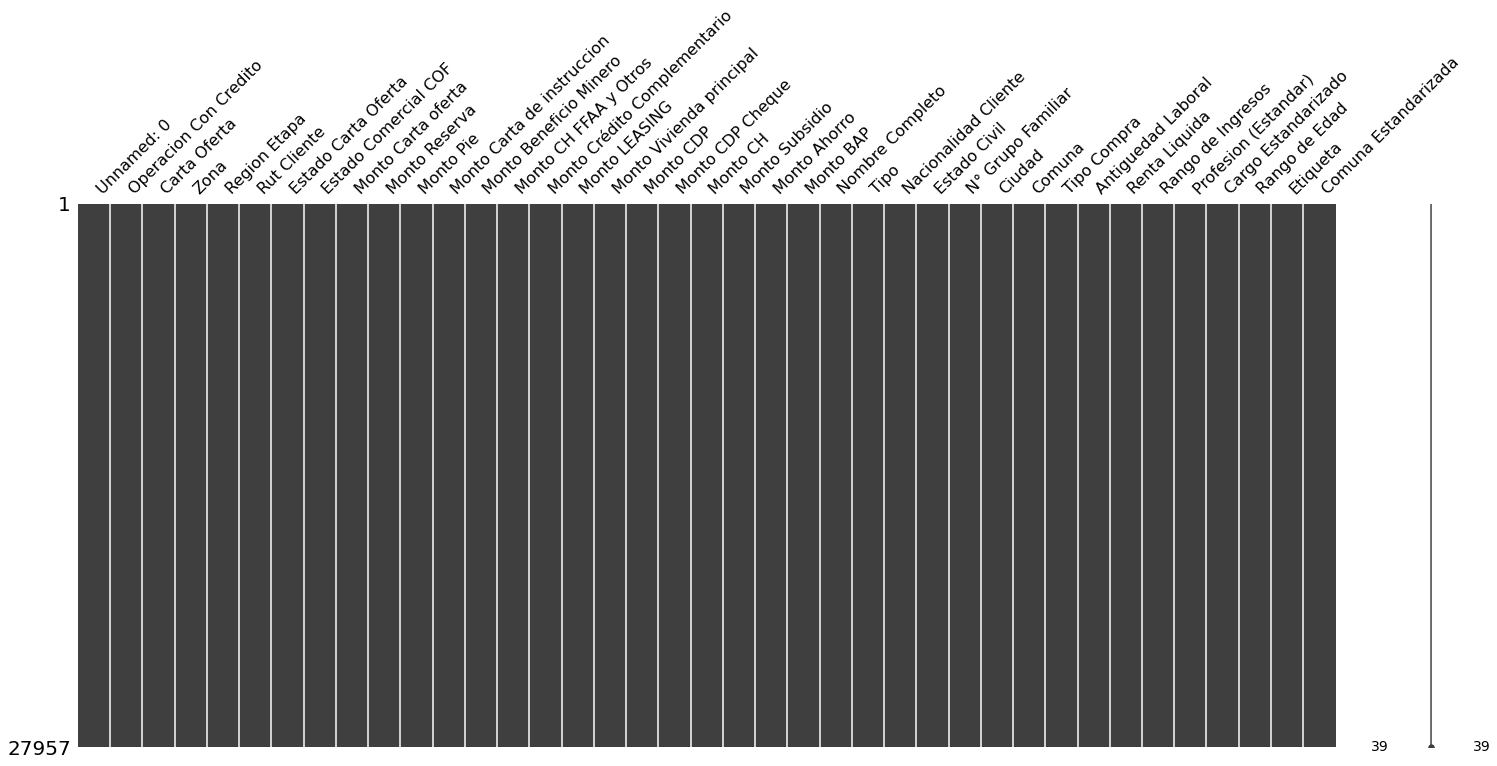

In [128]:
msno.matrix(data_limpia)

In [129]:
data_limpia.to_excel('base_limpia.xlsx')

# Distribución Comunas / Regiones

In [130]:
data_limpia = data_limpia.reset_index(drop=True)

Text(0.5, 1.0, 'Distribución de ciudades')

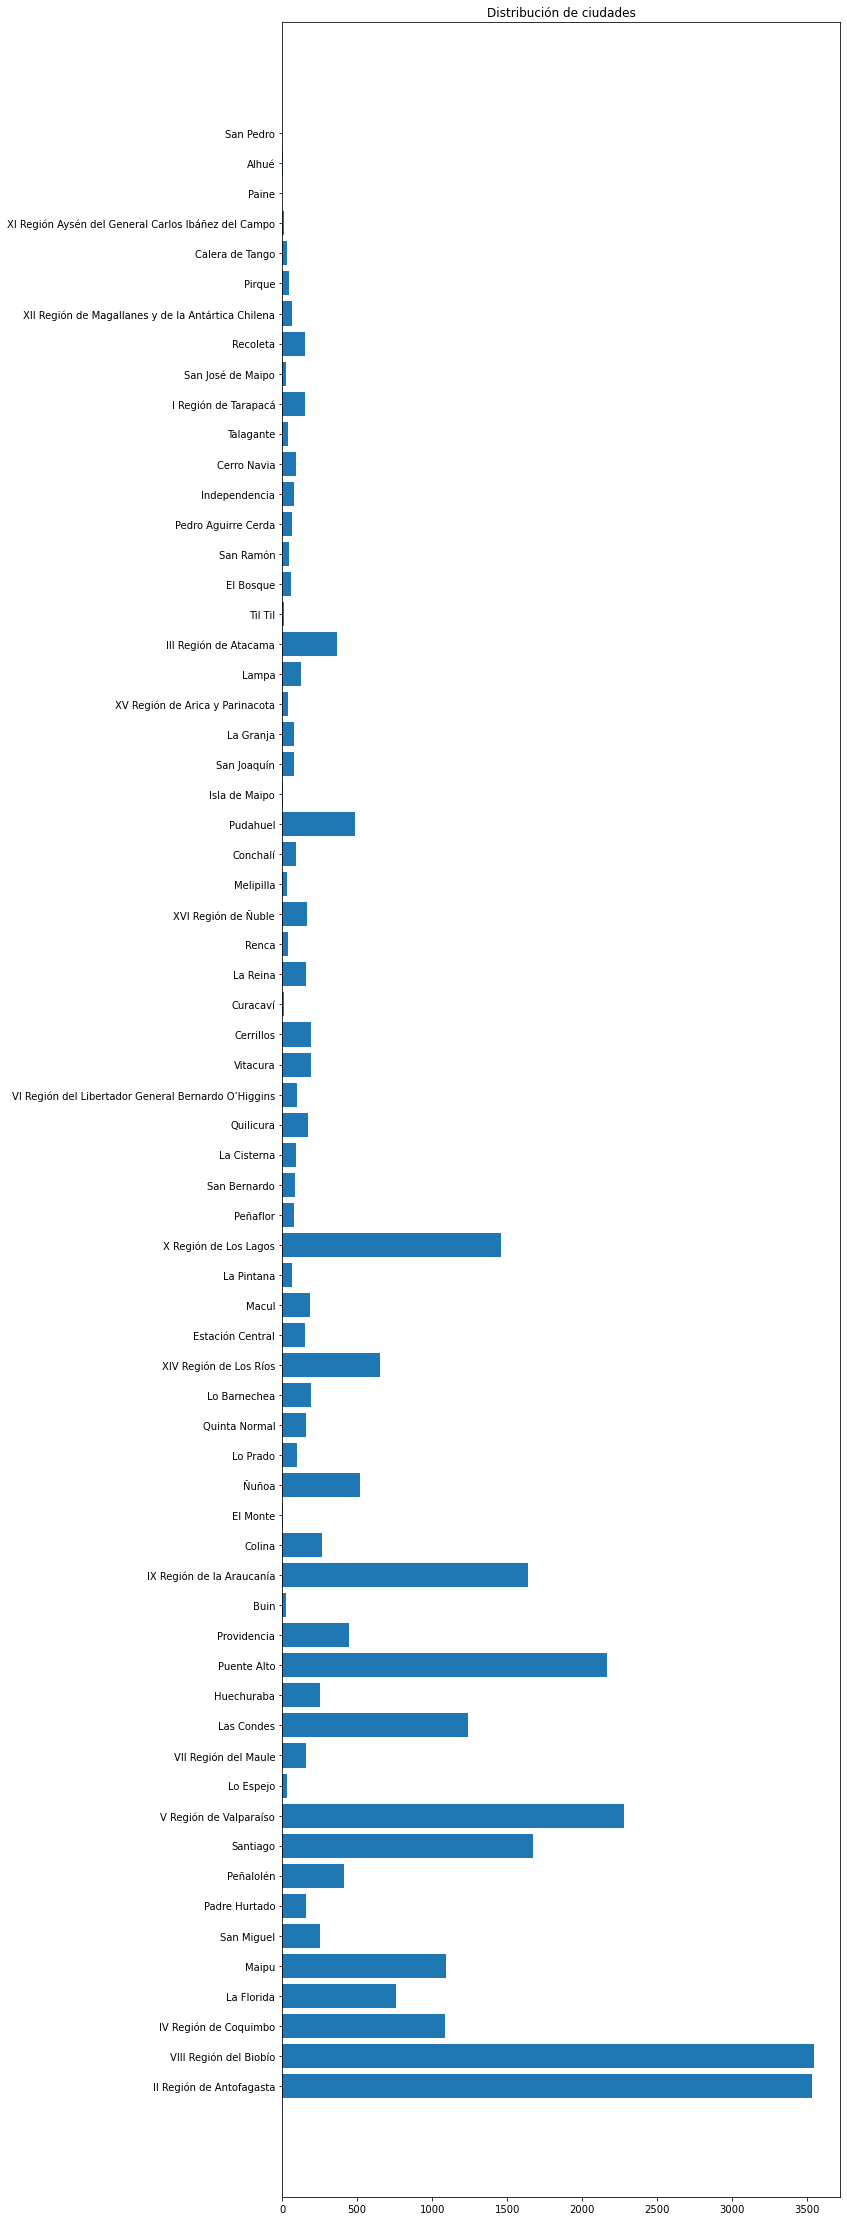

In [131]:
dic_com= dict()

for i in range(data_limpia.shape[0]):
    if str(data_limpia['Comuna Estandarizada'][i]) not in list(dic_com.keys()):
        dic_com[str(data_limpia['Comuna Estandarizada'][i])] =1
    else:
        dic_com[str(data_limpia['Comuna Estandarizada'][i])] += 1
        
df_comunas = pd.DataFrame(columns= ['Comuna', 'frecuencia'])

for i in range(len(dic_com)):
    df_comunas.loc[i] = [list(dic_com.keys())[i], list(dic_com.values())[i]]
    
plt.figure(figsize=(10,40))

plt.barh(df_comunas['Comuna'],df_comunas['frecuencia'])
plt.title('Distribución de ciudades')


In [132]:
df_comunas.sort_values(by = ['frecuencia'], ascending=False)

,Comuna,frecuencia
1,VIII Región del Biobío,3543
0,II Región de Antofagasta,3533
9,V Región de Valparaíso,2277
14,Puente Alto,2166
8,Santiago,1669
...,...,...
19,El Monte,8
43,Isla de Maipo,4
64,Alhué,4
63,Paine,2
